In [1]:
import sys
sys.path.insert(0,'/Users/alexandra/Documents/master_thesis')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as scipy
import scipy as sci

import pandas_datareader as pdr
from pandas_datareader.yahoo.daily import YahooDailyReader


import datetime

"""
Load own functions/packages
"""

# set plotting style

from codelib.visualization.layout import DefaultStyle
from codelib.visualization.base import correlation_plot

DefaultStyle();

In [2]:
'''Import data'''

value = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value.csv",index_col='Date',parse_dates=True)
value_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value_d.csv",index_col='Date',parse_dates=True)
value_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value_bm.csv",index_col='Date',parse_dates=True)
value_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value_bm_d.csv",index_col='Date',parse_dates=True)
value_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value_aum.csv",index_col='Date',parse_dates=True)
value_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value_aum_d.csv",index_col='Date',parse_dates=True)

momentum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum.csv",index_col='Date',parse_dates=True)
momentum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum_d.csv",index_col='Date',parse_dates=True)
momentum_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum_bm.csv",index_col='Date',parse_dates=True)
momentum_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum_bm_d.csv",index_col='Date',parse_dates=True)
momentum_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum_aum.csv",index_col='Date',parse_dates=True)
momentum_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum_aum_d.csv",index_col='Date',parse_dates=True)

quality = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality.csv",index_col='Date',parse_dates=True)
quality_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality_d.csv",index_col='Date',parse_dates=True)
quality_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality_bm.csv",index_col='Date',parse_dates=True)
quality_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality_bm_d.csv",index_col='Date',parse_dates=True)
quality_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality_aum.csv",index_col='Date',parse_dates=True)
quality_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality_aum_d.csv",index_col='Date',parse_dates=True)

fundamentals = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals.csv",index_col='Date',parse_dates=True)
fundamentals_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals_d.csv",index_col='Date',parse_dates=True)
fundamentals_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals_bm.csv",index_col='Date',parse_dates=True)
fundamentals_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals_bm_d.csv",index_col='Date',parse_dates=True)
fundamentals_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals_aum.csv",index_col='Date',parse_dates=True)
fundamentals_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals_aum_d.csv",index_col='Date',parse_dates=True)

multi = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multifactor.csv",index_col='Date',parse_dates=True)
multi_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multifactor_d.csv",index_col='Date',parse_dates=True)
multi_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multifactor_aum.csv",index_col='Date',parse_dates=True)
multi_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multifactor_bm.csv",index_col='Date',parse_dates=True)
multi_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multi_bm_d.csv",index_col='Date',parse_dates=True)
multi_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multifactor_aum_d.csv",index_col='Date',parse_dates=True)

dividend = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend.csv",index_col='Date',parse_dates=True)
dividend_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend_d.csv",index_col='Date',parse_dates=True)
dividend_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend_aum.csv",index_col='Date',parse_dates=True)
dividend_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend_bm.csv",index_col='Date',parse_dates=True)
dividend_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend_bm_d.csv",index_col='Date',parse_dates=True)
dividend_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend_aum_d.csv",index_col='Date',parse_dates=True)

lowvol = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol.csv",index_col='Date',parse_dates=True)
lowvol_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol_d.csv",index_col='Date',parse_dates=True)
lowvol_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol_aum.csv",index_col='Date',parse_dates=True)
lowvol_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol_bm.csv",index_col='Date',parse_dates=True)
lowvol_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol_bm_d.csv",index_col='Date',parse_dates=True)
lowvol_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol_aum_d.csv",index_col='Date',parse_dates=True)

equal = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal.csv",index_col='Date',parse_dates=True)
equal_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal_d.csv",index_col='Date',parse_dates=True)
equal_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal_aum.csv",index_col='Date',parse_dates=True)
equal_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal_bm.csv",index_col='Date',parse_dates=True)
equal_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal_bm_d.csv",index_col='Date',parse_dates=True)
equal_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal_aum_d.csv",index_col='Date',parse_dates=True)

factors = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/factors.csv",index_col='Date',parse_dates=True)
factors_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/factors_d.csv",index_col='Date',parse_dates=True)
rf = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/rf.csv",index_col='Date',parse_dates=True)
rf_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/rf_d.csv",index_col='Date',parse_dates=True)
ind_pf=pd.read_csv("/Users/alexandra/Documents/master_thesis/data/12_Industry_Portfolios.csv",index_col='Date',parse_dates=True)
sp500=pd.read_csv("/Users/alexandra/Documents/master_thesis/data/sp500.csv",index_col='Date',parse_dates=True)
#factors=pd.concat([factors['MKT'],factors.iloc[:,1:].sub(rf['RF'],axis=0)],axis=1)
#factors_d=pd.concat([factors_d['MKT'],factors_d.iloc[:,1:].sub(rf_d['RF'],axis=0)],axis=1)


# Hypothesis 1

In [3]:
'''Calculate monthly returns'''

#etfs
value_return_m=(value/value.shift(1)-1)
momentum_return_m=(momentum/momentum.shift(1)-1)
quality_return_m=(quality/quality.shift(1)-1)
fundamentals_return_m=(fundamentals/fundamentals.shift(1)-1)
equal_return_m=(equal/equal.shift(1)-1)
lowvol_return_m=(lowvol/lowvol.shift(1)-1)
dividend_return_m=(dividend/dividend.shift(1)-1)
multi_return_m=(multi/multi.shift(1)-1)

#benchmarks
value_bm_return_m=(value_bm/value_bm.shift(1)-1)
momentum_bm_return_m=(momentum_bm/momentum_bm.shift(1)-1)
quality_bm_return_m=(quality_bm/quality_bm.shift(1)-1)
fundamentals_bm_return_m=(fundamentals_bm/fundamentals_bm.shift(1)-1)
equal_bm_return_m=(equal_bm/equal_bm.shift(1)-1)
multi_bm_return_m=(multi_bm/multi_bm.shift(1)-1)
dividend_bm_return_m=(dividend_bm/dividend_bm.shift(1)-1)
lowvol_bm_return_m=(lowvol_bm/lowvol_bm.shift(1)-1)

In [4]:
'''Calculate portfolio weights'''

value_weights=value_aum.div(value_aum.sum(axis=1),axis=0)
momentum_weights=momentum_aum.div(momentum_aum.sum(axis=1),axis=0)
quality_weights=quality_aum.div(quality_aum.sum(axis=1),axis=0)
fundamentals_weights=fundamentals_aum.div(fundamentals_aum.sum(axis=1),axis=0)
equal_weights=equal_aum.div(equal_aum.sum(axis=1),axis=0)
lowvol_weights=lowvol_aum.div(lowvol_aum.sum(axis=1),axis=0)
multi_weights=multi_aum.div(multi_aum.sum(axis=1),axis=0)
dividend_weights=dividend_aum.div(dividend_aum.sum(axis=1),axis=0)

In [5]:
'''Calculate portfolio monthly returns'''

def pf_return(weights,returns):
    return (weights.shift(1)*returns).sum(axis=1)-rf['RF']

#etfs
value_pf_return_m=pf_return(value_weights,value_return_m)[20:]
momentum_pf_return_m=pf_return(momentum_weights,momentum_return_m)[28:]
quality_pf_return_m=pf_return(quality_weights,quality_return_m)[37:]
fundamentals_pf_return_m=pf_return(fundamentals_weights,fundamentals_return_m)[37:]
multi_pf_return_m=pf_return(multi_weights,multi_return_m)[6:]
equal_pf_return_m=pf_return(equal_weights,equal_return_m)[1:]
dividend_pf_return_m=pf_return(dividend_weights,dividend_return_m)[9:]
lowvol_pf_return_m=pf_return(lowvol_weights,lowvol_return_m)[49:]

#benchmarks
value_bm_pf_return_m=pf_return(value_weights,value_bm_return_m)[20:]
momentum_bm_pf_return_m=pf_return(momentum_weights,momentum_bm_return_m)[28:]
quality_bm_pf_return_m=pf_return(quality_weights,quality_bm_return_m)[37:]
fundamentals_bm_pf_return_m=pf_return(fundamentals_weights,fundamentals_bm_return_m)[37:]
multi_bm_pf_return_m=pf_return(multi_weights,multi_bm_return_m)[6:]
equal_bm_pf_return_m=pf_return(equal_weights,equal_bm_return_m)[1:]
dividend_bm_pf_return_m=pf_return(dividend_weights,dividend_bm_return_m)[9:]
lowvol_bm_pf_return_m=pf_return(lowvol_weights,lowvol_bm_return_m)[49:]

#difference
value_diff_return_m=value_pf_return_m-value_bm_pf_return_m
momentum_diff_return_m=momentum_pf_return_m-momentum_bm_pf_return_m
quality_diff_return_m=quality_pf_return_m-quality_bm_pf_return_m
fundamentals_diff_return_m=fundamentals_pf_return_m-fundamentals_bm_pf_return_m
lowvol_diff_return_m=lowvol_pf_return_m-lowvol_bm_pf_return_m
equal_diff_return_m=equal_pf_return_m-equal_bm_pf_return_m
multi_diff_return_m=multi_pf_return_m-multi_bm_pf_return_m
dividend_diff_return_m=dividend_pf_return_m-dividend_bm_pf_return_m

Text(0.5, 1.0, 'Correlation Matrix')

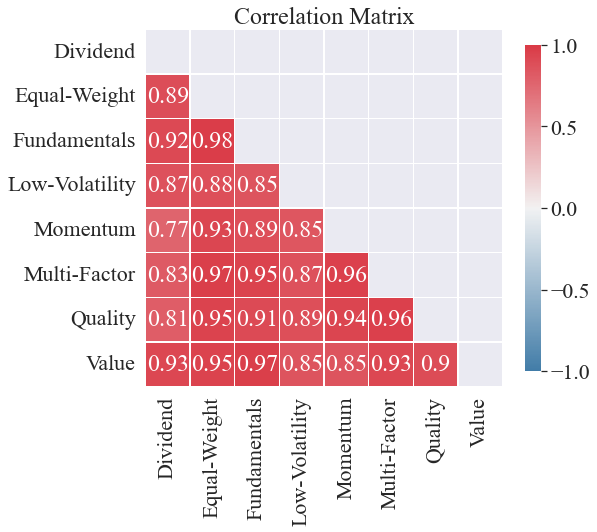

In [6]:
'''Calculate correlations (ETFs)'''

etf_pf=pd.concat([dividend_pf_return_m,equal_pf_return_m,fundamentals_pf_return_m,lowvol_pf_return_m,
                  momentum_pf_return_m,multi_pf_return_m,quality_pf_return_m,value_pf_return_m,],axis=1)[49:]
etf_pf_correl_matrix=np.corrcoef(etf_pf,rowvar=False)

'''Plot the correlation matrix'''

sns.set(font="Times New Roman",font_scale=2)
fig, ax = plt.subplots(figsize=(8, 8))
correlation_plot(etf_pf_correl_matrix, names=['Dividend','Equal-Weight','Fundamentals','Low-Volatility',
                                              'Momentum','Multi-Factor','Quality','Value'], include_values=True, ax=ax)
ax.set_title('Correlation Matrix',)

In [7]:
'''Calculate portfolio annualized returns (since inception)'''

def pf_return_annualized(pf_monthly_returns):
    n = len(pf_monthly_returns)
    return np.prod(pf_monthly_returns+1) ** (12 / n) - 1

#etfs
value_pf_return_y=pf_return_annualized(value_pf_return_m)
momentum_pf_return_y=pf_return_annualized(momentum_pf_return_m)
quality_pf_return_y=pf_return_annualized(quality_pf_return_m)
fundamentals_pf_return_y=pf_return_annualized(fundamentals_pf_return_m)
equal_pf_return_y=pf_return_annualized(equal_pf_return_m)
multi_pf_return_y=pf_return_annualized(multi_pf_return_m)
dividend_pf_return_y=pf_return_annualized(dividend_pf_return_m)
lowvol_pf_return_y=pf_return_annualized(lowvol_pf_return_m)

print(value_pf_return_y,momentum_pf_return_y,quality_pf_return_y,fundamentals_pf_return_y,
      multi_pf_return_y,dividend_pf_return_y,equal_pf_return_y,lowvol_pf_return_y)


0.07674777678863798 0.08850300573851477 0.08519559987636671 0.09075448300725619 0.09494599521791147 0.07026018887066354 0.11881445538886592 0.09066572259200689


In [8]:
#benchmarks

value_bm_pf_return_y=pf_return_annualized(value_bm_pf_return_m)
momentum_bm_pf_return_y=pf_return_annualized(momentum_bm_pf_return_m)
quality_bm_pf_return_y=pf_return_annualized(quality_bm_pf_return_m)
fundamentals_bm_pf_return_y=pf_return_annualized(fundamentals_bm_pf_return_m)
equal_bm_pf_return_y=pf_return_annualized(equal_bm_pf_return_m)
multi_bm_pf_return_y=pf_return_annualized(multi_bm_pf_return_m)
dividend_bm_pf_return_y=pf_return_annualized(dividend_bm_pf_return_m)
lowvol_bm_pf_return_y=pf_return_annualized(lowvol_bm_pf_return_m)

print(value_bm_pf_return_y,momentum_bm_pf_return_y,quality_bm_pf_return_y,fundamentals_bm_pf_return_y,
      multi_bm_pf_return_y,dividend_bm_pf_return_y,equal_bm_pf_return_y,lowvol_bm_pf_return_y)

0.07551168316240964 0.11343078643822468 0.09986273931769296 0.07724721447928373 0.11299666244882833 0.08184477573685212 0.11367607543608638 0.09107724076644952


In [9]:
#difference

value_diff_return_y=pf_return_annualized(value_diff_return_m)
momentum_diff_return_y=pf_return_annualized(momentum_diff_return_m)
quality_diff_return_y=pf_return_annualized(quality_diff_return_m)
fundamentals_diff_return_y=pf_return_annualized(fundamentals_diff_return_m)
equal_diff_return_y=pf_return_annualized(equal_diff_return_m)
multi_diff_return_y=pf_return_annualized(multi_diff_return_m)
dividend_diff_return_y=pf_return_annualized(dividend_diff_return_m)
lowvol_diff_return_y=pf_return_annualized(lowvol_diff_return_m)

print(value_diff_return_y,momentum_diff_return_y,quality_diff_return_y,fundamentals_diff_return_y,
      multi_diff_return_y,dividend_diff_return_y,equal_diff_return_y,lowvol_diff_return_y)

0.0012810166318446559 -0.022483510326801293 -0.0142114055453747 0.01422403050904042 -0.014972924378589214 -0.01354413536995358 0.006973173759762474 -0.007168167164212869


In [10]:
'''Calculate portfolio annualized returns (1Y, 3Y, 5Y)'''

def pf_return_annualized_period(pf_monthly_returns,months):
    n = len(pf_monthly_returns[-months:])
    return np.prod(pf_monthly_returns[-months:]+1) ** (12 / n) - 1


'''1 year'''
#etfs
value_pf_return_1y=pf_return_annualized_period(value_pf_return_m,12)
momentum_pf_return_1y=pf_return_annualized_period(momentum_pf_return_m,12)
quality_pf_return_1y=pf_return_annualized_period(quality_pf_return_m,12)
fundamentals_pf_return_1y=pf_return_annualized_period(fundamentals_pf_return_m,12)
equal_pf_return_1y=pf_return_annualized_period(equal_pf_return_m,12)
multi_pf_return_1y=pf_return_annualized_period(multi_pf_return_m,12)
dividend_pf_return_1y=pf_return_annualized_period(dividend_pf_return_m,12)
lowvol_pf_return_1y=pf_return_annualized_period(lowvol_pf_return_m,12)

print('1 year etfs: ',value_pf_return_1y,momentum_pf_return_1y,quality_pf_return_1y,fundamentals_pf_return_1y,
      multi_pf_return_1y,dividend_pf_return_1y,equal_pf_return_1y,lowvol_pf_return_1y)

#benchmark
value_bm_pf_return_1y=pf_return_annualized_period(value_bm_pf_return_m,12)
momentum_bm_pf_return_1y=pf_return_annualized_period(momentum_bm_pf_return_m,12)
quality_bm_pf_return_1y=pf_return_annualized_period(quality_bm_pf_return_m,12)
fundamentals_bm_pf_return_1y=pf_return_annualized_period(fundamentals_bm_pf_return_m,12)
equal_bm_pf_return_1y=pf_return_annualized_period(equal_bm_pf_return_m,12)
multi_bm_pf_return_1y=pf_return_annualized_period(multi_bm_pf_return_m,12)
dividend_bm_pf_return_1y=pf_return_annualized_period(dividend_bm_pf_return_m,12)
lowvol_bm_pf_return_1y=pf_return_annualized_period(lowvol_bm_pf_return_m,12)

print('1 year benchmarks: ',value_bm_pf_return_1y,momentum_bm_pf_return_1y,quality_bm_pf_return_1y,
      fundamentals_bm_pf_return_1y, multi_bm_pf_return_1y,dividend_bm_pf_return_1y,
      equal_bm_pf_return_1y,lowvol_bm_pf_return_1y)

#difference
value_diff_return_1y=pf_return_annualized_period(value_diff_return_m,12)
momentum_diff_return_1y=pf_return_annualized_period(momentum_diff_return_m,12)
quality_diff_return_1y=pf_return_annualized_period(quality_diff_return_m,12)
fundamentals_diff_return_1y=pf_return_annualized_period(fundamentals_diff_return_m,12)
equal_diff_return_1y=pf_return_annualized_period(equal_diff_return_m,12)
multi_diff_return_1y=pf_return_annualized_period(multi_diff_return_m,12)
dividend_diff_return_1y=pf_return_annualized_period(dividend_diff_return_m,12)
lowvol_diff_return_1y=pf_return_annualized_period(lowvol_diff_return_m,12)

print('1 year difference: ',value_diff_return_1y,momentum_diff_return_1y,quality_diff_return_1y,
      fundamentals_diff_return_1y, multi_diff_return_1y,dividend_diff_return_1y,
      equal_diff_return_1y,lowvol_diff_return_1y,'\n')

'''3 years'''
#etfs
value_pf_return_3y=pf_return_annualized_period(value_pf_return_m,12*3)
momentum_pf_return_3y=pf_return_annualized_period(momentum_pf_return_m,12*3)
quality_pf_return_3y=pf_return_annualized_period(quality_pf_return_m,12*3)
fundamentals_pf_return_3y=pf_return_annualized_period(fundamentals_pf_return_m,12*3)
equal_pf_return_3y=pf_return_annualized_period(equal_pf_return_m,12*3)
multi_pf_return_3y=pf_return_annualized_period(multi_pf_return_m,12*3)
dividend_pf_return_3y=pf_return_annualized_period(dividend_pf_return_m,12*3)
lowvol_pf_return_3y=pf_return_annualized_period(lowvol_pf_return_m,12*3)

print('3 years etfs: ',value_pf_return_3y,momentum_pf_return_3y,quality_pf_return_3y,fundamentals_pf_return_3y,
      multi_pf_return_3y,dividend_pf_return_3y,equal_pf_return_3y,lowvol_pf_return_3y)

#benchmark
value_bm_pf_return_3y=pf_return_annualized_period(value_bm_pf_return_m,12*3)
momentum_bm_pf_return_3y=pf_return_annualized_period(momentum_bm_pf_return_m,12*3)
quality_bm_pf_return_3y=pf_return_annualized_period(quality_bm_pf_return_m,12*3)
fundamentals_bm_pf_return_3y=pf_return_annualized_period(fundamentals_bm_pf_return_m,12*3)
equal_bm_pf_return_3y=pf_return_annualized_period(equal_bm_pf_return_m,12*3)
multi_bm_pf_return_3y=pf_return_annualized_period(multi_bm_pf_return_m,12*3)
dividend_bm_pf_return_3y=pf_return_annualized_period(dividend_bm_pf_return_m,12*3)
lowvol_bm_pf_return_3y=pf_return_annualized_period(lowvol_bm_pf_return_m,12*3)

print('3 years benchmarks: ',value_bm_pf_return_3y,momentum_bm_pf_return_3y,quality_bm_pf_return_3y,
      fundamentals_bm_pf_return_3y, multi_bm_pf_return_3y,dividend_bm_pf_return_3y,
      equal_bm_pf_return_3y,lowvol_bm_pf_return_3y)

#difference
value_diff_return_3y=pf_return_annualized_period(value_diff_return_m,12*3)
momentum_diff_return_3y=pf_return_annualized_period(momentum_diff_return_m,12*3)
quality_diff_return_3y=pf_return_annualized_period(quality_diff_return_m,12*3)
fundamentals_diff_return_3y=pf_return_annualized_period(fundamentals_diff_return_m,12*3)
equal_diff_return_3y=pf_return_annualized_period(equal_diff_return_m,12*3)
multi_diff_return_3y=pf_return_annualized_period(multi_diff_return_m,12*3)
dividend_diff_return_3y=pf_return_annualized_period(dividend_diff_return_m,12*3)
lowvol_diff_return_3y=pf_return_annualized_period(lowvol_diff_return_m,12*3)

print('3 years difference: ',value_diff_return_3y,momentum_diff_return_3y,quality_diff_return_3y,
      fundamentals_diff_return_3y, multi_diff_return_3y,dividend_diff_return_3y,
      equal_diff_return_3y,lowvol_diff_return_3y,'\n')

'''5 years'''
#etfs
value_pf_return_5y=pf_return_annualized_period(value_pf_return_m,12*5)
momentum_pf_return_5y=pf_return_annualized_period(momentum_pf_return_m,12*5)
quality_pf_return_5y=pf_return_annualized_period(quality_pf_return_m,12*5)
fundamentals_pf_return_5y=pf_return_annualized_period(fundamentals_pf_return_m,12*5)
equal_pf_return_5y=pf_return_annualized_period(equal_pf_return_m,12*5)
multi_pf_return_5y=pf_return_annualized_period(multi_pf_return_m,12*5)
dividend_pf_return_5y=pf_return_annualized_period(dividend_pf_return_m,12*5)
lowvol_pf_return_5y=pf_return_annualized_period(lowvol_pf_return_m,12*5)

print('5 years: ',value_pf_return_5y,momentum_pf_return_5y,quality_pf_return_5y,fundamentals_pf_return_5y,
      multi_pf_return_5y,dividend_pf_return_5y,equal_pf_return_5y,lowvol_pf_return_5y)

#benchmark
value_bm_pf_return_5y=pf_return_annualized_period(value_bm_pf_return_m,12*5)
momentum_bm_pf_return_5y=pf_return_annualized_period(momentum_bm_pf_return_m,12*5)
quality_bm_pf_return_5y=pf_return_annualized_period(quality_bm_pf_return_m,12*5)
fundamentals_bm_pf_return_5y=pf_return_annualized_period(fundamentals_bm_pf_return_m,12*5)
equal_bm_pf_return_5y=pf_return_annualized_period(equal_bm_pf_return_m,12*5)
multi_bm_pf_return_5y=pf_return_annualized_period(multi_bm_pf_return_m,12*5)
dividend_bm_pf_return_5y=pf_return_annualized_period(dividend_bm_pf_return_m,12*5)
lowvol_bm_pf_return_5y=pf_return_annualized_period(lowvol_bm_pf_return_m,12*5)

print('5 years benchmarks: ',value_bm_pf_return_5y,momentum_bm_pf_return_5y,quality_bm_pf_return_5y,
      fundamentals_bm_pf_return_5y, multi_bm_pf_return_5y,dividend_bm_pf_return_5y,
      equal_bm_pf_return_5y,lowvol_bm_pf_return_5y)

#difference
value_diff_return_5y=pf_return_annualized_period(value_diff_return_m,12*5)
momentum_diff_return_5y=pf_return_annualized_period(momentum_diff_return_m,12*5)
quality_diff_return_5y=pf_return_annualized_period(quality_diff_return_m,12*5)
fundamentals_diff_return_5y=pf_return_annualized_period(fundamentals_diff_return_m,12*5)
equal_diff_return_5y=pf_return_annualized_period(equal_diff_return_m,12*5)
multi_diff_return_5y=pf_return_annualized_period(multi_diff_return_m,12*5)
dividend_diff_return_5y=pf_return_annualized_period(dividend_diff_return_m,12*5)
lowvol_diff_return_5y=pf_return_annualized_period(lowvol_diff_return_m,12*5)

print('5 years difference: ',value_diff_return_5y,momentum_diff_return_5y,quality_diff_return_5y,
      fundamentals_diff_return_5y, multi_diff_return_5y,dividend_diff_return_5y,
      equal_diff_return_5y,lowvol_diff_return_5y)


1 year etfs:  0.2724292844954408 0.13428781843252047 0.2524423825292019 0.3016782790083179 0.24171888691653565 0.24857573548737633 0.2646604910089212 0.21142618839988625
1 year benchmarks:  0.2517542178504788 0.2573057642610377 0.26336956800634526 0.21973233440343876 0.24736523028356294 0.2541819014432971 0.273020234345847 0.25360266934971243
1 year difference:  0.01556844762634535 -0.10267366559204916 -0.007576029281769703 0.06786868142892155 -0.0053643451963441 -0.004454776235811697 -0.007791409949456818 -0.03398014786809611 

3 years etfs:  0.15732844751217656 0.22255314444327823 0.234531764248606 0.2032841163708603 0.21554245603424893 0.14882899218946855 0.24103417377757896 0.15505031142104175
3 years benchmarks:  0.16610640641132357 0.3118737492349275 0.2512042931192515 0.17845611946170425 0.23564182541651713 0.17302459016864047 0.27479694596955184 0.22854258899976787
3 years difference:  -0.003839011643037016 -0.07208004503682941 -0.015081755456688772 0.0241586110791705 -0.015515

In [11]:
'''Calculate portfolio annualized standard deviation'''

def pf_std_annualized(pf_monthly_returns):
    std_m=pf_monthly_returns.std()
    return np.sqrt(12)*std_m
    
#etfs
value_pf_std_y=pf_std_annualized(value_pf_return_m)
momentum_pf_std_y=pf_std_annualized(momentum_pf_return_m)
quality_pf_std_y=pf_std_annualized(quality_pf_return_m)
fundamentals_pf_std_y=pf_std_annualized(fundamentals_pf_return_m)
equal_pf_std_y=pf_std_annualized(equal_pf_return_m)
multi_pf_std_y=pf_std_annualized(multi_pf_return_m)
dividend_pf_std_y=pf_std_annualized(dividend_pf_return_m)
lowvol_pf_std_y=pf_std_annualized(lowvol_pf_return_m)

print(value_pf_std_y,momentum_pf_std_y,quality_pf_std_y,fundamentals_pf_std_y,
      multi_pf_std_y,dividend_pf_std_y,equal_pf_std_y,lowvol_pf_std_y)


0.15937191640573917 0.16197254525261667 0.1568210962090775 0.17879583773087843 0.15878995989341663 0.14342693913841956 0.1670892497245904 0.12710496558606646


In [12]:
#benchmark
value_bm_pf_std_y=pf_std_annualized(value_bm_pf_return_m)
momentum_bm_pf_std_y=pf_std_annualized(momentum_bm_pf_return_m)
quality_bm_pf_std_y=pf_std_annualized(quality_bm_pf_return_m)
fundamentals_bm_pf_std_y=pf_std_annualized(fundamentals_bm_pf_return_m)
equal_bm_pf_std_y=pf_std_annualized(equal_bm_pf_return_m)
multi_bm_pf_std_y=pf_std_annualized(multi_bm_pf_return_m)
dividend_bm_pf_std_y=pf_std_annualized(dividend_bm_pf_return_m)
lowvol_bm_pf_std_y=pf_std_annualized(lowvol_bm_pf_return_m)

print(value_bm_pf_std_y,momentum_bm_pf_std_y,quality_bm_pf_std_y,fundamentals_bm_pf_std_y,
      multi_bm_pf_std_y,dividend_bm_pf_std_y,equal_bm_pf_std_y,lowvol_bm_pf_std_y)

0.15565346383474504 0.15736760080909268 0.15396720078275392 0.1666088685000316 0.14682579370190954 0.15199772169004036 0.1476847094428375 0.15832827487302956


In [13]:
'''Sharpe ratio'''

def sr(returns,std):
    return returns/std

#etfs
value_sr=sr(value_pf_return_y,value_pf_std_y)
momentum_sr=sr(momentum_pf_return_y,momentum_pf_std_y)
quality_sr=sr(quality_pf_return_y,quality_pf_std_y)
fundamentals_sr=sr(fundamentals_pf_return_y,fundamentals_pf_std_y)
lowvol_sr=sr(lowvol_pf_return_y,lowvol_pf_std_y)
dividend_sr=sr(dividend_pf_return_y,dividend_pf_std_y)
equal_sr=sr(equal_pf_return_y,equal_pf_std_y)
multi_sr=sr(multi_pf_return_y,multi_pf_std_y)


print(value_sr,momentum_sr,quality_sr,fundamentals_sr,
      multi_sr,dividend_sr,equal_sr,lowvol_sr)


0.4815639952101009 0.5464074519572631 0.5432661927243639 0.50758722439534 0.5979344996474673 0.48986744953719125 0.7110837805825642 0.71331377317918


In [14]:
#benchmark
value_bm_sr=sr(value_bm_pf_return_y,value_bm_pf_std_y)
momentum_bm_sr=sr(momentum_bm_pf_return_y,momentum_bm_pf_std_y)
quality_bm_sr=sr(quality_bm_pf_return_y,quality_bm_pf_std_y)
fundamentals_bm_sr=sr(fundamentals_bm_pf_return_y,fundamentals_bm_pf_std_y)
lowvol_bm_sr=sr(lowvol_bm_pf_return_y,lowvol_bm_pf_std_y)
dividend_bm_sr=sr(dividend_bm_pf_return_y,dividend_bm_pf_std_y)
equal_bm_sr=sr(equal_bm_pf_return_y,equal_bm_pf_std_y)
multi_bm_sr=sr(multi_bm_pf_return_y,multi_bm_pf_std_y)


print(value_bm_sr,momentum_bm_sr,quality_bm_sr,fundamentals_bm_sr,
      multi_bm_sr,dividend_bm_sr,equal_bm_sr,lowvol_bm_sr)


0.4851269049982676 0.7208013965710194 0.6485974857632063 0.46364407354023346 0.7695968099327138 0.5384605428741436 0.7697213602203388 0.5752430564880997


In [15]:
'''Sortino ratio'''

def sortino(pf_monthly_returns):
    n = len(pf_monthly_returns)
    d=np.minimum(pf_monthly_returns-pf_monthly_returns.mean(),0)
    dd=np.sqrt(12)*np.sqrt(np.sum(d**2)/(n-1))
    pf=np.prod(pf_monthly_returns+1) ** (12 / n) - 1
    return pf/dd

#etfs
value_sortino=sortino(value_pf_return_m)
momentum_sortino=sortino(momentum_pf_return_m)
quality_sortino=sortino(quality_pf_return_m)
fundamentals_sortino=sortino(fundamentals_pf_return_m)
equal_sortino=sortino(equal_pf_return_m)
multi_sortino=sortino(multi_pf_return_m)
dividend_sortino=sortino(dividend_pf_return_m)
lowvol_sortino=sortino(lowvol_pf_return_m)

print(value_sortino,momentum_sortino,quality_sortino,fundamentals_sortino,
      multi_sortino,dividend_sortino,equal_sortino,lowvol_sortino)

0.6275467411323429 0.7016776344255028 0.6972159175685648 0.6750480388803566 0.7761419898018916 0.6242700662828945 0.9562342864042205 0.8868357370420236


In [16]:
#benchmark
value_bm_sortino=sortino(value_bm_pf_return_m)
momentum_bm_sortino=sortino(momentum_bm_pf_return_m)
quality_bm_sortino=sortino(quality_bm_pf_return_m)
fundamentals_bm_sortino=sortino(fundamentals_bm_pf_return_m)
equal_bm_sortino=sortino(equal_bm_pf_return_m)
multi_bm_sortino=sortino(multi_bm_pf_return_m)
dividend_bm_sortino=sortino(dividend_bm_pf_return_m)
lowvol_bm_sortino=sortino(lowvol_bm_pf_return_m)

print(value_bm_sortino,momentum_bm_sortino,quality_bm_sortino,fundamentals_bm_sortino,
      multi_bm_sortino,dividend_bm_sortino,equal_bm_sortino,lowvol_bm_sortino)

0.6262238725474599 0.9515046567822464 0.8458561881850323 0.6001516729167742 0.9952785734000693 0.6958141386241848 1.017396259063807 0.7480025018594052


In [17]:
'''Information ratio'''

def ir(pf_return,bm_return):
    te=(pf_return-bm_return).std()*np.sqrt(12)
    n = len(pf_return)
    pf=np.prod(pf_return+1) ** (12 / n) - 1
    bm=np.prod(bm_return+1) ** (12 / n) - 1
    return (pf-bm)/te

value_ir=ir(value_pf_return_m,value_bm_pf_return_m)
momentum_ir=ir(momentum_pf_return_m,momentum_bm_pf_return_m)
quality_ir=ir(quality_pf_return_m,quality_bm_pf_return_m)
fundamentals_ir=ir(fundamentals_pf_return_m,fundamentals_bm_pf_return_m)
lowvol_ir=ir(lowvol_pf_return_m,lowvol_bm_pf_return_m)
equal_ir=ir(equal_pf_return_m,equal_bm_pf_return_m)
dividend_ir=ir(dividend_pf_return_m,dividend_bm_pf_return_m)
multi_ir=ir(multi_pf_return_m,multi_bm_pf_return_m)

print(value_ir,momentum_ir,quality_ir,fundamentals_ir,
      multi_ir,dividend_ir,equal_ir,lowvol_ir)

0.041943261871942424 -0.6313632783311584 -0.2866839306295257 0.45849049358792515 -0.5736374169336627 -0.2066488400327994 0.13131679769164664 -0.005909885749500493


In [18]:
'''CAPM'''

def capm(pf_return,bm_return):
    X = sm.add_constant(bm_return)
    model = sm.OLS(pf_return,X)
    results = model.fit(cov_type='HC3')
    predicted_Y=results.predict()
    standardized_predicted_Y=(predicted_Y-predicted_Y.mean())/predicted_Y.std()
    influence = results.get_influence()
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    standardized_residuals = influence.resid_studentized_internal
    print("alpha: ", results.params[0:-1]*12)
    return standardized_predicted_Y,standardized_residuals,print(results.summary(),test)

print('VALUE')
value_capm=capm(value_pf_return_m,value_bm_pf_return_m)
print('\n MOMENTUM')
momentum_capm=capm(momentum_pf_return_m,momentum_bm_pf_return_m)
print('\n QUALITY')
quality_capm=capm(quality_pf_return_m,quality_bm_pf_return_m)
print('\n FUNDAMENTALS')
fundamentals_capm=capm(fundamentals_pf_return_m,fundamentals_bm_pf_return_m)
print('\n LOW VOLATILITY')
lowvol_capm=capm(lowvol_pf_return_m,lowvol_bm_pf_return_m)
print('\n EQUAL-WEIGHT')
equal_capm=capm(equal_pf_return_m,equal_bm_pf_return_m)
print('\n DIVIDEND')
dividend_capm=capm(dividend_pf_return_m,dividend_bm_pf_return_m)
print('\n MULTI-FACTOR')
multi_capm=capm(multi_pf_return_m,multi_bm_pf_return_m)

VALUE
alpha:  const    0.001178
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2250.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          3.68e-113
Time:                        21:35:06   Log-Likelihood:                 700.32
No. Observations:                 209   AIC:                            -1397.
Df Residuals:                     207   BIC:                            -1390.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const

## Assumptions

__Linearity__

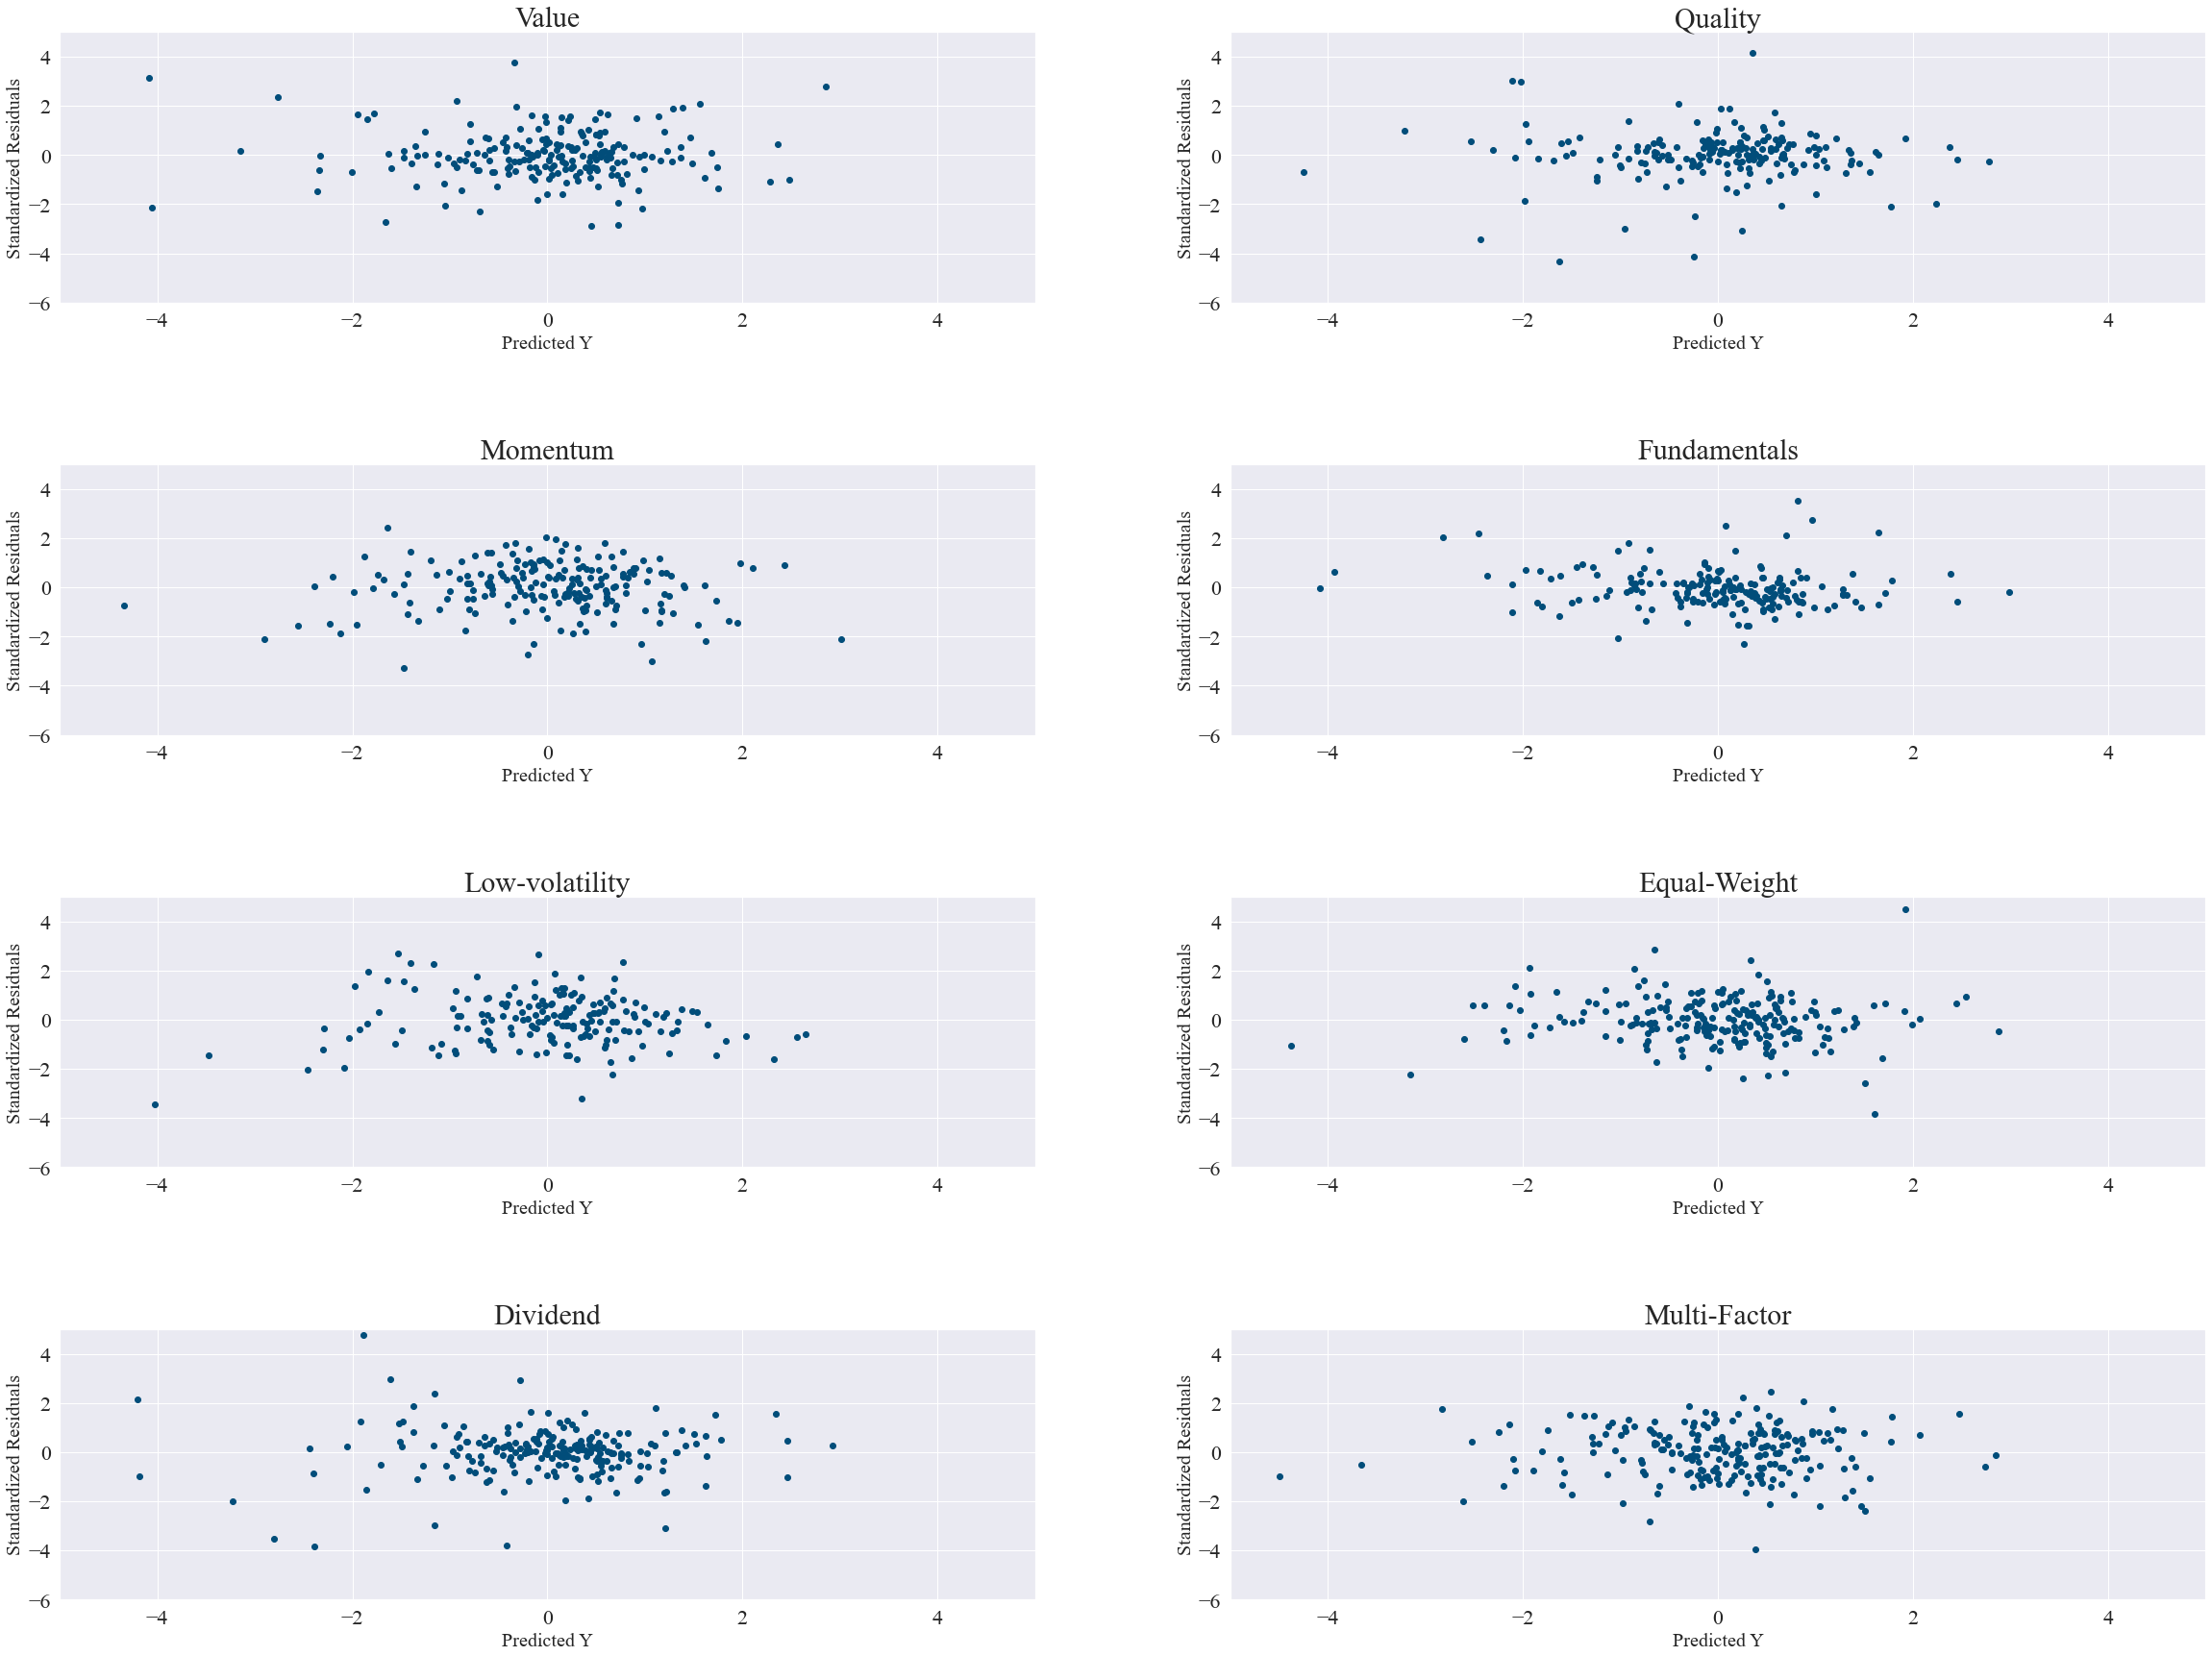

In [19]:
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_capm,quality_capm,momentum_capm,fundamentals_capm,
            lowvol_capm,equal_capm,dividend_capm,multi_capm]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-6, 5])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

# Hyphothesis 2


In [20]:
'''Calculate APB benchmark excess returns (t-36)'''

#01/2013-12/2015
value_apb_20132015=(value_return_m[121:157].loc[:,(value_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
quality_apb_20132015=(quality_return_m[121:157].loc[:,(quality_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
momentum_apb_20132015=(momentum_return_m[121:157].loc[:,(momentum_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
fundamentals_apb_20132015=(fundamentals_return_m[121:157].loc[:,(fundamentals_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
lowvol_apb_20132015=(lowvol_return_m[121:157].loc[:,(lowvol_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
equal_apb_20132015=(equal_return_m[121:157].loc[:,(equal_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
dividend_apb_20132015=(dividend_return_m[121:157].loc[:,(dividend_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
multi_apb_20132015=(multi_return_m[121:157].loc[:,(multi_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]

#01/2014-12/2016
value_apb_20142016=(value_return_m[133:169].loc[:,(value_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
quality_apb_20142016=(quality_return_m[133:169].loc[:,(quality_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
momentum_apb_20142016=(momentum_return_m[133:169].loc[:,(momentum_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
fundamentals_apb_20142016=(fundamentals_return_m[133:169].loc[:,(fundamentals_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
lowvol_apb_20142016=(lowvol_return_m[133:169].loc[:,(lowvol_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
equal_apb_20142016=(equal_return_m[133:169].loc[:,(equal_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
dividend_apb_20142016=(dividend_return_m[133:169].loc[:,(dividend_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
multi_apb_20142016=(multi_return_m[133:169].loc[:,(multi_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]

#01/2015-12/2017
value_apb_20152017=(value_return_m[145:181].loc[:,(value_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
quality_apb_20152017=(quality_return_m[145:181].loc[:,(quality_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
momentum_apb_20152017=(momentum_return_m[145:181].loc[:,(momentum_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
fundamentals_apb_20152017=(fundamentals_return_m[145:181].loc[:,(fundamentals_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
lowvol_apb_20152017=(lowvol_return_m[145:181].loc[:,(lowvol_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
equal_apb_20152017=(equal_return_m[145:181].loc[:,(equal_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
dividend_apb_20152017=(dividend_return_m[145:181].loc[:,(dividend_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
multi_apb_20152017=(multi_return_m[145:181].loc[:,(multi_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]

#01/2016-12/2018
value_apb_20162018=(value_return_m[157:193].loc[:,(value_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
quality_apb_20162018=(quality_return_m[157:193].loc[:,(quality_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
momentum_apb_20162018=(momentum_return_m[157:193].loc[:,(momentum_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
fundamentals_apb_20162018=(fundamentals_return_m[157:193].loc[:,(fundamentals_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
lowvol_apb_20162018=(lowvol_return_m[157:193].loc[:,(lowvol_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
equal_apb_20162018=(equal_return_m[157:193].loc[:,(equal_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
dividend_apb_20162018=(dividend_return_m[157:193].loc[:,(dividend_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
multi_apb_20162018=(multi_return_m[157:193].loc[:,(multi_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]

#01/2017-12/2019
value_apb_20172019=(value_return_m[169:205].loc[:,(value_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
quality_apb_20172019=(quality_return_m[169:205].loc[:,(quality_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
momentum_apb_20172019=(momentum_return_m[169:205].loc[:,(momentum_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
fundamentals_apb_20172019=(fundamentals_return_m[169:205].loc[:,(fundamentals_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
lowvol_apb_20172019=(lowvol_return_m[169:205].loc[:,(lowvol_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
equal_apb_20172019=(equal_return_m[169:205].loc[:,(equal_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
dividend_apb_20172019=(dividend_return_m[169:205].loc[:,(dividend_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
multi_apb_20172019=(multi_return_m[169:205].loc[:,(multi_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]

#01/2018-12/2020
value_apb_20182020=(value_return_m[181:217].loc[:,(value_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
quality_apb_20182020=(quality_return_m[181:217].loc[:,(quality_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
momentum_apb_20182020=(momentum_return_m[181:217].loc[:,(momentum_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
fundamentals_apb_20182020=(fundamentals_return_m[181:217].loc[:,(fundamentals_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
lowvol_apb_20182020=(lowvol_return_m[181:217].loc[:,(lowvol_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
equal_apb_20182020=(equal_return_m[181:217].loc[:,(equal_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
dividend_apb_20182020=(dividend_return_m[181:217].loc[:,(dividend_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
multi_apb_20182020=(multi_return_m[181:217].loc[:,(multi_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]



In [21]:
'''Regress APB excess returns against the Carhart factors and save the residuals + alpha (t-36)'''

def carhart(pf_return,factors):
    X = np.column_stack((factors['MKT'],factors['SMB'],factors['HML'],factors['MOM'],factors['BAB'],factors['QMJ']))
    X = sm.add_constant(X)
    model = sm.OLS(pf_return,X)
    results = model.fit(cov_type='HC3')
    residuals = results.resid
    alpha=results.params[0:1]
    r_squared=results.rsquared
    alpha_t=results.tvalues[0]
    alpha_p=results.pvalues[0]
    data=([results.params[0],alpha_t,alpha_p,r_squared])
    print('results: ',data)
    #print(results.summary())
    return residuals.to_frame('Residuals + alpha')+alpha.array

#01/2013-12/2015
value_apb_20132015_carhart=carhart(value_apb_20132015,factors[121:157])
quality_apb_20132015_carhart=carhart(quality_apb_20132015,factors[121:157])
momentum_apb_20132015_carhart=carhart(momentum_apb_20132015,factors[121:157])
fundamentals_apb_20132015_carhart=carhart(fundamentals_apb_20132015,factors[121:157])
lowvol_apb_20132015_carhart=carhart(lowvol_apb_20132015,factors[121:157])
equal_apb_20132015_carhart=carhart(equal_apb_20132015,factors[121:157])
dividend_apb_20132015_carhart=carhart(dividend_apb_20132015,factors[121:157])
multi_apb_20132015_carhart=carhart(multi_apb_20132015,factors[121:157])

#01/2014-12/2016
value_apb_20142016_carhart=carhart(value_apb_20142016,factors[133:169])
quality_apb_20142016_carhart=carhart(quality_apb_20142016,factors[133:169])
momentum_apb_20142016_carhart=carhart(momentum_apb_20142016,factors[133:169])
fundamentals_apb_20142016_carhart=carhart(fundamentals_apb_20142016,factors[133:169])
lowvol_apb_20142016_carhart=carhart(lowvol_apb_20142016,factors[133:169])
equal_apb_20142016_carhart=carhart(equal_apb_20142016,factors[133:169])
dividend_apb_20142016_carhart=carhart(dividend_apb_20142016,factors[133:169])
multi_apb_20142016_carhart=carhart(multi_apb_20142016,factors[133:169])

#01/2015-12/2017
value_apb_20152017_carhart=carhart(value_apb_20152017,factors[145:181])
quality_apb_20152017_carhart=carhart(quality_apb_20152017,factors[145:181])
momentum_apb_20152017_carhart=carhart(momentum_apb_20152017,factors[145:181])
fundamentals_apb_20152017_carhart=carhart(fundamentals_apb_20152017,factors[145:181])
lowvol_apb_20152017_carhart=carhart(lowvol_apb_20152017,factors[145:181])
equal_apb_20152017_carhart=carhart(equal_apb_20152017,factors[145:181])
dividend_apb_20152017_carhart=carhart(dividend_apb_20152017,factors[145:181])
multi_apb_20152017_carhart=carhart(multi_apb_20152017,factors[145:181])

#01/2016-12/2018
value_apb_20162018_carhart=carhart(value_apb_20162018,factors[157:193])
quality_apb_20162018_carhart=carhart(quality_apb_20162018,factors[157:193])
momentum_apb_20162018_carhart=carhart(momentum_apb_20162018,factors[157:193])
fundamentals_apb_20162018_carhart=carhart(fundamentals_apb_20162018,factors[157:193])
lowvol_apb_20162018_carhart=carhart(lowvol_apb_20162018,factors[157:193])
equal_apb_20162018_carhart=carhart(equal_apb_20162018,factors[157:193])
dividend_apb_20162018_carhart=carhart(dividend_apb_20162018,factors[157:193])
multi_apb_20162018_carhart=carhart(multi_apb_20162018,factors[157:193])

#01/2017-12/2019
value_apb_20172019_carhart=carhart(value_apb_20172019,factors[169:205])
quality_apb_20172019_carhart=carhart(quality_apb_20172019,factors[169:205])
momentum_apb_20172019_carhart=carhart(momentum_apb_20172019,factors[169:205])
fundamentals_apb_20172019_carhart=carhart(fundamentals_apb_20172019,factors[169:205])
lowvol_apb_20172019_carhart=carhart(lowvol_apb_20172019,factors[169:205])
equal_apb_20172019_carhart=carhart(equal_apb_20172019,factors[169:205])
dividend_apb_20172019_carhart=carhart(dividend_apb_20172019,factors[169:205])
multi_apb_20172019_carhart=carhart(multi_apb_20172019,factors[169:205])

#01/2018-12/2020
value_apb_20182020_carhart=carhart(value_apb_20182020,factors[181:217])
quality_apb_20182020_carhart=carhart(quality_apb_20182020,factors[181:217])
momentum_apb_20182020_carhart=carhart(momentum_apb_20182020,factors[181:217])
fundamentals_apb_20182020_carhart=carhart(fundamentals_apb_20182020,factors[181:217])
lowvol_apb_20182020_carhart=carhart(lowvol_apb_20182020,factors[181:217])
equal_apb_20182020_carhart=carhart(equal_apb_20182020,factors[181:217])
dividend_apb_20182020_carhart=carhart(dividend_apb_20182020,factors[181:217])
multi_apb_20182020_carhart=carhart(multi_apb_20182020,factors[181:217])

results:  [0.000890148789396375, 0.3539049290297141, 0.7234101329737805, 0.9670329152984214]
results:  [-0.0008724131869048708, -0.4544586815311678, 0.6494987244863135, 0.968408505146192]
results:  [-0.001598867945425924, -0.925431610668513, 0.35474144229796034, 0.9804596278155453]
results:  [-4.0005711420592054e-05, -0.03186401030646588, 0.9745804996712873, 0.9904076611158906]
results:  [-0.004713083372275384, -1.3150019821889811, 0.18850923630151573, 0.8671357611950694]
results:  [0.0014877390511058564, 0.9159408963136829, 0.3596978953339306, 0.9873620436334163]
results:  [-0.0018854365156856813, -0.7589853246041082, 0.447861335643268, 0.9449350963378865]
results:  [0.0005768887928892898, 0.48772743386033784, 0.6257429171770437, 0.9896777046273141]
results:  [-0.0005811429421112325, -0.2674912114716997, 0.7890909799598234, 0.9578001378962684]
results:  [8.423361770881505e-06, 0.005766194150658207, 0.9953992682075635, 0.97060420096891]
results:  [-0.00026680126142917095, -0.1967983956

In [22]:
'''Calculate excess returns for each ETF in each rolling period (t-36)'''

#01/2013-12/2015
value_etfs_20132015=(value_return_m[121:157].loc[:,(value_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
quality_etfs_20132015=(quality_return_m[121:157].loc[:,(quality_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
momentum_etfs_20132015=(momentum_return_m[121:157].loc[:,(momentum_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
fundamentals_etfs_20132015=(fundamentals_return_m[121:157].loc[:,(fundamentals_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
lowvol_etfs_20132015=(lowvol_return_m[121:157].loc[:,(lowvol_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
equal_etfs_20132015=(equal_return_m[121:157].loc[:,(equal_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
dividend_etfs_20132015=(dividend_return_m[121:157].loc[:,(dividend_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
multi_etfs_20132015=(multi_return_m[121:157].loc[:,(multi_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values

#01/2014-12/2016
value_etfs_20142016=(value_return_m[133:169].loc[:,(value_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
quality_etfs_20142016=(quality_return_m[133:169].loc[:,(quality_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
momentum_etfs_20142016=(momentum_return_m[133:169].loc[:,(momentum_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
fundamentals_etfs_20142016=(fundamentals_return_m[133:169].loc[:,(fundamentals_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
lowvol_etfs_20142016=(lowvol_return_m[133:169].loc[:,(lowvol_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
equal_etfs_20142016=(equal_return_m[133:169].loc[:,(equal_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
dividend_etfs_20142016=(dividend_return_m[133:169].loc[:,(dividend_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
multi_etfs_20142016=(multi_return_m[133:169].loc[:,(multi_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values

#01/2015-12/2017
value_etfs_20152017=(value_return_m[145:181].loc[:,(value_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
quality_etfs_20152017=(quality_return_m[145:181].loc[:,(quality_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
momentum_etfs_20152017=(momentum_return_m[145:181].loc[:,(momentum_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
fundamentals_etfs_20152017=(fundamentals_return_m[145:181].loc[:,(fundamentals_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
lowvol_etfs_20152017=(lowvol_return_m[145:181].loc[:,(lowvol_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
equal_etfs_20152017=(equal_return_m[145:181].loc[:,(equal_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
dividend_etfs_20152017=(dividend_return_m[145:181].loc[:,(dividend_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
multi_etfs_20152017=(multi_return_m[145:181].loc[:,(multi_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values

#01/2016-12/2018
value_etfs_20162018=(value_return_m[157:193].loc[:,(value_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
quality_etfs_20162018=(quality_return_m[157:193].loc[:,(quality_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
momentum_etfs_20162018=(momentum_return_m[157:193].loc[:,(momentum_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
fundamentals_etfs_20162018=(fundamentals_return_m[157:193].loc[:,(fundamentals_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
lowvol_etfs_20162018=(lowvol_return_m[157:193].loc[:,(lowvol_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
equal_etfs_20162018=(equal_return_m[157:193].loc[:,(equal_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
dividend_etfs_20162018=(dividend_return_m[157:193].loc[:,(dividend_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
multi_etfs_20162018=(multi_return_m[157:193].loc[:,(multi_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values

#01/2017-12/2019
value_etfs_20172019=(value_return_m[169:205].loc[:,(value_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
quality_etfs_20172019=(quality_return_m[169:205].loc[:,(quality_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
momentum_etfs_20172019=(momentum_return_m[169:205].loc[:,(momentum_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
fundamentals_etfs_20172019=(fundamentals_return_m[169:205].loc[:,(fundamentals_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
lowvol_etfs_20172019=(lowvol_return_m[169:205].loc[:,(lowvol_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
equal_etfs_20172019=(equal_return_m[169:205].loc[:,(equal_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
dividend_etfs_20172019=(dividend_return_m[169:205].loc[:,(dividend_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
multi_etfs_20172019=(multi_return_m[169:205].loc[:,(multi_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values

#01/2018-12/2020
value_etfs_20182020=(value_return_m[181:217].loc[:,(value_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
quality_etfs_20182020=(quality_return_m[181:217].loc[:,(quality_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
momentum_etfs_20182020=(momentum_return_m[181:217].loc[:,(momentum_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
fundamentals_etfs_20182020=(fundamentals_return_m[181:217].loc[:,(fundamentals_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
lowvol_etfs_20182020=(lowvol_return_m[181:217].loc[:,(lowvol_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
equal_etfs_20182020=(equal_return_m[181:217].loc[:,(equal_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
dividend_etfs_20182020=(dividend_return_m[181:217].loc[:,(dividend_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
multi_etfs_20182020=(multi_return_m[181:217].loc[:,(multi_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values

In [23]:
'''Regress ETF excess returns against the Carhart factors + the residuals & APB alpha and sort 
top/bottom quantiles based on alpha t statistics (t-36)'''

def apb_carhart(etf_return,factors,apb_factor):
    X = np.column_stack((factors['MKT'],factors['SMB'],factors['HML'],factors['MOM'],factors['BAB'],factors['QMJ'],apb_factor))
    X = sm.add_constant(X)
    etf=etf_return.columns
    alpha_t=[]
    alpha=[]
    #calculate alpha and alpha t-statistics
    for i in range(len(etf_return.columns)):
        model = sm.OLS(etf_return.iloc[:,i],X,missing='drop')
        results = model.fit(cov_type='HC3')
        alpha.append(results.params[0])
        alpha_t.append(results.tvalues[0])
        
    #print count of positive and negative alphas 
    alpha=np.array(alpha)
    alpha_positive=len(alpha[alpha>0])
    alpha_negative=len(alpha[alpha<0])
    print(alpha_positive,alpha_negative)
    
    #calculate top and bottom quantiles
    quantile_1=np.quantile(alpha_t,0.25)
    quantile_4=np.quantile(alpha_t,0.75)
    
    #filter only ETFs in the top and bottom quantiles
    alpha_t=pd.DataFrame([np.array(alpha_t)],index=['alpha t stat'],columns = etf)
    alpha_t_bottom=(alpha_t[alpha_t<=quantile_1]).dropna(axis=1,how='all')
    alpha_t_top=(alpha_t[alpha_t>=quantile_4]).dropna(axis=1,how='all')

    #return winner and loser ETFs
    losers_period_1=alpha_t_bottom.columns
    winers_period_1=alpha_t_top.columns
    return losers_period_1,winers_period_1,alpha_t_bottom,alpha_t_top


#01/2013-12/2015
value_etfs_20132015_carhart=apb_carhart(value_etfs_20132015,factors[121:157],value_apb_20132015_carhart)
quality_etfs_20132015_carhart=apb_carhart(quality_etfs_20132015,factors[121:157],quality_apb_20132015_carhart)
momentum_etfs_20132015_carhart=apb_carhart(momentum_etfs_20132015,factors[121:157],momentum_apb_20132015_carhart)
fundamentals_etfs_20132015_carhart=apb_carhart(fundamentals_etfs_20132015,factors[121:157],fundamentals_apb_20132015_carhart)
lowvol_etfs_20132015_carhart=apb_carhart(lowvol_etfs_20132015,factors[121:157],lowvol_apb_20132015_carhart)
equal_etfs_20132015_carhart=apb_carhart(equal_etfs_20132015,factors[121:157],equal_apb_20132015_carhart)
dividend_etfs_20132015_carhart=apb_carhart(dividend_etfs_20132015,factors[121:157],dividend_apb_20132015_carhart)
multi_etfs_20132015_carhart=apb_carhart(multi_etfs_20132015,factors[121:157],multi_apb_20132015_carhart)

#01/2014-12/2016
value_etfs_20142016_carhart=apb_carhart(value_etfs_20142016,factors[133:169],value_apb_20142016_carhart)
quality_etfs_20142016_carhart=apb_carhart(quality_etfs_20142016,factors[133:169],quality_apb_20142016_carhart)
momentum_etfs_20142016_carhart=apb_carhart(momentum_etfs_20142016,factors[133:169],momentum_apb_20142016_carhart)
fundamentals_etfs_20142016_carhart=apb_carhart(fundamentals_etfs_20142016,factors[133:169],fundamentals_apb_20142016_carhart)
lowvol_etfs_20142016_carhart=apb_carhart(lowvol_etfs_20142016,factors[133:169],lowvol_apb_20142016_carhart)
equal_etfs_20142016_carhart=apb_carhart(equal_etfs_20142016,factors[133:169],equal_apb_20142016_carhart)
dividend_etfs_20142016_carhart=apb_carhart(dividend_etfs_20142016,factors[133:169],dividend_apb_20142016_carhart)
multi_etfs_20142016_carhart=apb_carhart(multi_etfs_20142016,factors[133:169],multi_apb_20142016_carhart)

#01/2015-12/2017
value_etfs_20152017_carhart=apb_carhart(value_etfs_20152017,factors[145:181],value_apb_20152017_carhart)
quality_etfs_20152017_carhart=apb_carhart(value_etfs_20152017,factors[145:181],quality_apb_20152017_carhart)
momentum_etfs_20152017_carhart=apb_carhart(momentum_etfs_20152017,factors[145:181],momentum_apb_20152017_carhart)
fundamentals_etfs_20152017_carhart=apb_carhart(fundamentals_etfs_20152017,factors[145:181],fundamentals_apb_20152017_carhart)
lowvol_etfs_20152017_carhart=apb_carhart(lowvol_etfs_20152017,factors[145:181],lowvol_apb_20152017_carhart)
equal_etfs_20152017_carhart=apb_carhart(equal_etfs_20152017,factors[145:181],equal_apb_20152017_carhart)
dividend_etfs_20152017_carhart=apb_carhart(dividend_etfs_20152017,factors[145:181],dividend_apb_20152017_carhart)
multi_etfs_20152017_carhart=apb_carhart(multi_etfs_20152017,factors[145:181],multi_apb_20152017_carhart)

#01/2016-12/2018
value_etfs_20162018_carhart=apb_carhart(value_etfs_20162018,factors[157:193],value_apb_20162018_carhart)
quality_etfs_20162018_carhart=apb_carhart(quality_etfs_20162018,factors[157:193],quality_apb_20162018_carhart)
momentum_etfs_20162018_carhart=apb_carhart(momentum_etfs_20162018,factors[157:193],momentum_apb_20162018_carhart)
fundamentals_etfs_20162018_carhart=apb_carhart(fundamentals_etfs_20162018,factors[157:193],fundamentals_apb_20162018_carhart)
lowvol_etfs_20162018_carhart=apb_carhart(lowvol_etfs_20162018,factors[157:193],lowvol_apb_20162018_carhart)
equal_etfs_20162018_carhart=apb_carhart(equal_etfs_20162018,factors[157:193],equal_apb_20162018_carhart)
dividend_etfs_20162018_carhart=apb_carhart(dividend_etfs_20162018,factors[157:193],dividend_apb_20162018_carhart)
multi_etfs_20162018_carhart=apb_carhart(multi_etfs_20162018,factors[157:193],multi_apb_20162018_carhart)

#01/2017-12/2019
value_etfs_20172019_carhart=apb_carhart(value_etfs_20172019,factors[169:205],value_apb_20172019_carhart)
quality_etfs_20172019_carhart=apb_carhart(quality_etfs_20172019,factors[169:205],quality_apb_20172019_carhart)
momentum_etfs_20172019_carhart=apb_carhart(momentum_etfs_20172019,factors[169:205],momentum_apb_20172019_carhart)
fundamentals_etfs_20172019_carhart=apb_carhart(fundamentals_etfs_20172019,factors[169:205],fundamentals_apb_20172019_carhart)
lowvol_etfs_20172019_carhart=apb_carhart(lowvol_etfs_20172019,factors[169:205],lowvol_apb_20172019_carhart)
equal_etfs_20172019_carhart=apb_carhart(equal_etfs_20172019,factors[169:205],equal_apb_20172019_carhart)
dividend_etfs_20172019_carhart=apb_carhart(dividend_etfs_20172019,factors[169:205],dividend_apb_20172019_carhart)
multi_etfs_20172019_carhart=apb_carhart(multi_etfs_20172019,factors[169:205],multi_apb_20172019_carhart)

#01/2018-12/2020
value_etfs_20182020_carhart=apb_carhart(value_etfs_20182020,factors[181:217],value_apb_20182020_carhart)
quality_etfs_20182020_carhart=apb_carhart(quality_etfs_20182020,factors[181:217],quality_apb_20182020_carhart)
momentum_etfs_20182020_carhart=apb_carhart(momentum_etfs_20182020,factors[181:217],momentum_apb_20182020_carhart)
fundamentals_etfs_20182020_carhart=apb_carhart(fundamentals_etfs_20182020,factors[181:217],fundamentals_apb_20182020_carhart)
lowvol_etfs_20182020_carhart=apb_carhart(lowvol_etfs_20182020,factors[181:217],lowvol_apb_20182020_carhart)
equal_etfs_20182020_carhart=apb_carhart(equal_etfs_20182020,factors[181:217],equal_apb_20182020_carhart)
dividend_etfs_20182020_carhart=apb_carhart(dividend_etfs_20182020,factors[181:217],dividend_apb_20182020_carhart)
multi_etfs_20182020_carhart=apb_carhart(multi_etfs_20182020,factors[181:217],multi_apb_20182020_carhart)

4 3
2 2
8 7
4 4
3 4
10 10
10 10
17 22
3 4
2 3
7 9
7 4
3 4
10 10
9 16
15 25
3 4
1 6
6 10
6 5
7 4
7 14
13 15
17 27
4 5
2 4
9 10
7 4
7 6
8 13
13 22
26 34
6 6
4 4
9 12
7 5
11 4
10 12
18 27
35 39
7 6
4 5
10 12
8 4
11 7
11 13
24 24
42 47


In [24]:
'''Calculate APB benchmark excess returns (t+12)'''

#01/2016-12/2016
value_apb_2016=(value_return_m[157:169].loc[:,(value_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
quality_apb_2016=(quality_return_m[157:169].loc[:,(quality_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
momentum_apb_2016=(momentum_return_m[157:169].loc[:,(momentum_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
fundamentals_apb_2016=(fundamentals_return_m[157:169].loc[:,(fundamentals_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
lowvol_apb_2016=(lowvol_return_m[157:169].loc[:,(lowvol_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
equal_apb_2016=(equal_return_m[157:169].loc[:,(equal_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
dividend_apb_2016=(dividend_return_m[157:169].loc[:,(dividend_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
multi_apb_2016=(multi_return_m[157:169].loc[:,(multi_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]

#01/2017-12/2017
value_apb_2017=(value_return_m[169:181].loc[:,(value_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
quality_apb_2017=(quality_return_m[169:181].loc[:,(quality_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
momentum_apb_2017=(momentum_return_m[169:181].loc[:,(momentum_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
fundamentals_apb_2017=(fundamentals_return_m[169:181].loc[:,(fundamentals_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
lowvol_apb_2017=(lowvol_return_m[169:181].loc[:,(lowvol_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
equal_apb_2017=(equal_return_m[169:181].loc[:,(equal_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
dividend_apb_2017=(dividend_return_m[169:181].loc[:,(dividend_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
multi_apb_2017=(multi_return_m[169:181].loc[:,(multi_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]

#01/2018-12/2018
value_apb_2018=(value_return_m[181:193].loc[:,(value_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
quality_apb_2018=(quality_return_m[181:193].loc[:,(quality_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
momentum_apb_2018=(momentum_return_m[181:193].loc[:,(momentum_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
fundamentals_apb_2018=(fundamentals_return_m[181:193].loc[:,(fundamentals_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
lowvol_apb_2018=(lowvol_return_m[181:193].loc[:,(lowvol_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
equal_apb_2018=(equal_return_m[181:193].loc[:,(equal_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
dividend_apb_2018=(dividend_return_m[181:193].loc[:,(dividend_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
multi_apb_2018=(multi_return_m[181:193].loc[:,(multi_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]

#01/2019-12/2019
value_apb_2019=(value_return_m[193:205].loc[:,(value_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
quality_apb_2019=(quality_return_m[193:205].loc[:,(quality_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
momentum_apb_2019=(momentum_return_m[193:205].loc[:,(momentum_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
fundamentals_apb_2019=(fundamentals_return_m[193:205].loc[:,(fundamentals_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
lowvol_apb_2019=(lowvol_return_m[193:205].loc[:,(lowvol_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
equal_apb_2019=(equal_return_m[193:205].loc[:,(equal_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
dividend_apb_2019=(dividend_return_m[193:205].loc[:,(dividend_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
multi_apb_2019=(multi_return_m[193:205].loc[:,(multi_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]

#01/2020-12/2020
value_apb_2020=(value_return_m[205:217].loc[:,(value_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
quality_apb_2020=(quality_return_m[205:217].loc[:,(quality_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
momentum_apb_2020=(momentum_return_m[205:217].loc[:,(momentum_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
fundamentals_apb_2020=(fundamentals_return_m[205:217].loc[:,(fundamentals_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
lowvol_apb_2020=(lowvol_return_m[205:217].loc[:,(lowvol_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
equal_apb_2020=(equal_return_m[205:217].loc[:,(equal_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
dividend_apb_2020=(dividend_return_m[205:217].loc[:,(dividend_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
multi_apb_2020=(multi_return_m[205:217].loc[:,(multi_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]

#01/2021-12/2021
value_apb_2021=(value_return_m[217:229].loc[:,(value_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
quality_apb_2021=(quality_return_m[217:229].loc[:,(quality_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
momentum_apb_2021=(momentum_return_m[217:229].loc[:,(momentum_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
fundamentals_apb_2021=(fundamentals_return_m[217:229].loc[:,(fundamentals_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
lowvol_apb_2021=(lowvol_return_m[217:229].loc[:,(lowvol_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
equal_apb_2021=(equal_return_m[217:229].loc[:,(equal_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
dividend_apb_2021=(dividend_return_m[217:229].loc[:,(dividend_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
multi_apb_2021=(multi_return_m[217:229].loc[:,(multi_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]

In [25]:
'''Regress APB excess returns against the Carhart factors and save the residuals + alpha (t+12)'''

#01/2016-12/2016
value_apb_2016_carhart=carhart(value_apb_2016,factors[157:169])
quality_apb_2016_carhart=carhart(quality_apb_2016,factors[157:169])
momentum_apb_2016_carhart=carhart(momentum_apb_2016,factors[157:169])
fundamentals_apb_2016_carhart=carhart(fundamentals_apb_2016,factors[157:169])
lowvol_apb_2016_carhart=carhart(lowvol_apb_2016,factors[157:169])
equal_apb_2016_carhart=carhart(equal_apb_2016,factors[157:169])
dividend_apb_2016_carhart=carhart(dividend_apb_2016,factors[157:169])
multi_apb_2016_carhart=carhart(multi_apb_2016,factors[157:169])

#01/2017-12/2017
value_apb_2017_carhart=carhart(value_apb_2017,factors[169:181])
quality_apb_2017_carhart=carhart(quality_apb_2017,factors[169:181])
momentum_apb_2017_carhart=carhart(momentum_apb_2017,factors[169:181])
fundamentals_apb_2017_carhart=carhart(fundamentals_apb_2017,factors[169:181])
lowvol_apb_2017_carhart=carhart(lowvol_apb_2017,factors[169:181])
equal_apb_2017_carhart=carhart(equal_apb_2017,factors[169:181])
dividend_apb_2017_carhart=carhart(dividend_apb_2017,factors[169:181])
multi_apb_2017_carhart=carhart(multi_apb_2017,factors[169:181])

#01/2018-12/2018
value_apb_2018_carhart=carhart(value_apb_2018,factors[181:193])
quality_apb_2018_carhart=carhart(quality_apb_2018,factors[181:193])
momentum_apb_2018_carhart=carhart(momentum_apb_2018,factors[181:193])
fundamentals_apb_2018_carhart=carhart(fundamentals_apb_2018,factors[181:193])
lowvol_apb_2018_carhart=carhart(lowvol_apb_2018,factors[181:193])
equal_apb_2018_carhart=carhart(equal_apb_2018,factors[181:193])
dividend_apb_2018_carhart=carhart(dividend_apb_2018,factors[181:193])
multi_apb_2018_carhart=carhart(multi_apb_2018,factors[181:193])

#01/2019-12/2019
value_apb_2019_carhart=carhart(value_apb_2019,factors[193:205])
quality_apb_2019_carhart=carhart(quality_apb_2019,factors[193:205])
momentum_apb_2019_carhart=carhart(momentum_apb_2019,factors[193:205])
fundamentals_apb_2019_carhart=carhart(fundamentals_apb_2019,factors[193:205])
lowvol_apb_2019_carhart=carhart(lowvol_apb_2019,factors[193:205])
equal_apb_2019_carhart=carhart(equal_apb_2019,factors[193:205])
dividend_apb_2019_carhart=carhart(dividend_apb_2019,factors[193:205])
multi_apb_2019_carhart=carhart(multi_apb_2019,factors[193:205])

#01/2020-12/2020
value_apb_2020_carhart=carhart(value_apb_2020,factors[205:217])
quality_apb_2020_carhart=carhart(quality_apb_2020,factors[205:217])
momentum_apb_2020_carhart=carhart(momentum_apb_2020,factors[205:217])
fundamentals_apb_2020_carhart=carhart(fundamentals_apb_2020,factors[205:217])
lowvol_apb_2020_carhart=carhart(lowvol_apb_2020,factors[205:217])
equal_apb_2020_carhart=carhart(equal_apb_2020,factors[205:217])
dividend_apb_2020_carhart=carhart(dividend_apb_2020,factors[205:217])
multi_apb_2020_carhart=carhart(multi_apb_2020,factors[205:217])

#01/2021-12/2021
value_apb_2021_carhart=carhart(value_apb_2021,factors[217:229])
quality_apb_2021_carhart=carhart(quality_apb_2021,factors[217:229])
momentum_apb_2021_carhart=carhart(momentum_apb_2021,factors[217:229])
fundamentals_apb_2021_carhart=carhart(fundamentals_apb_2021,factors[217:229])
lowvol_apb_2021_carhart=carhart(lowvol_apb_2021,factors[217:229])
equal_apb_2021_carhart=carhart(equal_apb_2021,factors[217:229])
dividend_apb_2021_carhart=carhart(dividend_apb_2021,factors[217:229])
multi_apb_2021_carhart=carhart(multi_apb_2021,factors[217:229])

results:  [-0.004009911062849356, -0.5427664209977977, 0.5872906356512146, 0.9647793493707342]
results:  [-0.000785139736918297, -0.1313248685776184, 0.8955183198716843, 0.953759659992542]
results:  [-0.00010282850623182568, -0.027186406876803553, 0.9783110574410379, 0.9881752167591709]
results:  [-0.002980640692226141, -0.6797897755393846, 0.49663758156742466, 0.9878723289095407]
results:  [0.002236994944585872, 0.45102491469105127, 0.6519715923403044, 0.9177958749321883]
results:  [0.012848100827620829, 1.0880933082037556, 0.27655391759949444, 0.9435820012038743]
results:  [0.003925269981423738, 0.5991905973095252, 0.5490457922264621, 0.9117764151160691]
results:  [-0.0012607175943404711, -0.45717758505344885, 0.6475434081284185, 0.9940022201561721]
results:  [0.00026064028593887796, 0.01296212930290178, 0.9896580067596568, 0.927710847815906]
results:  [-0.002734294042225322, -0.26884427323156335, 0.7880495220141422, 0.9579042317424712]
results:  [0.0013917569194726448, 0.31950167271

In [26]:
'''Calculate excess returns for each ETF in each rolling period (t+12)'''

#01/2016-12/2016
value_etfs_2016=(value_return_m[157:169].loc[:,(value_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
quality_etfs_2016=(quality_return_m[157:169].loc[:,(quality_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
momentum_etfs_2016=(momentum_return_m[157:169].loc[:,(momentum_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
fundamentals_etfs_2016=(fundamentals_return_m[157:169].loc[:,(fundamentals_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
lowvol_etfs_2016=(lowvol_return_m[157:169].loc[:,(lowvol_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
equal_etfs_2016=(equal_return_m[157:169].loc[:,(equal_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
dividend_etfs_2016=(dividend_return_m[157:169].loc[:,(dividend_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
multi_etfs_2016=(multi_return_m[157:169].loc[:,(multi_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values

#01/2017-12/2017
value_etfs_2017=(value_return_m[169:181].loc[:,(value_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
quality_etfs_2017=(quality_return_m[169:181].loc[:,(quality_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
momentum_etfs_2017=(momentum_return_m[169:181].loc[:,(momentum_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
fundamentals_etfs_2017=(fundamentals_return_m[169:181].loc[:,(fundamentals_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
lowvol_etfs_2017=(lowvol_return_m[169:181].loc[:,(lowvol_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
equal_etfs_2017=(equal_return_m[169:181].loc[:,(equal_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
dividend_etfs_2017=(dividend_return_m[169:181].loc[:,(dividend_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
multi_etfs_2017=(multi_return_m[169:181].loc[:,(multi_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values

#01/2018-12/2018
value_etfs_2018=(value_return_m[181:193].loc[:,(value_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
quality_etfs_2018=(quality_return_m[181:193].loc[:,(quality_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
momentum_etfs_2018=(momentum_return_m[181:193].loc[:,(momentum_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
fundamentals_etfs_2018=(fundamentals_return_m[181:193].loc[:,(fundamentals_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
lowvol_etfs_2018=(lowvol_return_m[181:193].loc[:,(lowvol_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
equal_etfs_2018=(equal_return_m[181:193].loc[:,(equal_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
dividend_etfs_2018=(dividend_return_m[181:193].loc[:,(dividend_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
multi_etfs_2018=(multi_return_m[181:193].loc[:,(multi_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values

#01/2019-12/2019
value_etfs_2019=(value_return_m[193:205].loc[:,(value_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
quality_etfs_2019=(quality_return_m[193:205].loc[:,(quality_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
momentum_etfs_2019=(momentum_return_m[193:205].loc[:,(momentum_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
fundamentals_etfs_2019=(fundamentals_return_m[193:205].loc[:,(fundamentals_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
lowvol_etfs_2019=(lowvol_return_m[193:205].loc[:,(lowvol_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
equal_etfs_2019=(equal_return_m[193:205].loc[:,(equal_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
dividend_etfs_2019=(dividend_return_m[193:205].loc[:,(dividend_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
multi_etfs_2019=(multi_return_m[193:205].loc[:,(multi_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values

#01/2020-12/2020
value_etfs_2020=(value_return_m[205:217].loc[:,(value_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
quality_etfs_2020=(quality_return_m[205:217].loc[:,(quality_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
momentum_etfs_2020=(momentum_return_m[205:217].loc[:,(momentum_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
fundamentals_etfs_2020=(fundamentals_return_m[205:217].loc[:,(fundamentals_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
lowvol_etfs_2020=(lowvol_return_m[205:217].loc[:,(lowvol_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
equal_etfs_2020=(equal_return_m[205:217].loc[:,(equal_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
dividend_etfs_2020=(dividend_return_m[205:217].loc[:,(dividend_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
multi_etfs_2020=(multi_return_m[205:217].loc[:,(multi_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values

#01/2021-12/2021
value_etfs_2021=(value_return_m[217:229].loc[:,(value_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
quality_etfs_2021=(quality_return_m[217:229].loc[:,(quality_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
momentum_etfs_2021=(momentum_return_m[217:229].loc[:,(momentum_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
fundamentals_etfs_2021=(fundamentals_return_m[217:229].loc[:,(fundamentals_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
lowvol_etfs_2021=(lowvol_return_m[217:229].loc[:,(lowvol_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
equal_etfs_2021=(equal_return_m[217:229].loc[:,(equal_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
dividend_etfs_2021=(dividend_return_m[217:229].loc[:,(dividend_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
multi_etfs_2021=(multi_return_m[217:229].loc[:,(multi_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values

In [28]:
'''Regress ETF excess returns against the Carhart factors + the residuals & APB alpha and sort 
top/bottom quantiles based on alpha t statistics (t+12)'''

def apb_carhart_median(etf_return,factors,apb_factor):
    X = np.column_stack((factors['MKT'],factors['SMB'],factors['HML'],factors['MOM'],factors['MOM'],factors['BAB'],factors['QMJ'],apb_factor))
    X = sm.add_constant(X)
    etf=etf_return.columns
    alpha_t=[]
    
    #calculate alpha t-statistics
    for i in range(len(etf_return.columns)):
        model = sm.OLS(etf_return.iloc[:,i],X,missing='drop')
        results = model.fit(cov_type='HC3')
        alpha_t.append(results.tvalues[0])
        
    #calculate the median
    median=np.quantile(alpha_t,0.5)
    
    #sort ETFs in the top and bottom halves
    alpha_t=pd.DataFrame([np.array(alpha_t)],index=['alpha t stat'],columns = etf)
    alpha_t_bottom=(alpha_t[alpha_t<=median]).dropna(axis=1,how='all')
    alpha_t_top=(alpha_t[alpha_t>median]).dropna(axis=1,how='all')

    #return winner and loser ETFs
    losers_period_1=alpha_t_bottom.columns
    winners_period_1=alpha_t_top.columns
    return losers_period_1,winners_period_1,alpha_t_bottom,alpha_t_top


#01/2016-12/2016
value_etfs_2016_carhart=apb_carhart_median(value_etfs_2016,factors[157:169],value_apb_2016_carhart)
quality_etfs_2016_carhart=apb_carhart_median(quality_etfs_2016,factors[157:169],quality_apb_2016_carhart)
momentum_etfs_2016_carhart=apb_carhart_median(momentum_etfs_2016,factors[157:169],momentum_apb_2016_carhart)
fundamentals_etfs_2016_carhart=apb_carhart_median(fundamentals_etfs_2016,factors[157:169],fundamentals_apb_2016_carhart)
lowvol_etfs_2016_carhart=apb_carhart_median(lowvol_etfs_2016,factors[157:169],lowvol_apb_2016_carhart)
equal_etfs_2016_carhart=apb_carhart_median(equal_etfs_2016,factors[157:169],equal_apb_2016_carhart)
dividend_etfs_2016_carhart=apb_carhart_median(dividend_etfs_2016,factors[157:169],dividend_apb_2016_carhart)
multi_etfs_2016_carhart=apb_carhart_median(multi_etfs_2016,factors[157:169],multi_apb_2016_carhart)

#01/2017-12/2017
value_etfs_2017_carhart=apb_carhart_median(value_etfs_2017,factors[169:181],value_apb_2017_carhart)
quality_etfs_2017_carhart=apb_carhart_median(quality_etfs_2017,factors[169:181],quality_apb_2017_carhart)
momentum_etfs_2017_carhart=apb_carhart_median(momentum_etfs_2017,factors[169:181],momentum_apb_2017_carhart)
fundamentals_etfs_2017_carhart=apb_carhart_median(fundamentals_etfs_2017,factors[169:181],fundamentals_apb_2017_carhart)
lowvol_etfs_2017_carhart=apb_carhart_median(lowvol_etfs_2017,factors[169:181],lowvol_apb_2017_carhart)
equal_etfs_2017_carhart=apb_carhart_median(equal_etfs_2017,factors[169:181],equal_apb_2017_carhart)
dividend_etfs_2017_carhart=apb_carhart_median(dividend_etfs_2017,factors[169:181],dividend_apb_2017_carhart)
multi_etfs_2017_carhart=apb_carhart_median(multi_etfs_2017,factors[169:181],multi_apb_2017_carhart)

#01/2018-12/2018
value_etfs_2018_carhart=apb_carhart_median(value_etfs_2018,factors[181:193],value_apb_2018_carhart)
quality_etfs_2018_carhart=apb_carhart_median(value_etfs_2018,factors[181:193],quality_apb_2018_carhart)
momentum_etfs_2018_carhart=apb_carhart_median(momentum_etfs_2018,factors[181:193],momentum_apb_2018_carhart)
fundamentals_etfs_2018_carhart=apb_carhart_median(fundamentals_etfs_2018,factors[181:193],fundamentals_apb_2018_carhart)
lowvol_etfs_2018_carhart=apb_carhart_median(lowvol_etfs_2018,factors[181:193],lowvol_apb_2018_carhart)
equal_etfs_2018_carhart=apb_carhart_median(equal_etfs_2018,factors[181:193],equal_apb_2018_carhart)
dividend_etfs_2018_carhart=apb_carhart_median(dividend_etfs_2018,factors[181:193],dividend_apb_2018_carhart)
multi_etfs_2018_carhart=apb_carhart_median(multi_etfs_2018,factors[181:193],multi_apb_2018_carhart)

#01/2019-12/2019
value_etfs_2019_carhart=apb_carhart_median(value_etfs_2019,factors[193:205],value_apb_2019_carhart)
quality_etfs_2019_carhart=apb_carhart_median(quality_etfs_2019,factors[193:205],quality_apb_2019_carhart)
momentum_etfs_2019_carhart=apb_carhart_median(momentum_etfs_2019,factors[193:205],momentum_apb_2019_carhart)
fundamentals_etfs_2019_carhart=apb_carhart_median(fundamentals_etfs_2019,factors[193:205],fundamentals_apb_2019_carhart)
lowvol_etfs_2019_carhart=apb_carhart_median(lowvol_etfs_2019,factors[193:205],lowvol_apb_2019_carhart)
equal_etfs_2019_carhart=apb_carhart_median(equal_etfs_2019,factors[193:205],equal_apb_2019_carhart)
dividend_etfs_2019_carhart=apb_carhart_median(dividend_etfs_2019,factors[193:205],dividend_apb_2019_carhart)
multi_etfs_2019_carhart=apb_carhart_median(multi_etfs_2019,factors[193:205],multi_apb_2019_carhart)

#01/2020-12/2020
value_etfs_2020_carhart=apb_carhart_median(value_etfs_2020,factors[205:217],value_apb_2020_carhart)
quality_etfs_2020_carhart=apb_carhart_median(quality_etfs_2020,factors[205:217],quality_apb_2020_carhart)
momentum_etfs_2020_carhart=apb_carhart_median(momentum_etfs_2020,factors[205:217],momentum_apb_2020_carhart)
fundamentals_etfs_2020_carhart=apb_carhart_median(fundamentals_etfs_2020,factors[205:217],fundamentals_apb_2020_carhart)
lowvol_etfs_2020_carhart=apb_carhart_median(lowvol_etfs_2020,factors[205:217],lowvol_apb_2020_carhart)
equal_etfs_2020_carhart=apb_carhart_median(equal_etfs_2020,factors[205:217],equal_apb_2020_carhart)
dividend_etfs_2020_carhart=apb_carhart_median(dividend_etfs_2020,factors[205:217],dividend_apb_2020_carhart)
multi_etfs_2020_carhart=apb_carhart_median(multi_etfs_2020,factors[205:217],multi_apb_2020_carhart)

#01/2021-12/2021
value_etfs_2021_carhart=apb_carhart_median(value_etfs_2021,factors[217:229],value_apb_2021_carhart)
quality_etfs_2021_carhart=apb_carhart_median(quality_etfs_2021,factors[217:229],quality_apb_2021_carhart)
momentum_etfs_2021_carhart=apb_carhart_median(momentum_etfs_2021,factors[217:229],momentum_apb_2021_carhart)
fundamentals_etfs_2021_carhart=apb_carhart_median(fundamentals_etfs_2021,factors[217:229],fundamentals_apb_2021_carhart)
lowvol_etfs_2021_carhart=apb_carhart_median(lowvol_etfs_2021,factors[217:229],lowvol_apb_2021_carhart)
equal_etfs_2021_carhart=apb_carhart_median(equal_etfs_2021,factors[217:229],equal_apb_2021_carhart)
dividend_etfs_2021_carhart=apb_carhart_median(dividend_etfs_2021,factors[217:229],dividend_apb_2021_carhart)
multi_etfs_2021_carhart=apb_carhart_median(multi_etfs_2021,factors[217:229],multi_apb_2021_carhart)


In [29]:
'''Build contigency tables with winners and losers'''

def win_lose(winner_period_1,winner_period_2,loser_period_1,loser_period_2):
    WW=[]
    WL=[]
    LW=[]
    LL=[]
    for etf in winner_period_1:
        if etf in winner_period_2:
            WW.append(etf)
        else:
            WL.append(etf)
    for etf in loser_period_1:
        if etf in loser_period_2:
            LL.append(etf)
        else:
            LW.append(etf)
    #print(WW,WL,LW,LL)
    return len(WW),len(WL),len(LW),len(LL)

#01/2013-12/2015
value_20132015_wl=win_lose(value_etfs_20132015_carhart[1],value_etfs_2016_carhart[1],value_etfs_20132015_carhart[0],value_etfs_2016_carhart[0])
quality_20132015_wl=win_lose(quality_etfs_20132015_carhart[1],quality_etfs_2016_carhart[1],quality_etfs_20132015_carhart[0],quality_etfs_2016_carhart[0])
momentum_20132015_wl=win_lose(momentum_etfs_20132015_carhart[1],momentum_etfs_2016_carhart[1],momentum_etfs_20132015_carhart[0],momentum_etfs_2016_carhart[0])
fundamentals_20132015_wl=win_lose(fundamentals_etfs_20132015_carhart[1],fundamentals_etfs_2016_carhart[1],fundamentals_etfs_20132015_carhart[0],fundamentals_etfs_2016_carhart[0])
lowvol_20132015_wl=win_lose(lowvol_etfs_20132015_carhart[1],lowvol_etfs_2016_carhart[1],lowvol_etfs_20132015_carhart[0],lowvol_etfs_2016_carhart[0])
equal_20132015_wl=win_lose(equal_etfs_20132015_carhart[1],equal_etfs_2016_carhart[1],equal_etfs_20132015_carhart[0],equal_etfs_2016_carhart[0])
dividend_20132015_wl=win_lose(dividend_etfs_20132015_carhart[1],dividend_etfs_2016_carhart[1],dividend_etfs_20132015_carhart[0],dividend_etfs_2016_carhart[0])
multi_20132015_wl=win_lose(multi_etfs_20132015_carhart[1],multi_etfs_2016_carhart[1],multi_etfs_20132015_carhart[0],multi_etfs_2016_carhart[0])
print('01/2013-12/2015: ','\n value: ',value_20132015_wl,'\n quality: ',quality_20132015_wl,
      '\n momentum: ',momentum_20132015_wl,'\n fundamentals: ',fundamentals_20132015_wl,
     '\n lowvol: ',lowvol_20132015_wl,'\n equal: ',equal_20132015_wl,'\n dividend: ',dividend_20132015_wl,
     '\n multi-factor: ',multi_20132015_wl)

#01/2014-12/2016
value_20142016_wl=win_lose(value_etfs_20142016_carhart[1],value_etfs_2017_carhart[1],value_etfs_20142016_carhart[0],value_etfs_2017_carhart[0])
quality_20142016_wl=win_lose(quality_etfs_20142016_carhart[1],quality_etfs_2017_carhart[1],quality_etfs_20142016_carhart[0],quality_etfs_2017_carhart[0])
momentum_20142016_wl=win_lose(momentum_etfs_20142016_carhart[1],momentum_etfs_2017_carhart[1],momentum_etfs_20142016_carhart[0],momentum_etfs_2017_carhart[0])
fundamentals_20142016_wl=win_lose(fundamentals_etfs_20142016_carhart[1],fundamentals_etfs_2017_carhart[1],fundamentals_etfs_20142016_carhart[0],fundamentals_etfs_2017_carhart[0])
lowvol_20142016_wl=win_lose(lowvol_etfs_20142016_carhart[1],lowvol_etfs_2017_carhart[1],lowvol_etfs_20142016_carhart[0],lowvol_etfs_2017_carhart[0])
equal_20142016_wl=win_lose(equal_etfs_20142016_carhart[1],equal_etfs_2017_carhart[1],equal_etfs_20142016_carhart[0],equal_etfs_2017_carhart[0])
dividend_20142016_wl=win_lose(dividend_etfs_20142016_carhart[1],dividend_etfs_2017_carhart[1],dividend_etfs_20142016_carhart[0],dividend_etfs_2017_carhart[0])
multi_20142016_wl=win_lose(multi_etfs_20142016_carhart[1],multi_etfs_2017_carhart[1],multi_etfs_20142016_carhart[0],multi_etfs_2017_carhart[0])
print('\n 01/2014-12/2016: ','\n value: ',value_20142016_wl,'\n quality: ',quality_20142016_wl,
      '\n momentum: ',momentum_20142016_wl,'\n fundamentals: ',fundamentals_20142016_wl,
     '\n lowvol: ',lowvol_20142016_wl,'\n equal: ',equal_20142016_wl,'\n dividend: ',dividend_20142016_wl,
     '\n multi-factor: ',multi_20142016_wl)

#01/2015-12/2017
value_20152017_wl=win_lose(value_etfs_20152017_carhart[1],value_etfs_2018_carhart[1],value_etfs_20152017_carhart[0],value_etfs_2018_carhart[0])
quality_20152017_wl=win_lose(quality_etfs_20152017_carhart[1],quality_etfs_2018_carhart[1],quality_etfs_20152017_carhart[0],quality_etfs_2018_carhart[0])
momentum_20152017_wl=win_lose(momentum_etfs_20152017_carhart[1],momentum_etfs_2018_carhart[1],momentum_etfs_20152017_carhart[0],momentum_etfs_2018_carhart[0])
fundamentals_20152017_wl=win_lose(fundamentals_etfs_20152017_carhart[1],fundamentals_etfs_2018_carhart[1],fundamentals_etfs_20152017_carhart[0],fundamentals_etfs_2018_carhart[0])
lowvol_20152017_wl=win_lose(lowvol_etfs_20152017_carhart[1],lowvol_etfs_2018_carhart[1],lowvol_etfs_20152017_carhart[0],lowvol_etfs_2018_carhart[0])
equal_20152017_wl=win_lose(equal_etfs_20152017_carhart[1],equal_etfs_2018_carhart[1],equal_etfs_20152017_carhart[0],equal_etfs_2018_carhart[0])
dividend_20152017_wl=win_lose(dividend_etfs_20152017_carhart[1],dividend_etfs_2018_carhart[1],dividend_etfs_20152017_carhart[0],dividend_etfs_2018_carhart[0])
multi_20152017_wl=win_lose(multi_etfs_20152017_carhart[1],multi_etfs_2018_carhart[1],multi_etfs_20152017_carhart[0],multi_etfs_2018_carhart[0])
print('\n 01/2015-12/2017: ','\n value: ',value_20152017_wl,'\n quality: ',quality_20152017_wl,
      '\n momentum: ',momentum_20152017_wl,'\n fundamentals: ',fundamentals_20152017_wl,
     '\n lowvol: ',lowvol_20152017_wl,'\n equal: ',equal_20152017_wl,'\n dividend: ',dividend_20152017_wl,
     '\n multi-factor: ',multi_20152017_wl)

#01/2016-12/2018
value_20162018_wl=win_lose(value_etfs_20162018_carhart[1],value_etfs_2019_carhart[1],value_etfs_20162018_carhart[0],value_etfs_2019_carhart[0])
quality_20162018_wl=win_lose(quality_etfs_20162018_carhart[1],quality_etfs_2019_carhart[1],quality_etfs_20162018_carhart[0],quality_etfs_2019_carhart[0])
momentum_20162018_wl=win_lose(momentum_etfs_20162018_carhart[1],momentum_etfs_2019_carhart[1],momentum_etfs_20162018_carhart[0],momentum_etfs_2019_carhart[0])
fundamentals_20162018_wl=win_lose(fundamentals_etfs_20162018_carhart[1],fundamentals_etfs_2019_carhart[1],fundamentals_etfs_20162018_carhart[0],fundamentals_etfs_2019_carhart[0])
lowvol_20162018_wl=win_lose(lowvol_etfs_20162018_carhart[1],lowvol_etfs_2019_carhart[1],lowvol_etfs_20162018_carhart[0],lowvol_etfs_2019_carhart[0])
equal_20162018_wl=win_lose(equal_etfs_20162018_carhart[1],equal_etfs_2019_carhart[1],equal_etfs_20162018_carhart[0],equal_etfs_2019_carhart[0])
dividend_20162018_wl=win_lose(dividend_etfs_20162018_carhart[1],dividend_etfs_2019_carhart[1],dividend_etfs_20162018_carhart[0],dividend_etfs_2019_carhart[0])
multi_20162018_wl=win_lose(multi_etfs_20162018_carhart[1],multi_etfs_2019_carhart[1],multi_etfs_20162018_carhart[0],multi_etfs_2019_carhart[0])
print('\n 01/2016-12/2018: ','\n value: ',value_20162018_wl,'\n quality: ',quality_20162018_wl,
'\n momentum: ',momentum_20162018_wl,'\n fundamentals: ',fundamentals_20162018_wl,
'\n lowvol: ',lowvol_20162018_wl,'\n equal: ',equal_20162018_wl,'\n dividend: ',dividend_20162018_wl,
'\n multi-factor: ',multi_20162018_wl)

#01/2017-12/2019
value_20172019_wl=win_lose(value_etfs_20172019_carhart[1],value_etfs_2020_carhart[1],value_etfs_20172019_carhart[0],value_etfs_2020_carhart[0])
quality_20172019_wl=win_lose(quality_etfs_20172019_carhart[1],quality_etfs_2020_carhart[1],quality_etfs_20172019_carhart[0],quality_etfs_2020_carhart[0])
momentum_20172019_wl=win_lose(momentum_etfs_20172019_carhart[1],momentum_etfs_2020_carhart[1],momentum_etfs_20172019_carhart[0],momentum_etfs_2020_carhart[0])
fundamentals_20172019_wl=win_lose(fundamentals_etfs_20172019_carhart[1],fundamentals_etfs_2020_carhart[1],fundamentals_etfs_20172019_carhart[0],fundamentals_etfs_2020_carhart[0])
lowvol_20172019_wl=win_lose(lowvol_etfs_20172019_carhart[1],lowvol_etfs_2020_carhart[1],lowvol_etfs_20172019_carhart[0],lowvol_etfs_2020_carhart[0])
equal_20172019_wl=win_lose(equal_etfs_20172019_carhart[1],equal_etfs_2020_carhart[1],equal_etfs_20172019_carhart[0],equal_etfs_2020_carhart[0])
dividend_20172019_wl=win_lose(dividend_etfs_20172019_carhart[1],dividend_etfs_2020_carhart[1],dividend_etfs_20172019_carhart[0],dividend_etfs_2020_carhart[0])
multi_20172019_wl=win_lose(multi_etfs_20172019_carhart[1],multi_etfs_2020_carhart[1],multi_etfs_20172019_carhart[0],multi_etfs_2020_carhart[0])
print('\n 01/2017-12/2019: ','\n value: ',value_20172019_wl,'\n quality: ',quality_20172019_wl,
'\n momentum: ',momentum_20172019_wl,'\n fundamentals: ',fundamentals_20172019_wl,
'\n lowvol: ',lowvol_20172019_wl,'\n equal: ',equal_20172019_wl,'\n dividend: ',dividend_20172019_wl,
'\n multi-factor: ',multi_20172019_wl)

#01/2018-12/2020
value_20182020_wl=win_lose(value_etfs_20182020_carhart[1],value_etfs_2021_carhart[1],value_etfs_20182020_carhart[0],value_etfs_2021_carhart[0])
quality_20182020_wl=win_lose(quality_etfs_20182020_carhart[1],quality_etfs_2021_carhart[1],quality_etfs_20182020_carhart[0],quality_etfs_2021_carhart[0])
momentum_20182020_wl=win_lose(momentum_etfs_20182020_carhart[1],momentum_etfs_2021_carhart[1],momentum_etfs_20182020_carhart[0],momentum_etfs_2021_carhart[0])
fundamentals_20182020_wl=win_lose(fundamentals_etfs_20182020_carhart[1],fundamentals_etfs_2021_carhart[1],fundamentals_etfs_20182020_carhart[0],fundamentals_etfs_2021_carhart[0])
lowvol_20182020_wl=win_lose(lowvol_etfs_20182020_carhart[1],lowvol_etfs_2021_carhart[1],lowvol_etfs_20182020_carhart[0],lowvol_etfs_2021_carhart[0])
equal_20182020_wl=win_lose(equal_etfs_20182020_carhart[1],equal_etfs_2021_carhart[1],equal_etfs_20182020_carhart[0],equal_etfs_2021_carhart[0])
dividend_20182020_wl=win_lose(dividend_etfs_20182020_carhart[1],dividend_etfs_2021_carhart[1],dividend_etfs_20182020_carhart[0],dividend_etfs_2021_carhart[0])
multi_20182020_wl=win_lose(multi_etfs_20182020_carhart[1],multi_etfs_2021_carhart[1],multi_etfs_20182020_carhart[0],multi_etfs_2021_carhart[0])
print('\n 01/2018-12/2020: ','\n value: ',value_20182020_wl,'\n quality: ',quality_20182020_wl,
'\n momentum: ',momentum_20182020_wl,'\n fundamentals: ',fundamentals_20182020_wl,
'\n lowvol: ',lowvol_20182020_wl,'\n equal: ',equal_20182020_wl,'\n dividend: ',dividend_20182020_wl,
'\n multi-factor: ',multi_20182020_wl)


01/2013-12/2015:  
 value:  (1, 1, 1, 1) 
 quality:  (0, 1, 1, 0) 
 momentum:  (1, 3, 1, 3) 
 fundamentals:  (1, 1, 1, 1) 
 lowvol:  (1, 1, 2, 0) 
 equal:  (4, 1, 1, 4) 
 dividend:  (5, 0, 1, 4) 
 multi-factor:  (4, 6, 6, 4)

 01/2014-12/2016:  
 value:  (1, 1, 0, 2) 
 quality:  (0, 2, 1, 1) 
 momentum:  (3, 1, 2, 2) 
 fundamentals:  (1, 2, 2, 1) 
 lowvol:  (0, 2, 1, 1) 
 equal:  (2, 3, 3, 2) 
 dividend:  (2, 5, 5, 2) 
 multi-factor:  (4, 6, 7, 3)

 01/2015-12/2017:  
 value:  (1, 1, 1, 1) 
 quality:  (1, 1, 1, 1) 
 momentum:  (4, 0, 1, 3) 
 fundamentals:  (1, 2, 1, 2) 
 lowvol:  (2, 1, 1, 2) 
 equal:  (2, 4, 3, 3) 
 dividend:  (3, 4, 4, 3) 
 multi-factor:  (6, 5, 6, 5)

 01/2016-12/2018:  
 value:  (0, 3, 2, 1) 
 quality:  (1, 1, 1, 1) 
 momentum:  (3, 2, 3, 2) 
 fundamentals:  (2, 1, 2, 1) 
 lowvol:  (1, 3, 2, 2) 
 equal:  (2, 4, 4, 2) 
 dividend:  (4, 5, 5, 4) 
 multi-factor:  (6, 9, 7, 8)

 01/2017-12/2019:  
 value:  (0, 3, 1, 2) 
 quality:  (1, 1, 1, 1) 
 momentum:  (2, 4, 3, 3) 

In [30]:
'''Calculate the Odds Ratio'''

def odds_ratio(winners_losers):
    WW=winners_losers[0]
    WL=winners_losers[1]
    LW=winners_losers[2]
    LL=winners_losers[3]
    try:
        return (WW*LL)/(WL*LW)
    except ZeroDivisionError:
        return 'inf'

#sum the contigency tables across all periods
value_wl=[value_20132015_wl[i]+value_20142016_wl[i]+value_20152017_wl[i]+value_20162018_wl[i]+value_20172019_wl[i]+value_20182020_wl[i] for i in range(len(value_20132015_wl))]
quality_wl=[quality_20132015_wl[i]+quality_20142016_wl[i]+quality_20152017_wl[i]+quality_20162018_wl[i]+quality_20172019_wl[i]+quality_20182020_wl[i] for i in range(len(quality_20132015_wl))]
momentum_wl=[momentum_20132015_wl[i]+momentum_20142016_wl[i]+momentum_20152017_wl[i]+momentum_20162018_wl[i]+momentum_20172019_wl[i]+momentum_20182020_wl[i] for i in range(len(momentum_20132015_wl))]
fundamentals_wl=[fundamentals_20132015_wl[i]+fundamentals_20142016_wl[i]+fundamentals_20152017_wl[i]+fundamentals_20162018_wl[i]+fundamentals_20172019_wl[i]+fundamentals_20182020_wl[i] for i in range(len(fundamentals_20132015_wl))]
lowvol_wl=[lowvol_20132015_wl[i]+lowvol_20142016_wl[i]+lowvol_20152017_wl[i]+lowvol_20162018_wl[i]+lowvol_20172019_wl[i]+lowvol_20182020_wl[i] for i in range(len(lowvol_20132015_wl))]
equal_wl=[equal_20132015_wl[i]+equal_20142016_wl[i]+equal_20152017_wl[i]+equal_20162018_wl[i]+equal_20172019_wl[i]+equal_20182020_wl[i] for i in range(len(equal_20132015_wl))]
dividend_wl=[dividend_20132015_wl[i]+dividend_20142016_wl[i]+dividend_20152017_wl[i]+dividend_20162018_wl[i]+dividend_20172019_wl[i]+dividend_20182020_wl[i] for i in range(len(dividend_20132015_wl))]
multi_wl=[multi_20132015_wl[i]+multi_20142016_wl[i]+multi_20152017_wl[i]+multi_20162018_wl[i]+multi_20172019_wl[i]+multi_20182020_wl[i] for i in range(len(multi_20132015_wl))]
total_wl=[value_wl[i]+quality_wl[i]+momentum_wl[i]+fundamentals_wl[i]+lowvol_wl[i]+equal_wl[i]+dividend_wl[i]+multi_wl[i] for i in range(len(multi_20132015_wl))]
print('\n Contigency tables: \n value: ',value_wl,'\n quality: ',quality_wl,
      '\n momentum: ',momentum_wl,'\n fundamentals: ',fundamentals_wl,
     '\n lowvol: ',lowvol_wl,'\n equal: ',equal_wl,'\n dividend: ',dividend_wl,
     '\n multi-factor: ', multi_wl, '\n total: ',total_wl)

#compute the odds ratio
value_or=odds_ratio(value_wl)
quality_or=odds_ratio(quality_wl)
momentum_or=odds_ratio(momentum_wl)
fundamentals_or=odds_ratio(fundamentals_wl)
lowvol_or=odds_ratio(lowvol_wl)
equal_or=odds_ratio(equal_wl)
dividend_or=odds_ratio(dividend_wl)
multi_or=odds_ratio(multi_wl)
total_or=odds_ratio(total_wl)
print('\n Odds ratios: \n value: ',value_or,'\n quality: ',quality_or,
      '\n momentum: ',momentum_or,'\n fundamentals: ',fundamentals_or,
     '\n lowvol: ',lowvol_or,'\n equal: ',equal_or,'\n dividend: ',dividend_or,
     '\n multi-factor: ',multi_or, '\n total: ',total_or)


 Contigency tables: 
 value:  [4, 12, 8, 8] 
 quality:  [5, 7, 6, 6] 
 momentum:  [15, 14, 14, 15] 
 fundamentals:  [7, 10, 9, 8] 
 lowvol:  [7, 13, 10, 10] 
 equal:  [19, 15, 15, 19] 
 dividend:  [20, 32, 28, 24] 
 multi-factor:  [40, 48, 50, 38] 
 total:  [117, 151, 140, 128]

 Odds ratios: 
 value:  0.3333333333333333 
 quality:  0.7142857142857143 
 momentum:  1.1479591836734695 
 fundamentals:  0.6222222222222222 
 lowvol:  0.5384615384615384 
 equal:  1.6044444444444443 
 dividend:  0.5357142857142857 
 multi-factor:  0.6333333333333333 
 total:  0.7084200567644277


In [31]:
#sum the contigency tables across all periods excluding 2018-2020 period
value_wl_exc2020=[value_20132015_wl[i]+value_20142016_wl[i]+value_20152017_wl[i]+value_20162018_wl[i]+value_20172019_wl[i] for i in range(len(value_20132015_wl))]
quality_wl_exc2020=[quality_20132015_wl[i]+quality_20142016_wl[i]+quality_20152017_wl[i]+quality_20162018_wl[i]+quality_20172019_wl[i] for i in range(len(quality_20132015_wl))]
momentum_wl_exc2020=[momentum_20132015_wl[i]+momentum_20142016_wl[i]+momentum_20152017_wl[i]+momentum_20162018_wl[i]+momentum_20172019_wl[i] for i in range(len(momentum_20132015_wl))]
fundamentals_wl_exc2020=[fundamentals_20132015_wl[i]+fundamentals_20142016_wl[i]+fundamentals_20152017_wl[i]+fundamentals_20162018_wl[i]+fundamentals_20172019_wl[i] for i in range(len(fundamentals_20132015_wl))]
lowvol_wl_exc2020=[lowvol_20132015_wl[i]+lowvol_20142016_wl[i]+lowvol_20152017_wl[i]+lowvol_20162018_wl[i]+lowvol_20172019_wl[i] for i in range(len(lowvol_20132015_wl))]
equal_wl_exc2020=[equal_20132015_wl[i]+equal_20142016_wl[i]+equal_20152017_wl[i]+equal_20162018_wl[i]+equal_20172019_wl[i] for i in range(len(equal_20132015_wl))]
dividend_wl_exc2020=[dividend_20132015_wl[i]+dividend_20142016_wl[i]+dividend_20152017_wl[i]+dividend_20162018_wl[i]+dividend_20172019_wl[i] for i in range(len(dividend_20132015_wl))]
multi_wl_exc2020=[multi_20132015_wl[i]+multi_20142016_wl[i]+multi_20152017_wl[i]+multi_20162018_wl[i]+multi_20172019_wl[i] for i in range(len(multi_20132015_wl))]
total_wl_exc2020=[value_wl_exc2020[i]+quality_wl_exc2020[i]+momentum_wl_exc2020[i]+fundamentals_wl_exc2020[i]+lowvol_wl_exc2020[i]+equal_wl_exc2020[i]+dividend_wl_exc2020[i]+multi_wl_exc2020[i] for i in range(len(multi_20132015_wl))]
print('\n Contigency tables: \n value: ',value_wl_exc2020,'\n quality: ',quality_wl_exc2020,
      '\n momentum: ',momentum_wl_exc2020,'\n fundamentals: ',fundamentals_wl_exc2020,
     '\n lowvol: ',lowvol_wl_exc2020,'\n equal: ',equal_wl_exc2020,'\n dividend: ',dividend_wl_exc2020,
     '\n multi-factor: ', multi_wl_exc2020, '\n total: ',total_wl_exc2020)

#compute the odds ratio excluding 2018-2020 period
value_or_exc2020=odds_ratio(value_wl_exc2020)
quality_or_exc2020=odds_ratio(quality_wl_exc2020)
momentum_or_exc2020=odds_ratio(momentum_wl_exc2020)
fundamentals_or_exc2020=odds_ratio(fundamentals_wl_exc2020)
lowvol_or_exc2020=odds_ratio(lowvol_wl_exc2020)
equal_or_exc2020=odds_ratio(equal_wl_exc2020)
dividend_or_exc2020=odds_ratio(dividend_wl_exc2020)
multi_or_exc2020=odds_ratio(multi_wl_exc2020)
total_or_exc2020=odds_ratio(total_wl_exc2020)
print('\n Odds ratios: \n value: ',value_or_exc2020,'\n quality: ',quality_or_exc2020,
      '\n momentum: ',momentum_or_exc2020,'\n fundamentals: ',fundamentals_or_exc2020,
     '\n lowvol: ',lowvol_or_exc2020,'\n equal: ',equal_or_exc2020,'\n dividend: ',dividend_or_exc2020,
     '\n multi-factor: ',multi_or_exc2020, '\n total: ',total_or_exc2020)



 Contigency tables: 
 value:  [3, 9, 5, 7] 
 quality:  [3, 6, 5, 4] 
 momentum:  [13, 10, 10, 13] 
 fundamentals:  [7, 7, 8, 6] 
 lowvol:  [4, 11, 8, 7] 
 equal:  [15, 13, 13, 15] 
 dividend:  [16, 24, 22, 18] 
 multi-factor:  [27, 38, 37, 28] 
 total:  [88, 118, 108, 98]

 Odds ratios: 
 value:  0.4666666666666667 
 quality:  0.4 
 momentum:  1.69 
 fundamentals:  0.75 
 lowvol:  0.3181818181818182 
 equal:  1.331360946745562 
 dividend:  0.5454545454545454 
 multi-factor:  0.5376955903271693 
 total:  0.6767106089139987


In [32]:
'''Calculate Chi-squared statistic'''

def chi_squared(winners_losers):
    WW=winners_losers[0]
    WL=winners_losers[1]
    LW=winners_losers[2]
    LL=winners_losers[3]
    D1=((WW+WL)*(WW+LW))/(WW+WL+LW+LL)
    D2=((WW+WL)*(WL+LL))/(WW+WL+LW+LL)
    D3=((LW+WW)*(LW+LL))/(WW+WL+LW+LL)
    D4=((LW+LL)*(WL+LL))/(WW+WL+LW+LL)
    chi_squared=(WW-D1)**2/D1+(WL-D2)**2/D2+(LW-D3)**2/D3+(LL-D4)**2/D4
    df=(2-1)*(2-1)
    p_value=scipy.distributions.chi2.sf(chi_squared,df)
    return chi_squared,p_value

#compute the odds ratio
value_chi=chi_squared(value_wl)
quality_chi=chi_squared(quality_wl)
momentum_chi=chi_squared(momentum_wl)
fundamentals_chi=chi_squared(fundamentals_wl)
lowvol_chi=chi_squared(lowvol_wl)
equal_chi=chi_squared(equal_wl)
dividend_chi=chi_squared(dividend_wl)
multi_chi=chi_squared(multi_wl)
total_chi=chi_squared(total_wl)
print('\n Chi Squared: \n value: ',value_chi,'\n quality: ',quality_chi,
      '\n momentum: ',momentum_chi,'\n fundamentals: ',fundamentals_chi,
     '\n lowvol: ',lowvol_chi,'\n equal: ',equal_chi,'\n dividend: ',dividend_chi,
     '\n multi-factor: ',multi_chi, '\n total: ',total_chi)



 Chi Squared: 
 value:  (2.1333333333333333, 0.14412703481601116) 
 quality:  (0.16783216783216784, 0.6820456589350076) 
 momentum:  (0.06896551724137931, 0.7928489826282048) 
 fundamentals:  (0.4722222222222222, 0.4919666149438403) 
 lowvol:  (0.9207161125319694, 0.33728701473435097) 
 equal:  (0.9411764705882353, 0.3319754670827342) 
 dividend:  (2.4761904761904763, 0.1155818999513828) 
 multi-factor:  (2.2739018087855296, 0.13156829133393164) 
 total:  (3.9544231064251143, 0.04674833931751625)


## Assumptions

__Linearity__

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(40,20))
ax=ax.flatten()

stand_resid_1=[value_capm,quality_capm,momentum_capm,fundamentals_capm,
            lowvol_capm,equal_capm,dividend_capm,multi_capm]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid_1):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-6, 5])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

# Hyphothesis 3

In [201]:
'''Calculate daily returns'''

#etfs
value_return_d=(value_d/value_d.shift(1)-1)
momentum_return_d=(momentum_d/momentum_d.shift(1)-1)
quality_return_d=(quality_d/quality_d.shift(1)-1)
fundamentals_return_d=(fundamentals_d/fundamentals_d.shift(1)-1)
equal_return_d=(equal_d/equal_d.shift(1)-1)
lowvol_return_d=(lowvol_d/lowvol_d.shift(1)-1)
dividend_return_d=(dividend_d/dividend_d.shift(1)-1)
multi_return_d=(multi_d/multi_d.shift(1)-1)

#benchmarks
value_bm_return_d=(value_bm_d/value_bm_d.shift(1)-1)
momentum_bm_return_d=(momentum_bm_d/momentum_bm_d.shift(1)-1)
quality_bm_return_d=(quality_bm_d/quality_bm_d.shift(1)-1)
fundamentals_bm_return_d=(fundamentals_bm_d/fundamentals_bm_d.shift(1)-1)
equal_bm_return_d=(equal_bm_d/equal_bm_d.shift(1)-1)
multi_bm_return_d=(multi_bm_d/multi_bm_d.shift(1)-1)
dividend_bm_return_d=(dividend_bm_d/dividend_bm_d.shift(1)-1)
lowvol_bm_return_d=(lowvol_bm_d/lowvol_bm_d.shift(1)-1)

In [202]:
'''Calculate portfolio weights'''

value_weights_d=value_aum_d.div(value_aum_d.sum(axis=1),axis=0)
momentum_weights_d=momentum_aum_d.div(momentum_aum_d.sum(axis=1),axis=0)
quality_weights_d=quality_aum_d.div(quality_aum_d.sum(axis=1),axis=0)
fundamentals_weights_d=fundamentals_aum_d.div(fundamentals_aum_d.sum(axis=1),axis=0)
equal_weights_d=equal_aum_d.div(equal_aum_d.sum(axis=1),axis=0)
lowvol_weights_d=lowvol_aum_d.div(lowvol_aum_d.sum(axis=1),axis=0)
multi_weights_d=multi_aum_d.div(multi_aum_d.sum(axis=1),axis=0)
dividend_weights_d=dividend_aum_d.div(dividend_aum_d.sum(axis=1),axis=0)

## Bear markets

In [203]:
'''Calculate portfolio daily returns'''

def pf_return_d(weights,returns):
    return (weights*returns).sum(axis=1)-rf_d['RF']

'''Calculate portfolio monthly returns in bear markets '''

#etfs
value_pf_return_d_bear=pd.concat([pf_return_d(value_weights_d,value_return_d)[1202:1485],pf_return_d(value_weights_d,value_return_d)[1515:1557],pf_return_d(value_weights_d,value_return_d)[4313:4336]])
momentum_pf_return_d_bear=pd.concat([pf_return_d(momentum_weights_d,momentum_return_d)[1202:1485],pf_return_d(momentum_weights_d,momentum_return_d)[1515:1557],pf_return_d(momentum_weights_d,momentum_return_d)[4313:4336]])
quality_pf_return_d_bear=pd.concat([pf_return_d(quality_weights_d,quality_return_d)[1202:1485],pf_return_d(quality_weights_d,quality_return_d)[1515:1557],pf_return_d(quality_weights_d,quality_return_d)[4313:4336]])
fundamentals_pf_return_d_bear=pd.concat([pf_return_d(fundamentals_weights_d,fundamentals_return_d)[1202:1485],pf_return_d(fundamentals_weights_d,fundamentals_return_d)[1515:1557],pf_return_d(fundamentals_weights_d,fundamentals_return_d)[4313:4336]])
lowvol_pf_return_d_bear=pd.concat([pf_return_d(lowvol_weights_d,lowvol_return_d)[1202:1485],pf_return_d(lowvol_weights_d,lowvol_return_d)[1515:1557],pf_return_d(lowvol_weights_d,lowvol_return_d)[4313:4336]])
equal_pf_return_d_bear=pd.concat([pf_return_d(equal_weights_d,equal_return_d)[1202:1485],pf_return_d(equal_weights_d,equal_return_d)[1515:1557],pf_return_d(equal_weights_d,equal_return_d)[4313:4336]])
dividend_pf_return_d_bear=pd.concat([pf_return_d(dividend_weights_d,dividend_return_d)[1202:1485],pf_return_d(dividend_weights_d,dividend_return_d)[1515:1557],pf_return_d(dividend_weights_d,dividend_return_d)[4313:4336]])
multi_pf_return_d_bear=pd.concat([pf_return_d(multi_weights_d,multi_return_d)[1202:1485],pf_return_d(multi_weights_d,multi_return_d)[1515:1557],pf_return_d(multi_weights_d,multi_return_d)[4313:4336]])

#benchmarks
value_bm_pf_return_d_bear=pd.concat([pf_return_d(value_weights_d,value_bm_return_d)[1202:1485],pf_return_d(value_weights_d,value_bm_return_d)[1515:1557],pf_return_d(value_weights_d,value_bm_return_d)[4313:4336]])
momentum_bm_pf_return_d_bear=pd.concat([pf_return_d(momentum_weights_d,momentum_bm_return_d)[1202:1485],pf_return_d(momentum_weights_d,momentum_bm_return_d)[1515:1557],pf_return_d(momentum_weights_d,momentum_bm_return_d)[4313:4336]])
quality_bm_pf_return_d_bear=pd.concat([pf_return_d(quality_weights_d,quality_bm_return_d)[1202:1485],pf_return_d(quality_weights_d,quality_bm_return_d)[1515:1557],pf_return_d(quality_weights_d,quality_bm_return_d)[4313:4336]])
fundamentals_bm_pf_return_d_bear=pd.concat([pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[1202:1485],pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[1515:1557],pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[4313:4336]])
lowvol_bm_pf_return_d_bear=pd.concat([pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[1202:1485],pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[1515:1557],pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[4313:4336]])
equal_bm_pf_return_d_bear=pd.concat([pf_return_d(equal_weights_d,equal_bm_return_d)[1202:1485],pf_return_d(equal_weights_d,equal_bm_return_d)[1515:1557],pf_return_d(equal_weights_d,equal_bm_return_d)[4313:4336]])
dividend_bm_pf_return_d_bear=pd.concat([pf_return_d(dividend_weights_d,dividend_bm_return_d)[1202:1485],pf_return_d(dividend_weights_d,dividend_bm_return_d)[1515:1557],pf_return_d(dividend_weights_d,dividend_bm_return_d)[4313:4336]])
multi_bm_pf_return_d_bear=pd.concat([pf_return_d(multi_weights_d,multi_bm_return_d)[1202:1485],pf_return_d(multi_weights_d,multi_bm_return_d)[1515:1557],pf_return_d(multi_weights_d,multi_bm_return_d)[4313:4336]])


#difference
value_diff_return_d_bear=value_pf_return_d_bear-value_bm_pf_return_d_bear
momentum_diff_return_d_bear=momentum_pf_return_d_bear-momentum_bm_pf_return_d_bear
quality_diff_return_d_bear=quality_pf_return_d_bear-quality_bm_pf_return_d_bear
fundamentals_diff_return_d_bear=fundamentals_pf_return_d_bear-fundamentals_bm_pf_return_d_bear
lowvol_diff_return_d_bear=lowvol_pf_return_d_bear-lowvol_bm_pf_return_d_bear
equal_diff_return_d_bear=equal_pf_return_d_bear-equal_bm_pf_return_d_bear
multi_diff_return_d_bear=multi_pf_return_d_bear-multi_bm_pf_return_d_bear
dividend_diff_return_d_bear=dividend_pf_return_d_bear-dividend_bm_pf_return_d_bear


In [204]:
'''Calculate portfolio annualized returns (bear markets)'''

def pf_return_annualized_d(pf_daily_returns):
    n = len(pf_daily_returns)
    return np.prod(pf_daily_returns+1) ** (252 / n) - 1

#etfs
value_pf_return_y_bear=pf_return_annualized_d(value_pf_return_d_bear)
momentum_pf_return_y_bear=pf_return_annualized_d(momentum_pf_return_d_bear)
quality_pf_return_y_bear=pf_return_annualized_d(quality_pf_return_d_bear)
fundamentals_pf_return_y_bear=pf_return_annualized_d(fundamentals_pf_return_d_bear)
equal_pf_return_y_bear=pf_return_annualized_d(equal_pf_return_d_bear)
multi_pf_return_y_bear=pf_return_annualized_d(multi_pf_return_d_bear)
dividend_pf_return_y_bear=pf_return_annualized_d(dividend_pf_return_d_bear)
lowvol_pf_return_y_bear=pf_return_annualized_d(lowvol_pf_return_d_bear)

print(value_pf_return_y_bear,momentum_pf_return_y_bear,quality_pf_return_y_bear,fundamentals_pf_return_y_bear,
      multi_pf_return_y_bear,dividend_pf_return_y_bear,equal_pf_return_y_bear,lowvol_pf_return_y_bear)

#benchmarks
value_bm_pf_return_y_bear=pf_return_annualized_d(value_bm_pf_return_d_bear)
momentum_bm_pf_return_y_bear=pf_return_annualized_d(momentum_bm_pf_return_d_bear)
quality_bm_pf_return_y_bear=pf_return_annualized_d(quality_bm_pf_return_d_bear)
fundamentals_bm_pf_return_y_bear=pf_return_annualized_d(fundamentals_bm_pf_return_d_bear)
equal_bm_pf_return_y_bear=pf_return_annualized_d(equal_bm_pf_return_d_bear)
multi_bm_pf_return_y_bear=pf_return_annualized_d(multi_bm_pf_return_d_bear)
dividend_bm_pf_return_y_bear=pf_return_annualized_d(dividend_bm_pf_return_d_bear)
lowvol_bm_pf_return_y_bear=pf_return_annualized_d(lowvol_bm_pf_return_d_bear)

print(value_bm_pf_return_y_bear,momentum_bm_pf_return_y_bear,quality_bm_pf_return_y_bear,fundamentals_bm_pf_return_y_bear,
      multi_bm_pf_return_y_bear,dividend_bm_pf_return_y_bear,equal_bm_pf_return_y_bear,lowvol_bm_pf_return_y_bear)


-0.6871134444716858 -0.6616082449005454 -0.658991170791048 -0.7069862968174803 -0.6585860717885774 -0.6881056146866802 -0.6918985754820945 -0.6002119917586115
-0.6999530425452851 -0.6393039484732825 -0.663022054110305 -0.7014625188169037 -0.636611928260076 -0.700959643319435 -0.6520379257395291 -0.665270306614614


In [205]:
#difference
value_diff_return_y_bear=pf_return_annualized_d(value_diff_return_d_bear)
momentum_diff_return_y_bear=pf_return_annualized_d(momentum_diff_return_d_bear)
quality_diff_return_y_bear=pf_return_annualized_d(quality_diff_return_d_bear)
fundamentals_diff_return_y_bear=pf_return_annualized_d(fundamentals_diff_return_d_bear)
equal_diff_return_y_bear=pf_return_annualized_d(equal_diff_return_d_bear)
multi_diff_return_y_bear=pf_return_annualized_d(multi_diff_return_d_bear)
dividend_diff_return_y_bear=pf_return_annualized_d(dividend_diff_return_d_bear)
lowvol_diff_return_y_bear=pf_return_annualized_d(lowvol_diff_return_d_bear)

print(value_diff_return_y_bear,momentum_diff_return_y_bear,quality_diff_return_y_bear,fundamentals_diff_return_y_bear,
      multi_diff_return_y_bear,dividend_diff_return_y_bear,equal_diff_return_y_bear,lowvol_diff_return_y_bear)

0.037427708646408986 -0.06748835160244082 -0.005428004363171146 -0.03327918285001097 -0.06814120565996862 0.03273421072705207 -0.1142226700648078 0.12419701946890327


In [206]:
'''Calculate portfolio annualized standard deviation (bear markets)'''

def pf_std_annualized_d(pf_daily_returns):
    std_d=pf_daily_returns.std()
    return np.sqrt(252)*std_d
    
#etfs
value_pf_std_y_bear=pf_std_annualized_d(value_pf_return_d_bear)
momentum_pf_std_y_bear=pf_std_annualized_d(momentum_pf_return_d_bear)
quality_pf_std_y_bear=pf_std_annualized_d(quality_pf_return_d_bear)
fundamentals_pf_std_y_bear=pf_std_annualized_d(fundamentals_pf_return_d_bear)
equal_pf_std_y_bear=pf_std_annualized_d(equal_pf_return_d_bear)
multi_pf_std_y_bear=pf_std_annualized_d(multi_pf_return_d_bear)
dividend_pf_std_y_bear=pf_std_annualized_d(dividend_pf_return_d_bear)
lowvol_pf_std_y_bear=pf_std_annualized_d(lowvol_pf_return_d_bear)

print(value_pf_std_y_bear,momentum_pf_std_y_bear,quality_pf_std_y_bear,fundamentals_pf_std_y_bear,
      multi_pf_std_y_bear,dividend_pf_std_y_bear,equal_pf_std_y_bear,lowvol_pf_std_y_bear)

0.4290222031639274 0.38476614724294467 0.3890767321501799 0.40327392098943693 0.3930434447998714 0.4318595341261763 0.4101677931672605 0.3242783878586314


In [207]:
#benchmark
value_bm_pf_std_y_bear=pf_std_annualized_d(value_bm_pf_return_d_bear)
momentum_bm_pf_std_y_bear=pf_std_annualized_d(momentum_bm_pf_return_d_bear)
quality_bm_pf_std_y_bear=pf_std_annualized_d(quality_bm_pf_return_d_bear)
fundamentals_bm_pf_std_y_bear=pf_std_annualized_d(fundamentals_bm_pf_return_d_bear)
equal_bm_pf_std_y_bear=pf_std_annualized_d(equal_bm_pf_return_d_bear)
multi_bm_pf_std_y_bear=pf_std_annualized_d(multi_bm_pf_return_d_bear)
dividend_bm_pf_std_y_bear=pf_std_annualized_d(dividend_bm_pf_return_d_bear)
lowvol_bm_pf_std_y_bear=pf_std_annualized_d(lowvol_bm_pf_return_d_bear)

print(value_bm_pf_std_y_bear,momentum_bm_pf_std_y_bear,quality_bm_pf_std_y_bear,fundamentals_bm_pf_std_y_bear,
      multi_bm_pf_std_y_bear,dividend_bm_pf_std_y_bear,equal_bm_pf_std_y_bear,lowvol_bm_pf_std_y_bear)

0.43614127358902494 0.3948761914569808 0.4098126020794802 0.43454713390079797 0.4077080229788387 0.4359878754471939 0.40604428898310746 0.4098645936852257


In [208]:
'''Information ratio (bear markets)'''

def ir_d(pf_return,bm_return):
    te=(pf_return-bm_return).std()*np.sqrt(252)
    n = len(pf_return)
    pf=np.prod(pf_return+1) ** (252 / n) - 1
    bm=np.prod(bm_return+1) ** (252 / n) - 1
    return (pf-bm)/te

value_ir_bear=ir_d(value_pf_return_d_bear,value_bm_pf_return_d_bear)
momentum_ir_bear=ir_d(momentum_pf_return_d_bear,momentum_bm_pf_return_d_bear)
quality_ir_bear=ir_d(quality_pf_return_d_bear,quality_bm_pf_return_d_bear)
fundamentals_ir_bear=ir_d(fundamentals_pf_return_d_bear,fundamentals_bm_pf_return_d_bear)
lowvol_ir_bear=ir_d(lowvol_pf_return_d_bear,lowvol_bm_pf_return_d_bear)
equal_ir_bear=ir_d(equal_pf_return_d_bear,equal_bm_pf_return_d_bear)
dividend_ir_bear=ir_d(dividend_pf_return_d_bear,dividend_bm_pf_return_d_bear)
multi_ir_bear=ir_d(multi_pf_return_d_bear,multi_bm_pf_return_d_bear)

print(value_ir_bear,momentum_ir_bear,quality_ir_bear,fundamentals_ir_bear,
      multi_ir_bear,dividend_ir_bear,equal_ir_bear,lowvol_ir_bear)


0.1986949192616376 -0.3125384006190241 0.030131745234682494 -0.08501255061408197 -0.285755189198361 0.10380690478218896 -0.6341915599716658 0.27269030388750365


In [465]:
'''CAPM (bear markets)'''

def capm_d(pf_return,bm_return):
    X = sm.add_constant(bm_return)
    model = sm.OLS(pf_return,X)
    results = model.fit(cov_type='HC3')
    predicted_Y=results.predict()
    standardized_predicted_Y=(predicted_Y-predicted_Y.mean())/predicted_Y.std()
    influence = results.get_influence()
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    standardized_residuals = influence.resid_studentized_internal
    print("alpha: ", results.params[0:-1]*252)
    return standardized_predicted_Y,standardized_residuals,print(results.summary(),test)

print('VALUE')
value_capm_bear=capm_d(value_pf_return_d_bear,value_bm_pf_return_d_bear)
print('\n MOMENTUM')
momentum_capm_bear=capm_d(momentum_pf_return_d_bear,momentum_bm_pf_return_d_bear)
print('\n QUALITY')
quality_capm_bear=capm_d(quality_pf_return_d_bear,quality_bm_pf_return_d_bear)
print('\n FUNDAMENTALS')
fundamentals_capm_bear=capm_d(fundamentals_pf_return_d_bear,fundamentals_bm_pf_return_d_bear)
print('\n LOW VOLATILITY')
lowvol_capm_bear=capm_d(lowvol_pf_return_d_bear,lowvol_bm_pf_return_d_bear)
print('\n EQUAL-WEIGHT')
equal_capm_bear=capm_d(equal_pf_return_d_bear,equal_bm_pf_return_d_bear)
print('\n DIVIDEND')
dividend_capm_bear=capm_d(dividend_pf_return_d_bear,dividend_bm_pf_return_d_bear)
print('\n MULTI-FACTOR')
multi_capm_bear=capm_d(multi_pf_return_d_bear,multi_bm_pf_return_d_bear)

VALUE
alpha:  const    0.00881
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     3301.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          5.05e-179
Time:                        18:58:43   Log-Likelihood:                 1428.0
No. Observations:                 348   AIC:                            -2852.
Df Residuals:                     346   BIC:                            -2844.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const 

## Bull markets

In [452]:
'''Calculate portfolio monthly returns in bull markets '''

#etfs
value_pf_return_d_bull=pd.concat([pf_return_d(value_weights_d,value_return_d)[385:1202],pf_return_d(value_weights_d,value_return_d)[1485:1515],pf_return_d(value_weights_d,value_return_d)[1557:4313],pf_return_d(value_weights_d,value_return_d)[4336:]])
momentum_pf_return_d_bull=pd.concat([pf_return_d(momentum_weights_d,momentum_return_d)[547:1202],pf_return_d(momentum_weights_d,momentum_return_d)[1485:1515],pf_return_d(momentum_weights_d,momentum_return_d)[1557:4313],pf_return_d(momentum_weights_d,momentum_return_d)[4336:]])
quality_pf_return_d_bull=pd.concat([pf_return_d(quality_weights_d,quality_return_d)[740:1202],pf_return_d(quality_weights_d,quality_return_d)[1485:1515],pf_return_d(quality_weights_d,quality_return_d)[1557:4313],pf_return_d(quality_weights_d,quality_return_d)[4336:]])
fundamentals_pf_return_d_bull=pd.concat([pf_return_d(fundamentals_weights_d,fundamentals_return_d)[750:1202],pf_return_d(fundamentals_weights_d,fundamentals_return_d)[1485:1515],pf_return_d(fundamentals_weights_d,fundamentals_return_d)[1557:4313],pf_return_d(fundamentals_weights_d,fundamentals_return_d)[4336:]])
lowvol_pf_return_d_bull=pd.concat([pf_return_d(lowvol_weights_d,lowvol_return_d)[999:1202],pf_return_d(lowvol_weights_d,lowvol_return_d)[1485:1515],pf_return_d(lowvol_weights_d,lowvol_return_d)[1557:4313],pf_return_d(lowvol_weights_d,lowvol_return_d)[4336:]])
equal_pf_return_d_bull=pd.concat([pf_return_d(equal_weights_d,equal_return_d)[1:1202],pf_return_d(equal_weights_d,equal_return_d)[1485:1515],pf_return_d(equal_weights_d,equal_return_d)[1557:4313],pf_return_d(equal_weights_d,equal_return_d)[4336:]])
dividend_pf_return_d_bull=pd.concat([pf_return_d(dividend_weights_d,dividend_return_d)[166:1202],pf_return_d(dividend_weights_d,dividend_return_d)[1485:1515],pf_return_d(dividend_weights_d,dividend_return_d)[1557:4313],pf_return_d(dividend_weights_d,dividend_return_d)[4336:]])
multi_pf_return_d_bull=pd.concat([pf_return_d(multi_weights_d,multi_return_d)[84:1202],pf_return_d(multi_weights_d,multi_return_d)[1485:1515],pf_return_d(multi_weights_d,multi_return_d)[1557:4313],pf_return_d(multi_weights_d,multi_return_d)[4336:]])

#benchmarks
value_bm_pf_return_d_bull=pd.concat([pf_return_d(value_weights_d,value_bm_return_d)[385:1202],pf_return_d(value_weights_d,value_bm_return_d)[1485:1515],pf_return_d(value_weights_d,value_bm_return_d)[1557:4313],pf_return_d(value_weights_d,value_bm_return_d)[4336:]])
momentum_bm_pf_return_d_bull=pd.concat([pf_return_d(momentum_weights_d,momentum_bm_return_d)[547:1202],pf_return_d(momentum_weights_d,momentum_bm_return_d)[1485:1515],pf_return_d(momentum_weights_d,momentum_bm_return_d)[1557:4313],pf_return_d(momentum_weights_d,momentum_bm_return_d)[4336:]])
quality_bm_pf_return_d_bull=pd.concat([pf_return_d(quality_weights_d,quality_bm_return_d)[740:1202],pf_return_d(quality_weights_d,quality_bm_return_d)[1485:1515],pf_return_d(quality_weights_d,quality_bm_return_d)[1557:4313],pf_return_d(quality_weights_d,quality_bm_return_d)[4336:]])
fundamentals_bm_pf_return_d_bull=pd.concat([pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[750:1202],pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[1485:1515],pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[1557:4313],pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[4336:]])
lowvol_bm_pf_return_d_bull=pd.concat([pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[999:1202],pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[1485:1515],pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[1557:4313],pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[4336:]])
equal_bm_pf_return_d_bull=pd.concat([pf_return_d(equal_weights_d,equal_bm_return_d)[1:1202],pf_return_d(equal_weights_d,equal_bm_return_d)[1485:1515],pf_return_d(equal_weights_d,equal_bm_return_d)[1557:4313],pf_return_d(equal_weights_d,equal_bm_return_d)[4336:]])
dividend_bm_pf_return_d_bull=pd.concat([pf_return_d(dividend_weights_d,dividend_bm_return_d)[166:1202],pf_return_d(dividend_weights_d,dividend_bm_return_d)[1485:1515],pf_return_d(dividend_weights_d,dividend_bm_return_d)[1557:4313],pf_return_d(dividend_weights_d,dividend_bm_return_d)[4336:]])
multi_bm_pf_return_d_bull=pd.concat([pf_return_d(multi_weights_d,multi_bm_return_d)[84:1202],pf_return_d(multi_weights_d,multi_bm_return_d)[1485:1515],pf_return_d(multi_weights_d,multi_bm_return_d)[1557:4313],pf_return_d(multi_weights_d,multi_bm_return_d)[4336:]])

#difference
value_diff_return_d_bull=value_pf_return_d_bull-value_bm_pf_return_d_bull
momentum_diff_return_d_bull=momentum_pf_return_d_bull-momentum_bm_pf_return_d_bull
quality_diff_return_d_bull=quality_pf_return_d_bull-quality_bm_pf_return_d_bull
fundamentals_diff_return_d_bull=fundamentals_pf_return_d_bull-fundamentals_bm_pf_return_d_bull
lowvol_diff_return_d_bull=lowvol_pf_return_d_bull-lowvol_bm_pf_return_d_bull
equal_diff_return_d_bull=equal_pf_return_d_bull-equal_bm_pf_return_d_bull
multi_diff_return_d_bull=multi_pf_return_d_bull-multi_bm_pf_return_d_bull
dividend_diff_return_d_bull=dividend_pf_return_d_bull-dividend_bm_pf_return_d_bull


In [453]:
'''Calculate portfolio annualized returns (bull markets)'''

#etfs
value_pf_return_y_bull=pf_return_annualized_d(value_pf_return_d_bull)
momentum_pf_return_y_bull=pf_return_annualized_d(momentum_pf_return_d_bull)
quality_pf_return_y_bull=pf_return_annualized_d(quality_pf_return_d_bull)
fundamentals_pf_return_y_bull=pf_return_annualized_d(fundamentals_pf_return_d_bull)
equal_pf_return_y_bull=pf_return_annualized_d(equal_pf_return_d_bull)
multi_pf_return_y_bull=pf_return_annualized_d(multi_pf_return_d_bull)
dividend_pf_return_y_bull=pf_return_annualized_d(dividend_pf_return_d_bull)
lowvol_pf_return_y_bull=pf_return_annualized_d(lowvol_pf_return_d_bull)

print(value_pf_return_y_bull,momentum_pf_return_y_bull,quality_pf_return_y_bull,fundamentals_pf_return_y_bull,
      multi_pf_return_y_bull,dividend_pf_return_y_bull,equal_pf_return_y_bull,lowvol_pf_return_y_bull)

#benchmarks
value_bm_pf_return_y_bull=pf_return_annualized_d(value_bm_pf_return_d_bull)
momentum_bm_pf_return_y_bull=pf_return_annualized_d(momentum_bm_pf_return_d_bull)
quality_bm_pf_return_y_bull=pf_return_annualized_d(quality_bm_pf_return_d_bull)
fundamentals_bm_pf_return_y_bull=pf_return_annualized_d(fundamentals_bm_pf_return_d_bull)
equal_bm_pf_return_y_bull=pf_return_annualized_d(equal_bm_pf_return_d_bull)
multi_bm_pf_return_y_bull=pf_return_annualized_d(multi_bm_pf_return_d_bull)
dividend_bm_pf_return_y_bull=pf_return_annualized_d(dividend_bm_pf_return_d_bull)
lowvol_bm_pf_return_y_bull=pf_return_annualized_d(lowvol_bm_pf_return_d_bull)

print(value_bm_pf_return_y_bull,momentum_bm_pf_return_y_bull,quality_bm_pf_return_y_bull,fundamentals_bm_pf_return_y_bull,
      multi_bm_pf_return_y_bull,dividend_bm_pf_return_y_bull,equal_bm_pf_return_y_bull,lowvol_bm_pf_return_y_bull)


0.19862359570959764 0.20922923557478534 0.2107998397497044 0.23588213571338135 0.20317592900356507 0.1828063400696136 0.23698645283547415 0.20756874763031385
0.19985944385237886 0.23118630307180799 0.2286773626928913 0.21617474157262184 0.21749631015294635 0.20128624146341223 0.21877517605125707 0.229391948875741


In [454]:
#difference
value_diff_return_y_bull=pf_return_annualized_d(value_diff_return_d_bull)
momentum_diff_return_y_bull=pf_return_annualized_d(momentum_diff_return_d_bull)
quality_diff_return_y_bull=pf_return_annualized_d(quality_diff_return_d_bull)
fundamentals_diff_return_y_bull=pf_return_annualized_d(fundamentals_diff_return_d_bull)
equal_diff_return_y_bull=pf_return_annualized_d(equal_diff_return_d_bull)
multi_diff_return_y_bull=pf_return_annualized_d(multi_diff_return_d_bull)
dividend_diff_return_y_bull=pf_return_annualized_d(dividend_diff_return_d_bull)
lowvol_diff_return_y_bull=pf_return_annualized_d(lowvol_diff_return_d_bull)

print(value_diff_return_y_bull,momentum_diff_return_y_bull,quality_diff_return_y_bull,fundamentals_diff_return_y_bull,
      multi_diff_return_y_bull,dividend_diff_return_y_bull,equal_diff_return_y_bull,lowvol_diff_return_y_bull)

-0.001838018209239456 -0.017075539527983796 -0.016724435416906158 0.016093175083918165 -0.010727877004237718 -0.018715677962611532 0.015603466428112833 -0.027163153292082964


In [455]:
'''Information ratio (bull markets)'''

value_ir_bull=ir_d(value_pf_return_d_bull,value_bm_pf_return_d_bull)
momentum_ir_bull=ir_d(momentum_pf_return_d_bull,momentum_bm_pf_return_d_bull)
quality_ir_bull=ir_d(quality_pf_return_d_bull,quality_bm_pf_return_d_bull)
fundamentals_ir_bull=ir_d(fundamentals_pf_return_d_bull,fundamentals_bm_pf_return_d_bull)
lowvol_ir_bull=ir_d(lowvol_pf_return_d_bull,lowvol_bm_pf_return_d_bull)
equal_ir_bull=ir_d(equal_pf_return_d_bull,equal_bm_pf_return_d_bull)
dividend_ir_bull=ir_d(dividend_pf_return_d_bull,dividend_bm_pf_return_d_bull)
multi_ir_bull=ir_d(multi_pf_return_d_bull,multi_bm_pf_return_d_bull)

print(value_ir_bull,momentum_ir_bull,quality_ir_bull,fundamentals_ir_bull,
      multi_ir_bull,dividend_ir_bull,equal_ir_bull,lowvol_ir_bull)

-0.03445760032314975 -0.4622490169045919 -0.3088023662021357 0.7331019757887062 -0.4084123226097583 -0.3903205777152127 0.4144341519996242 -0.25601490796854115


In [466]:
'''CAPM (bull markets)'''

print('VALUE')
value_capm_bull=capm_d(value_pf_return_d_bull,value_bm_pf_return_d_bull)
print('\n MOMENTUM')
momentum_capm_bull=capm_d(momentum_pf_return_d_bull,momentum_bm_pf_return_d_bull)
print('\n QUALITY')
quality_capm_bull=capm_d(quality_pf_return_d_bull,quality_bm_pf_return_d_bull)
print('\n FUNDAMENTALS')
fundamentals_capm_bull=capm_d(fundamentals_pf_return_d_bull,fundamentals_bm_pf_return_d_bull)
print('\n LOW VOLATILITY')
lowvol_capm_bull=capm_d(lowvol_pf_return_d_bull,lowvol_bm_pf_return_d_bull)
print('\n EQUAL-WEIGHT')
equal_capm_bull=capm_d(equal_pf_return_d_bull,equal_bm_pf_return_d_bull)
print('\n DIVIDEND')
dividend_capm_bull=capm_d(dividend_pf_return_d_bull,dividend_bm_pf_return_d_bull)
print('\n MULTI-FACTOR')
multi_capm_bull=capm_d(multi_pf_return_d_bull,multi_bm_pf_return_d_bull)


VALUE
alpha:  const    0.004319
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 2.449e+04
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:01:53   Log-Likelihood:                 18975.
No. Observations:                4052   AIC:                        -3.795e+04
Df Residuals:                    4050   BIC:                        -3.793e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const

## Assumptions

__Linearity__

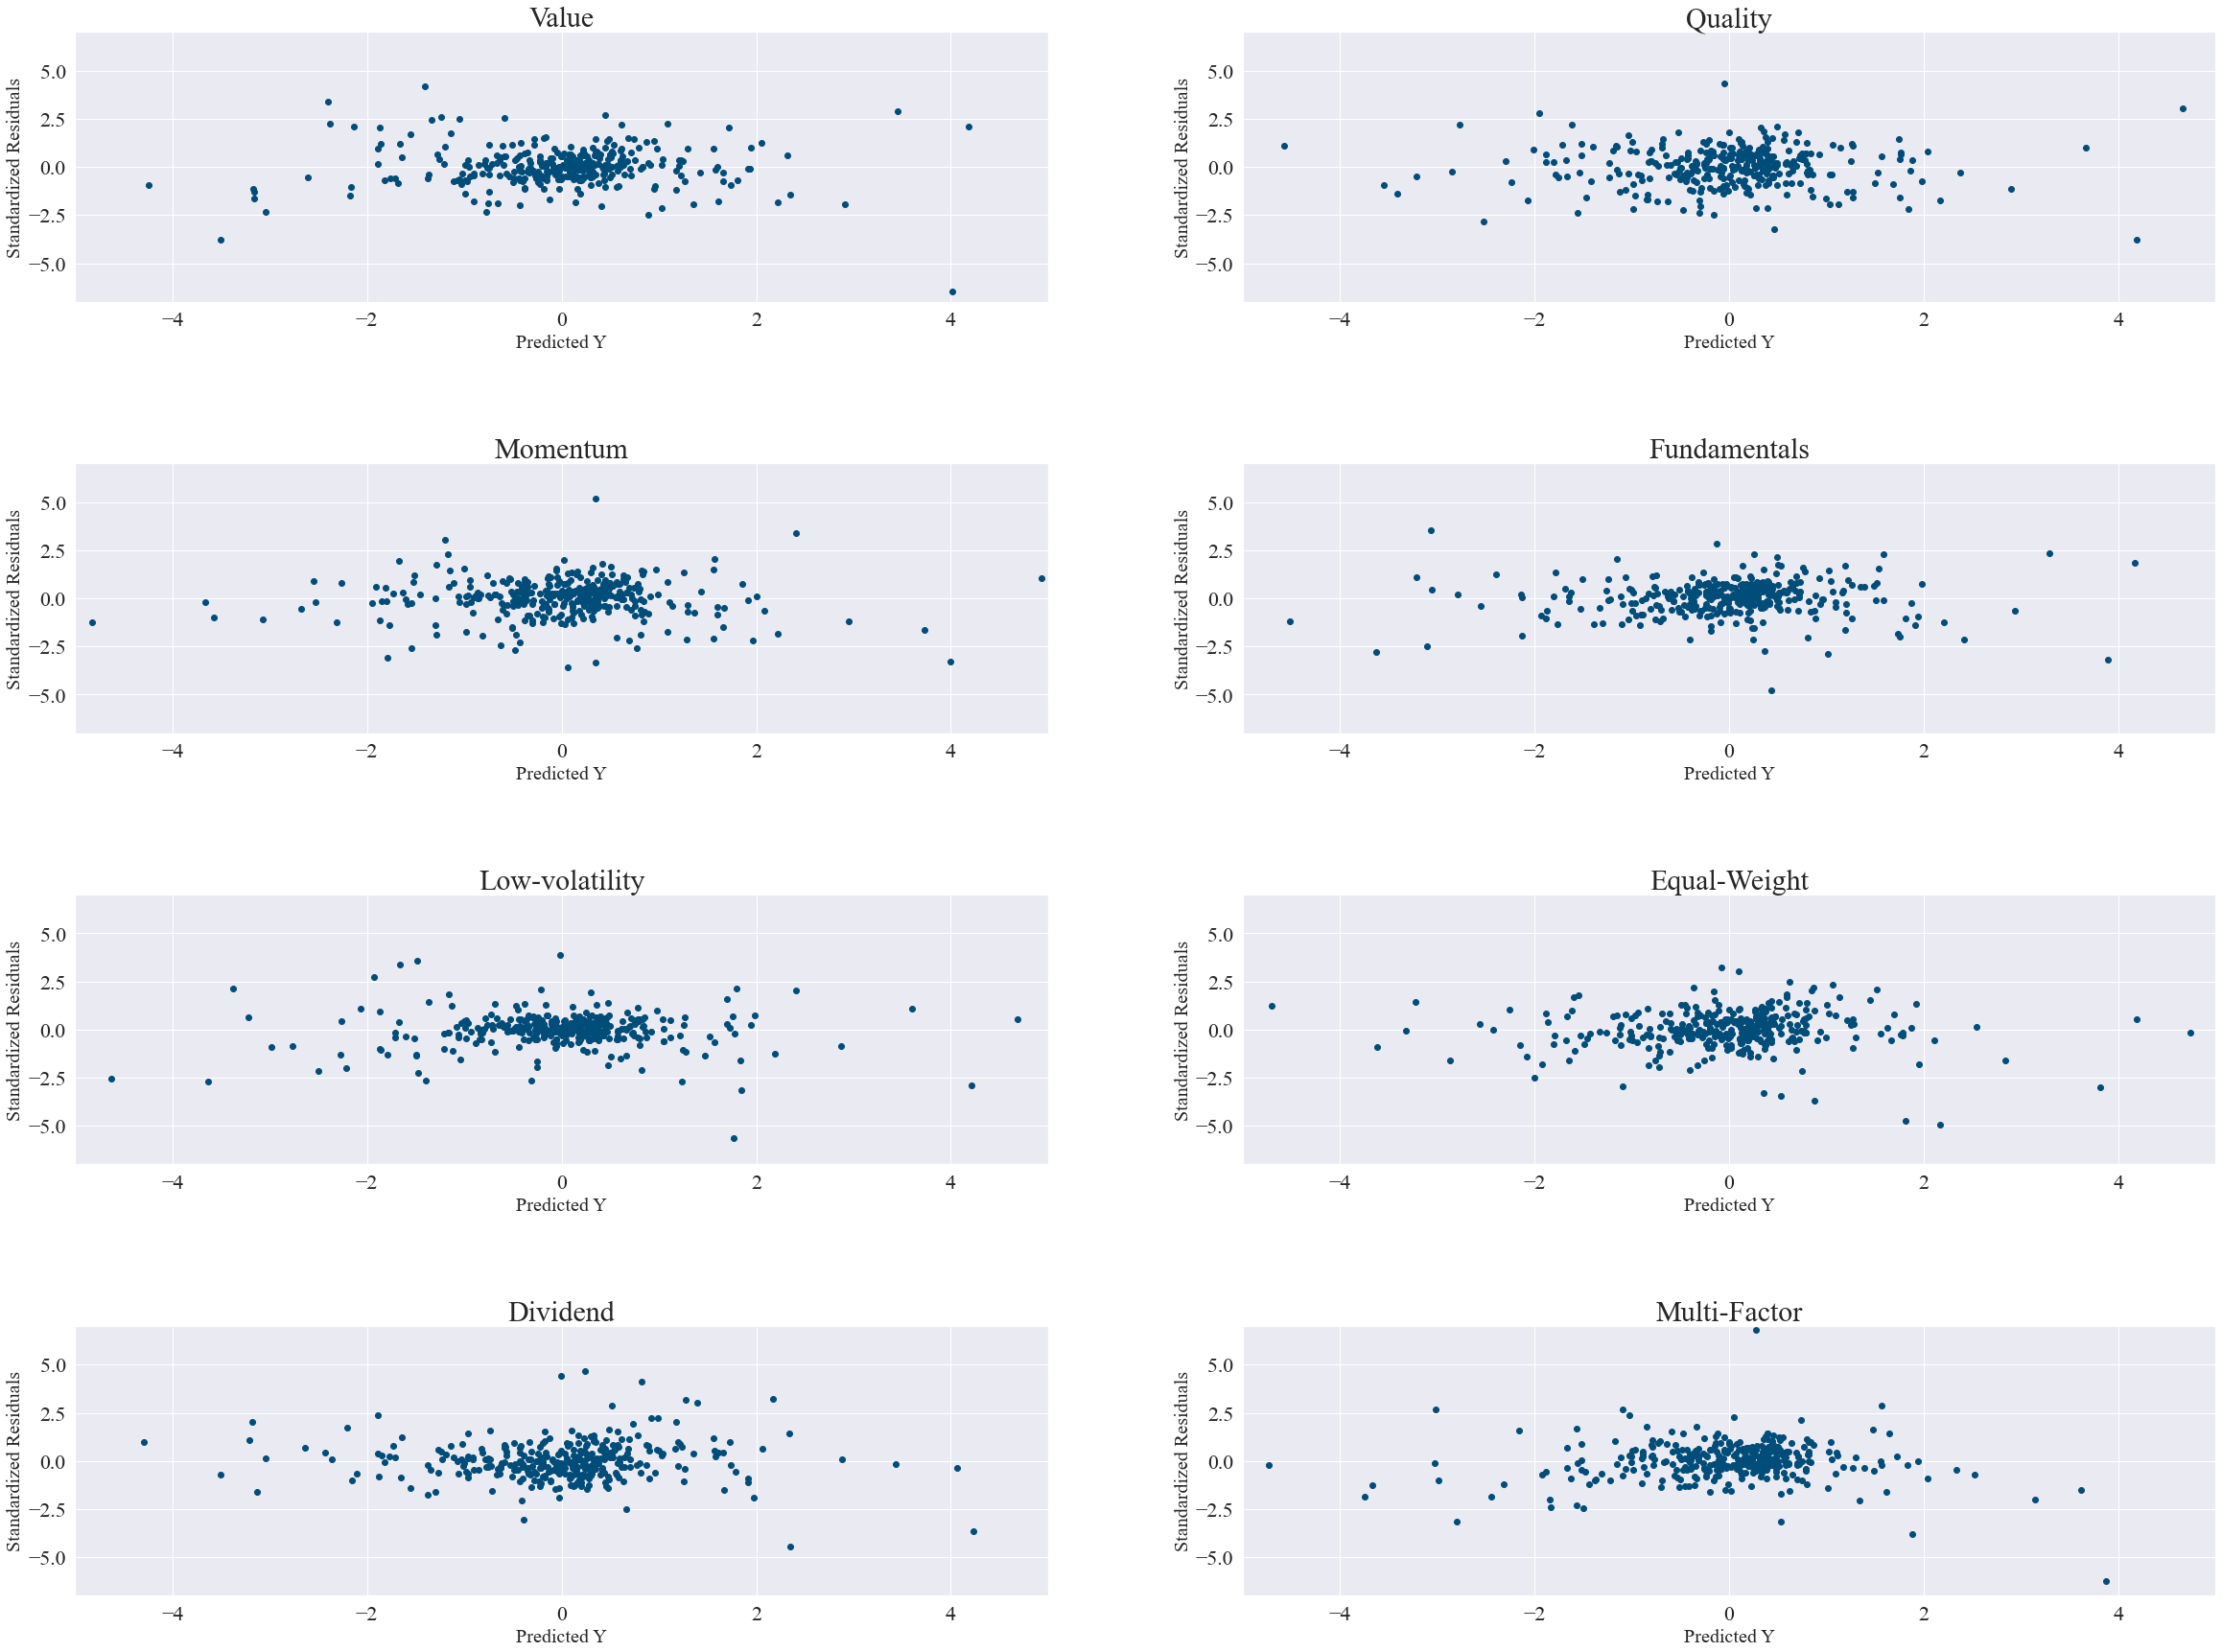

In [470]:
#bear markets
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid_bear=[value_capm_bear,quality_capm_bear,momentum_capm_bear,fundamentals_capm_bear,
            lowvol_capm_bear,equal_capm_bear,dividend_capm_bear,multi_capm_bear]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid_bear):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

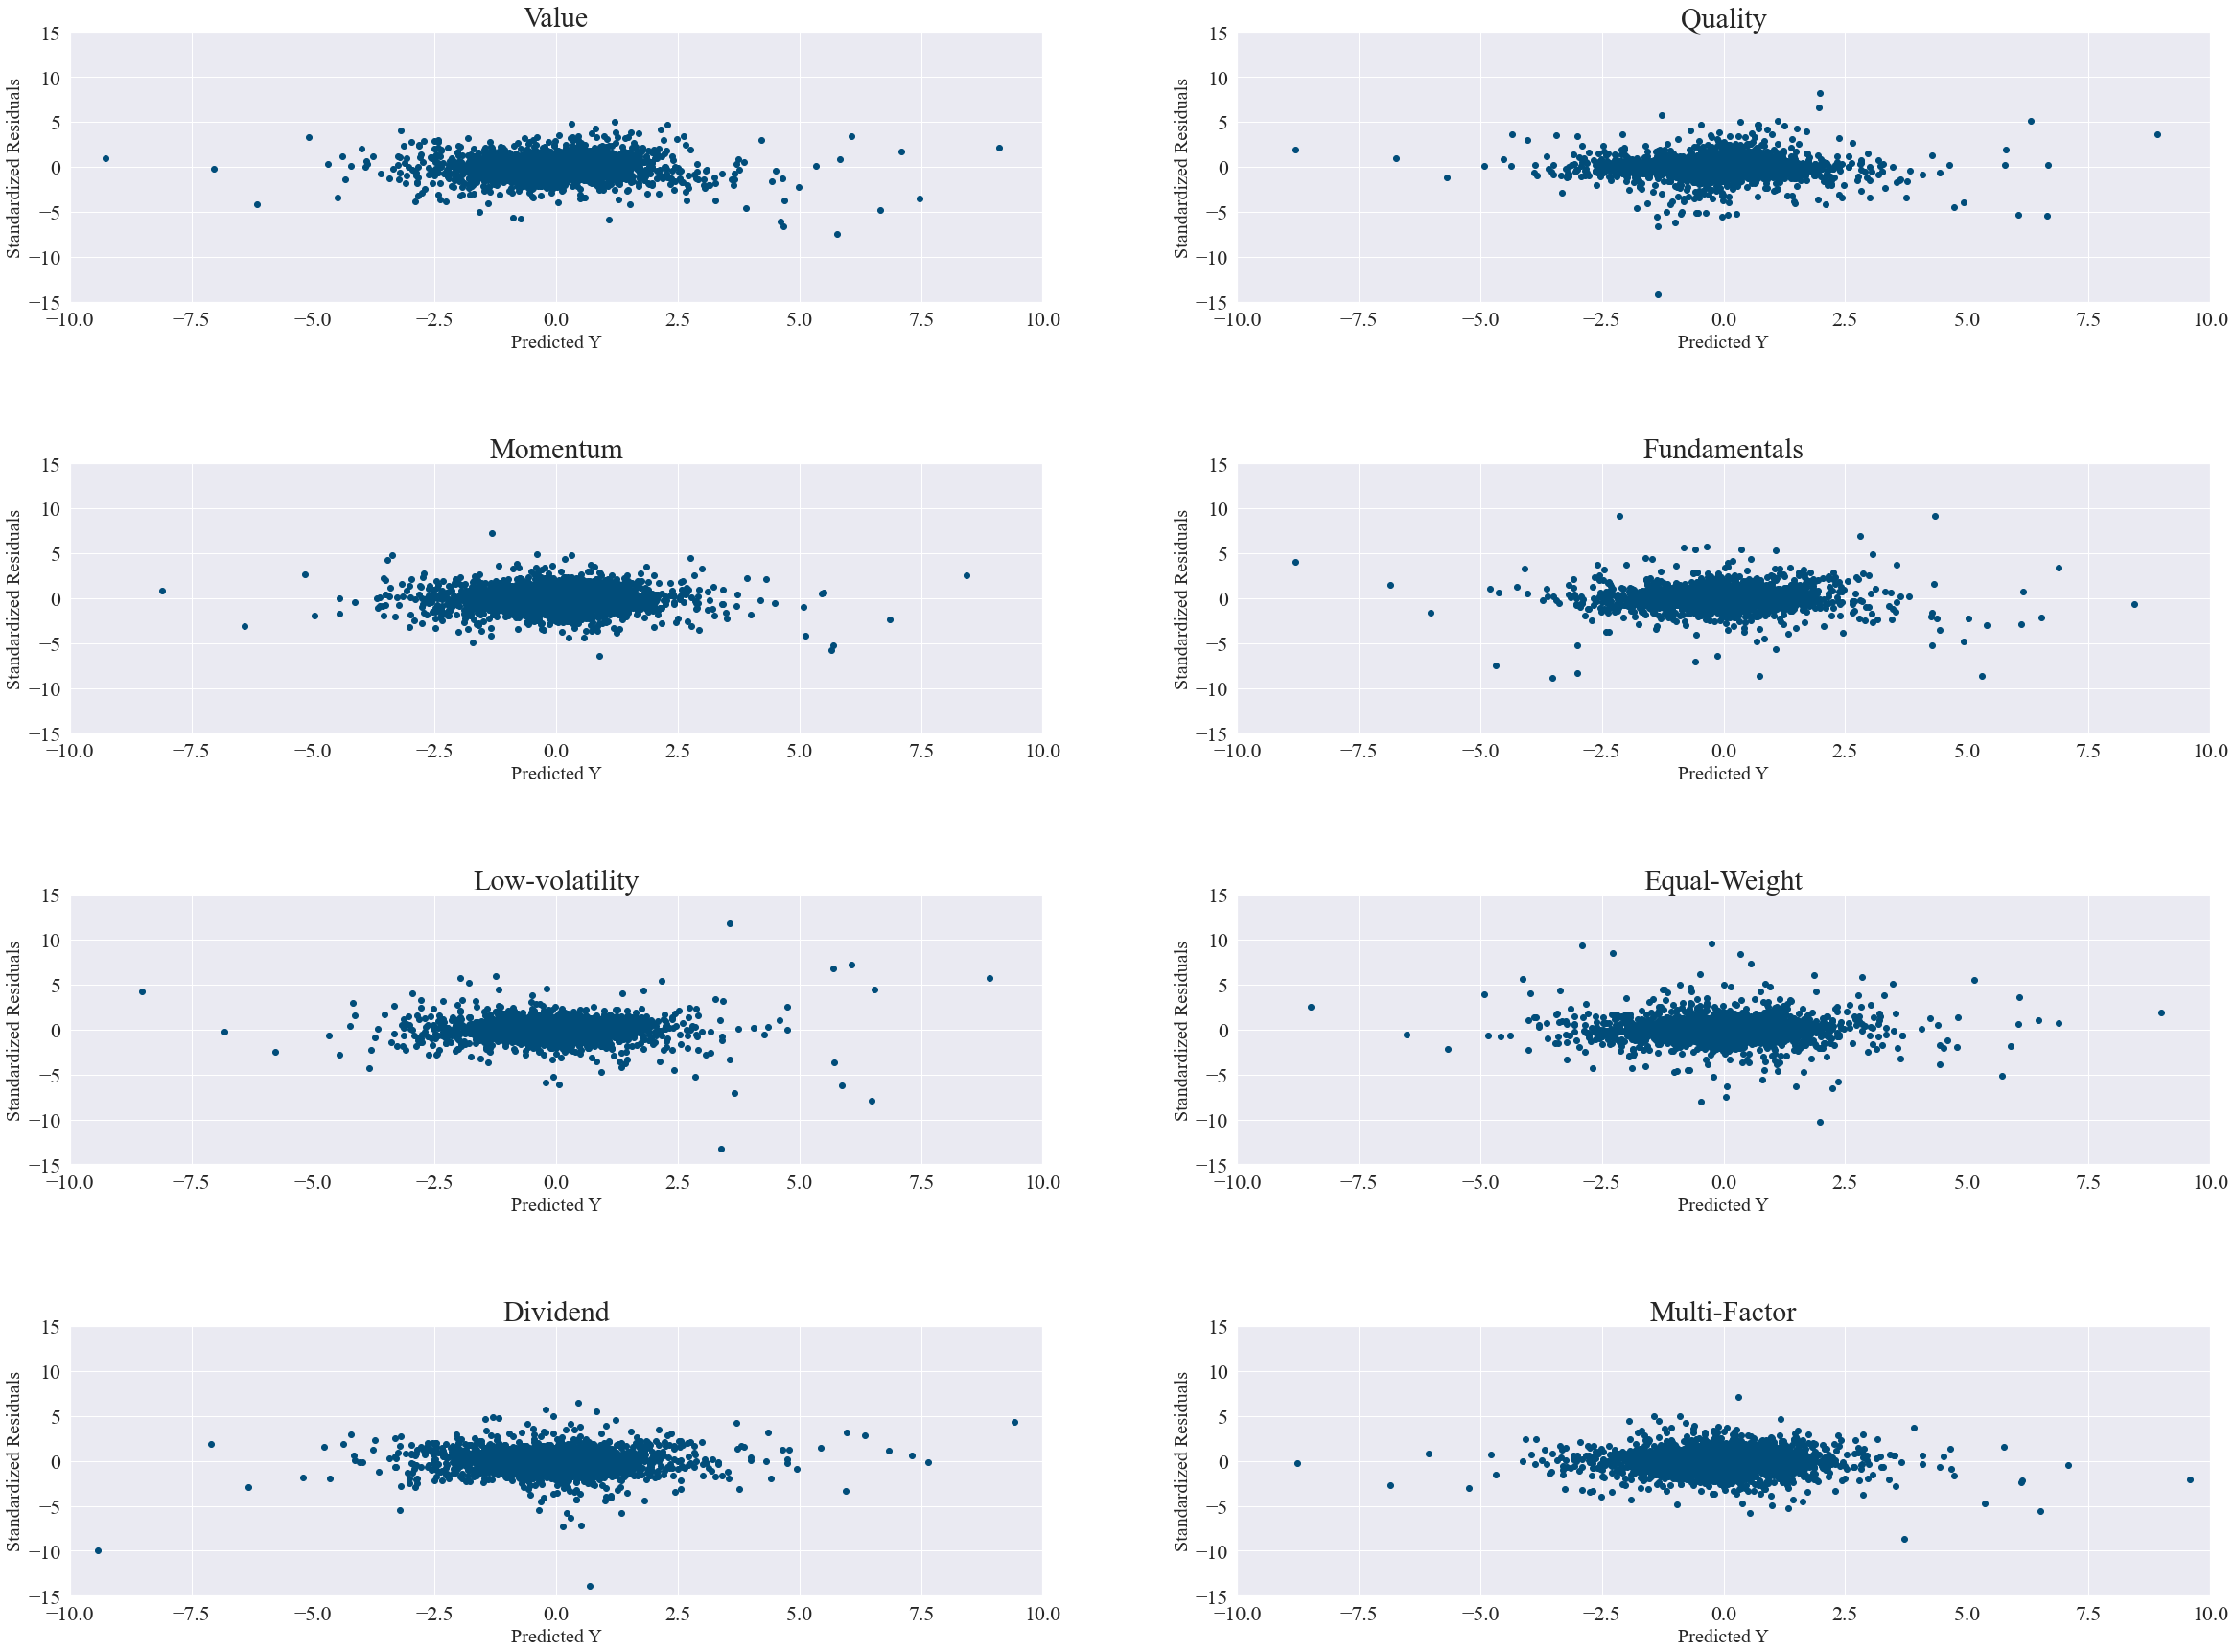

In [469]:
#bull markets
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid_bull=[value_capm_bull,quality_capm_bull,momentum_capm_bull,fundamentals_capm_bull,
            lowvol_capm_bull,equal_capm_bull,dividend_capm_bull,multi_capm_bull]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid_bull):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-15, 15])
    ax[count].set_xlim([-10, 10])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

# Hyphothesis 4

In [215]:
'''Factor annualized excess returns'''

smb_return_y=pf_return_annualized(factors['SMB'][1:])
hml_return_y=pf_return_annualized(factors['HML'][1:])
mom_return_y=pf_return_annualized(factors['MOM'][1:])
bab_return_y=pf_return_annualized(factors['BAB'][1:])
qmj_return_y=pf_return_annualized(factors['QMJ'][1:])

print('\n Annualized returns: \n SMB: ',smb_return_y,'\n HML: ',hml_return_y,
      '\n MOM: ',mom_return_y,'\n BAB: ',bab_return_y,
     '\n QMJ: ',qmj_return_y)


 Annualized returns: 
 SMB:  0.012393227885418856 
 HML:  -0.01882871605922143 
 MOM:  -0.0050622065777273795 
 BAB:  0.06989171383958537 
 QMJ:  0.02679831782595743


In [216]:
'''Factor annualized standard deviation'''

smb_std_y=pf_std_annualized(factors['SMB'][1:])
hml_std_y=pf_std_annualized(factors['HML'][1:])
mom_std_y=pf_std_annualized(factors['MOM'][1:])
bab_std_y=pf_std_annualized(factors['BAB'][1:])
qmj_std_y=pf_std_annualized(factors['QMJ'][1:])

print('\n Annualized standard deviation: \n SMB: ',smb_std_y,'\n HML: ',hml_std_y,
      '\n MOM: ',mom_std_y,'\n BAB: ',bab_std_y,
     '\n QMJ: ',qmj_std_y)


 Annualized standard deviation: 
 SMB:  0.07772878352753973 
 HML:  0.08676857349127728 
 MOM:  0.15569873353240907 
 BAB:  0.09811927668549746 
 QMJ:  0.08936206086350726


Text(0.5, 1.0, 'Correlation Matrix')

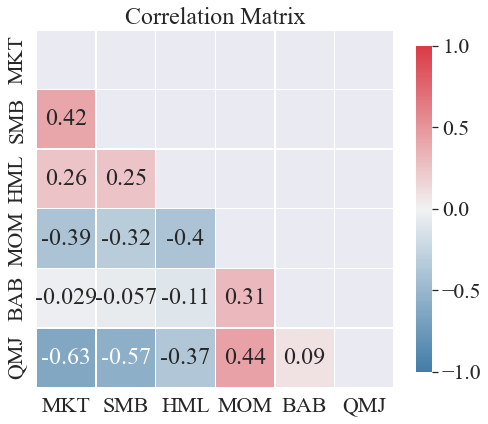

In [217]:
'''Correlation matrix - factors'''

corr_matrix_factors = np.corrcoef(factors.iloc[1:,:],rowvar=False)

'''Plot the correlation matrix'''

sns.set(font="Times New Roman",font_scale=2)
fig, ax = plt.subplots(figsize=(8, 8))
correlation_plot(corr_matrix_factors, names=factors.iloc[:,:].columns, include_values=True, ax=ax)
ax.set_title('Correlation Matrix',)

In [218]:
'''Carhart'''

def carhart(pf_return,factors,bm_return):
    X = np.column_stack((bm_return,factors['SMB'],factors['HML'],factors['MOM']))
    X = sm.add_constant(X)
    model = sm.OLS(pf_return,X)
    results = model.fit()
    return print(results.summary())

print('VALUE')
value_carhart=carhart(value_pf_return_m,factors[20:],value_bm_pf_return_m)
print('\n MOMENTUM')
momentum_carhart=carhart(momentum_pf_return_m,factors[28:],momentum_bm_pf_return_m)
print('\n QUALITY')
quality_carhart=carhart(quality_pf_return_m,factors[37:],quality_bm_pf_return_m)
print('\n FUNDAMENTALS')
fundamentals_carhart=carhart(fundamentals_pf_return_m,factors[37:],fundamentals_bm_pf_return_m)
print('\n LOW VOLATILITY')
lowvol_carhart=carhart(lowvol_pf_return_m,factors[49:],lowvol_bm_pf_return_m)
print('\n EQUAL-WEIGHT')
equal_carhart=carhart(equal_pf_return_m,factors[1:],equal_bm_pf_return_m)
print('\n DIVIDEND')
dividend_carhart=carhart(dividend_pf_return_m,factors[9:],dividend_bm_pf_return_m)
print('\n MULTI-FACTOR')
multi_carhart=carhart(multi_pf_return_m,factors[6:],multi_bm_pf_return_m)

VALUE
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1554.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          1.65e-151
Time:                        14:11:25   Log-Likelihood:                 707.86
No. Observations:                 209   AIC:                            -1406.
Df Residuals:                     204   BIC:                            -1389.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.816   

In [443]:
'''6-factor model'''

def six_factors(pf_return,factors,bm_return):
    X = np.column_stack((bm_return,factors['SMB'],factors['HML'],factors['MOM'],factors['BAB'],factors['QMJ']))
    X = sm.add_constant(X)
    model = sm.OLS(pf_return,X)
    results = model.fit(cov_type='HC3')
    predicted_Y=results.predict()
    standardized_predicted_Y=(predicted_Y-predicted_Y.mean())/predicted_Y.std()
    influence = results.get_influence()
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    standardized_residuals = influence.resid_studentized_internal
    return standardized_predicted_Y,standardized_residuals,print(results.summary(),test)

print('VALUE')
value_six_factors=six_factors(value_pf_return_m,factors[20:],value_bm_pf_return_m)
print('\n MOMENTUM')
momentum_six_factors=six_factors(momentum_pf_return_m,factors[28:],momentum_bm_pf_return_m)
print('\n QUALITY')
quality_six_factors=six_factors(quality_pf_return_m,factors[37:],quality_bm_pf_return_m)
print('\n FUNDAMENTALS')
fundamentals_six_factors=six_factors(fundamentals_pf_return_m,factors[37:],fundamentals_bm_pf_return_m)
print('\n LOW VOLATILITY')
lowvol_six_factors=six_factors(lowvol_pf_return_m,factors[49:],lowvol_bm_pf_return_m)
print('\n EQUAL-WEIGHT')
equal_six_factors=six_factors(equal_pf_return_m,factors[1:],equal_bm_pf_return_m)
print('\n DIVIDEND')
dividend_six_factors=six_factors(dividend_pf_return_m,factors[9:],dividend_bm_pf_return_m)
print('\n MULTI-FACTOR')
multi_six_factors=six_factors(multi_pf_return_m,factors[6:],multi_bm_pf_return_m)

VALUE
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     522.2
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          4.71e-120
Time:                        18:00:39   Log-Likelihood:                 712.62
No. Observations:                 209   AIC:                            -1411.
Df Residuals:                     202   BIC:                            -1388.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.102e-05      0.001     -0.017   

## Assumptions

__Linearity__

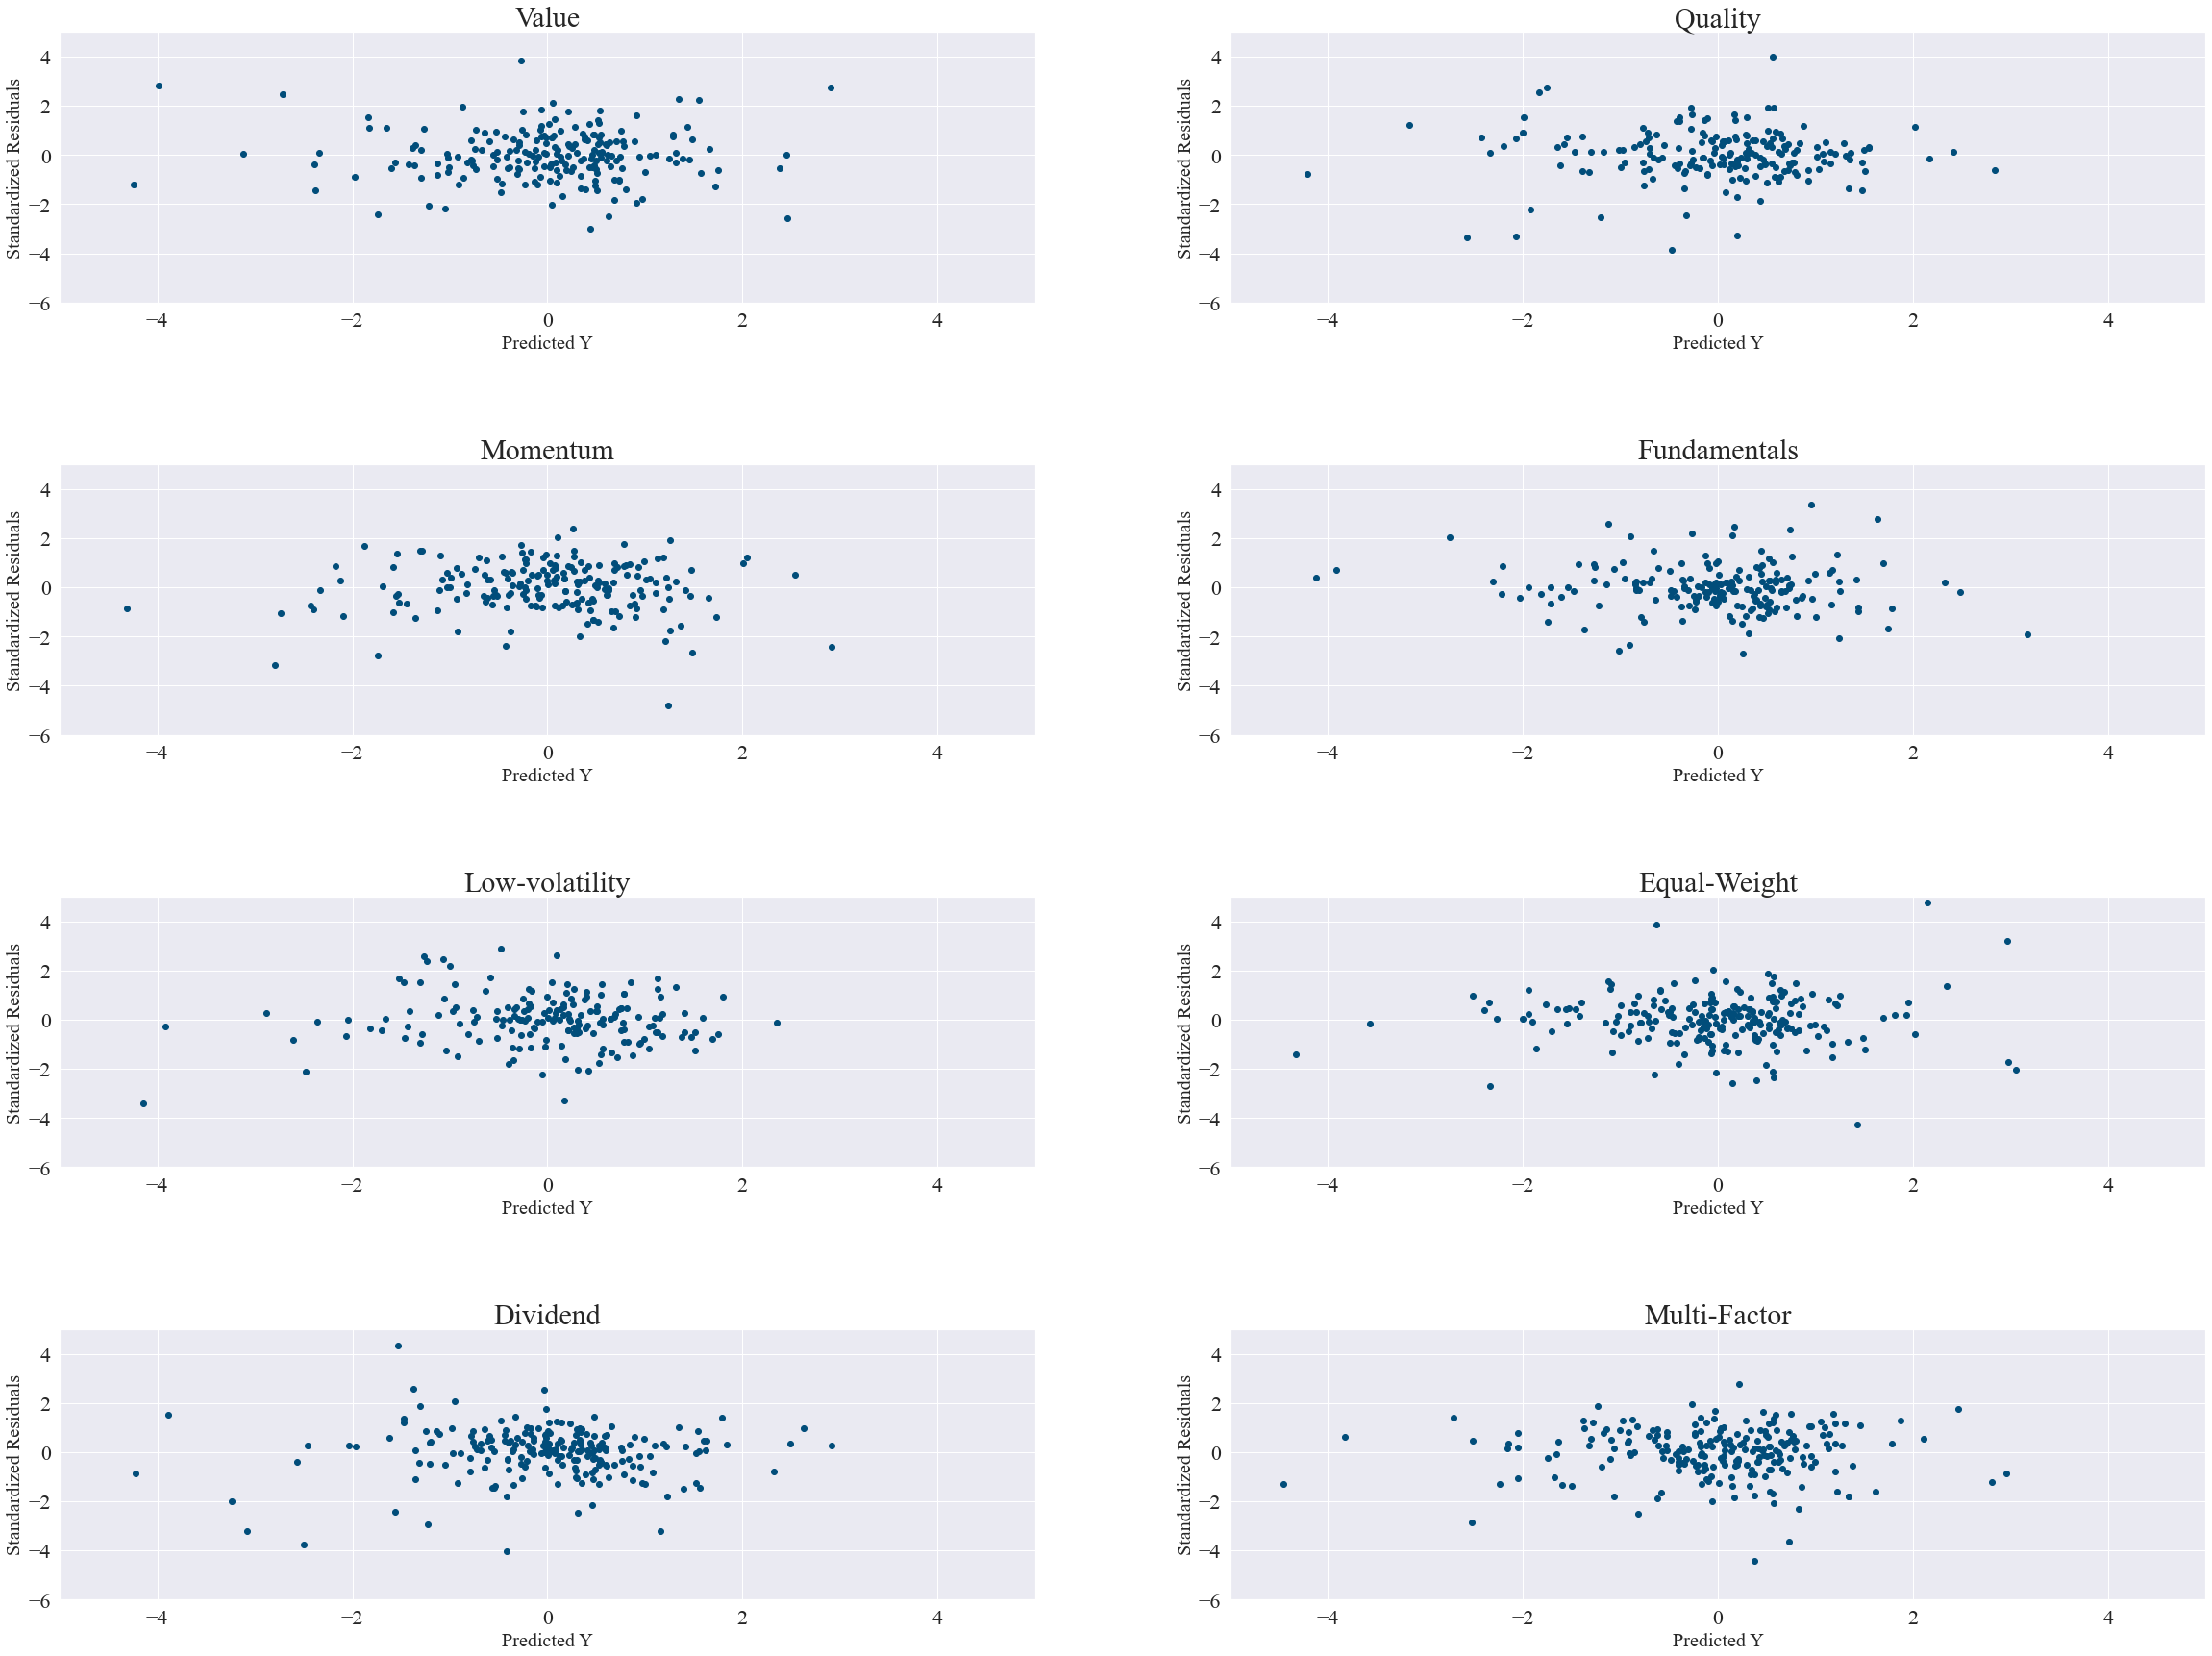

In [472]:
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_six_factors,quality_six_factors,momentum_six_factors,fundamentals_six_factors,
            lowvol_six_factors,equal_six_factors,dividend_six_factors,multi_six_factors]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-6, 5])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

# Hypothesis 5

In [220]:
ind_pf=pd.read_csv("/Users/alexandra/Documents/master_thesis/data/12_Industry_Portfolios.csv",index_col='Date',parse_dates=True)
ind_pf=ind_pf.sub(rf['RF'], axis=0)


In [221]:
'''Regress ETF portfolio returns against industry portfolios returns'''

def ind_regression(betas,pf_return,ind_pf_returns):
    x=ind_pf_returns
    y=pf_return
    y_hat=np.sum(betas*ind_pf_returns,axis=1)
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    r_sq= (1 - (ss_res/ss_tot))
    #alpha=(y-y_hat).mean()
    #print (alpha,scipy.ttest_1samp(y-y_hat,0).pvalue)
    return -r_sq
    
#set contraints: coefficients must sum to 1 and be >0
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0, 
                   'jac' : lambda x: np.ones_like(x)}

bounds = [(0.0, 1.0)] * len(ind_pf.columns)

#initialize coefficients
x0 = np.ones_like(ind_pf.columns)/12

#find coefficients that maximize R-squared (etfs & benchmarks)
res_value = sci.optimize.minimize(ind_regression, x0=x0, args=(value_pf_return_m,ind_pf[20:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_value=res_value.x
print('VALUE: ',res_value)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9552517593435346
            Iterations: 15
            Function evaluations: 195
            Gradient evaluations: 15
VALUE:  [0.094 0.000 0.135 0.117 0.000 0.000 0.064 0.098 0.003 0.105 0.339 0.045]


In [222]:
res_bm_value = sci.optimize.minimize(ind_regression, x0=x0, args=(value_bm_pf_return_m,ind_pf[20:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_bm_value=res_bm_value.x
print('VALUE BM: ',res_bm_value)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9893271760454749
            Iterations: 16
            Function evaluations: 210
            Gradient evaluations: 16
VALUE BM:  [0.042 0.000 0.078 0.079 0.057 0.000 0.089 0.126 0.013 0.066 0.315 0.135]


In [223]:
res_momentum = sci.optimize.minimize(ind_regression, x0=x0, args=(momentum_pf_return_m,ind_pf[28:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_momentum=res_momentum.x
print('MOMENTUM: ',res_momentum)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9144448417976535
            Iterations: 12
            Function evaluations: 157
            Gradient evaluations: 12
MOMENTUM:  [0.000 0.039 0.206 0.045 0.000 0.319 0.000 0.102 0.147 0.141 0.000 0.000]


In [224]:
res_bm_momentum = sci.optimize.minimize(ind_regression, x0=x0, args=(momentum_bm_pf_return_m,ind_pf[28:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_bm_momentum=res_bm_momentum.x
print('MOMENTUM BM: ',res_bm_momentum)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9673742415572599
            Iterations: 13
            Function evaluations: 170
            Gradient evaluations: 13
MOMENTUM BM:  [0.000 0.038 0.126 0.054 0.016 0.395 0.000 0.094 0.160 0.118 0.000 0.000]


In [225]:
res_quality = sci.optimize.minimize(ind_regression, x0=x0, args=(quality_pf_return_m,ind_pf[37:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_quality=res_quality.x
print('QUALITY: ',res_quality)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9169757749278243
            Iterations: 14
            Function evaluations: 182
            Gradient evaluations: 14
QUALITY:  [0.000 0.000 0.180 0.060 0.086 0.299 0.049 0.111 0.065 0.107 0.000 0.044]


In [226]:
res_bm_quality = sci.optimize.minimize(ind_regression, x0=x0, args=(quality_bm_pf_return_m,ind_pf[37:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_bm_quality=res_bm_quality.x
print('QUALITY BM: ',res_bm_quality)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.993982044744556
            Iterations: 14
            Function evaluations: 185
            Gradient evaluations: 14
QUALITY BM:  [0.049 0.023 0.076 0.046 0.054 0.227 0.050 0.082 0.098 0.097 0.131 0.067]


In [227]:
res_fundamentals = sci.optimize.minimize(ind_regression, x0=x0, args=(fundamentals_pf_return_m,ind_pf[37:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_fundamentals=res_fundamentals.x
print('FUNDAMENTALS: ',res_fundamentals)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9727455893424835
            Iterations: 18
            Function evaluations: 236
            Gradient evaluations: 18
FUNDAMENTALS:  [0.030 0.063 0.243 0.084 0.007 0.000 0.047 0.073 0.065 0.046 0.284 0.059]


In [228]:
res_bm_fundamentals = sci.optimize.minimize(ind_regression, x0=x0, args=(fundamentals_bm_pf_return_m,ind_pf[37:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_bm_fundamentals=res_bm_fundamentals.x
print('FUNDAMENTALS BM: ',res_bm_fundamentals)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9860249291040968
            Iterations: 15
            Function evaluations: 197
            Gradient evaluations: 15
FUNDAMENTALS BM:  [0.001 0.028 0.143 0.095 0.000 0.007 0.084 0.109 0.035 0.116 0.289 0.093]


In [229]:
res_lowvol = sci.optimize.minimize(ind_regression, x0=x0, args=(lowvol_pf_return_m,ind_pf[49:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_lowvol=res_lowvol.x
print('LOWVOL: ',res_lowvol)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9272453151778725
            Iterations: 14
            Function evaluations: 182
            Gradient evaluations: 14
LOWVOL:  [0.222 0.000 0.060 0.000 0.005 0.000 0.083 0.324 0.136 0.136 0.033 0.001]


In [230]:
res_bm_lowvol = sci.optimize.minimize(ind_regression, x0=x0, args=(lowvol_bm_pf_return_m,ind_pf[49:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_bm_lowvol=res_bm_lowvol.x
print('LOWVOL BM: ',res_bm_lowvol)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9946124990194384
            Iterations: 17
            Function evaluations: 223
            Gradient evaluations: 17
LOWVOL BM:  [0.027 0.019 0.048 0.072 0.063 0.170 0.063 0.101 0.070 0.102 0.160 0.105]


In [231]:
res_equal = sci.optimize.minimize(ind_regression, x0=x0, args=(equal_pf_return_m,ind_pf[1:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_equal=res_equal.x
print('EQUAL: ',res_equal)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9687857699320997
            Iterations: 16
            Function evaluations: 209
            Gradient evaluations: 16
EQUAL:  [0.032 0.022 0.272 0.038 0.000 0.251 0.039 0.081 0.058 0.023 0.162 0.023]


In [232]:
res_bm_equal = sci.optimize.minimize(ind_regression, x0=x0, args=(equal_bm_pf_return_m,ind_pf[1:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_bm_equal=res_bm_equal.x
print('EQUAL BM: ',res_bm_equal)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9866851657476328
            Iterations: 15
            Function evaluations: 198
            Gradient evaluations: 15
EQUAL BM:  [0.085 0.022 0.064 0.044 0.011 0.340 0.024 0.081 0.067 0.097 0.121 0.044]


In [233]:
res_dividend = sci.optimize.minimize(ind_regression, x0=x0, args=(dividend_pf_return_m,ind_pf[9:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_dividend=res_dividend.x
print('DIVIDEND: ',res_dividend)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.8712989331677878
            Iterations: 11
            Function evaluations: 143
            Gradient evaluations: 11
DIVIDEND:  [0.211 0.003 0.000 0.006 0.034 0.000 0.052 0.197 0.105 0.000 0.337 0.054]


In [234]:
res_bm_dividend = sci.optimize.minimize(ind_regression, x0=x0, args=(dividend_bm_pf_return_m,ind_pf[9:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_bm_dividend=res_bm_dividend.x
print('DIVIDEND BM: ',res_bm_dividend)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9901225274943145
            Iterations: 15
            Function evaluations: 198
            Gradient evaluations: 15
DIVIDEND BM:  [0.045 0.002 0.084 0.081 0.062 0.000 0.091 0.130 0.022 0.063 0.311 0.108]


In [235]:
res_multi = sci.optimize.minimize(ind_regression, x0=x0, args=(multi_pf_return_m,ind_pf[6:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_multi=res_multi.x
print('MULTI-FACTOR: ',res_multi)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9469703869828253
            Iterations: 14
            Function evaluations: 183
            Gradient evaluations: 14
MULTI-FACTOR:  [0.000 0.011 0.317 0.111 0.000 0.172 0.000 0.100 0.111 0.143 0.029 0.007]


In [236]:
res_bm_multi = sci.optimize.minimize(ind_regression, x0=x0, args=(multi_bm_pf_return_m,ind_pf[6:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_bm_multi=res_bm_multi.x
print('MULTI-FACTOR BM: ',res_bm_multi)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9735354474798629
            Iterations: 14
            Function evaluations: 183
            Gradient evaluations: 14
MULTI-FACTOR BM:  [0.051 0.004 0.176 0.103 0.000 0.213 0.000 0.121 0.137 0.113 0.048 0.035]


In [237]:
'''Calculate S&P 500 excess monthly returns'''
sp500_return=(sp500/sp500.shift(1)-1)
sp500_return=(sp500_return.sub(rf['RF'], axis=0))[1:]
sp500_return=sp500_return.squeeze(axis=1)

In [238]:
'''find coefficients that maximize R-squared (S&P 500)'''
res_sp500=sci.optimize.minimize(ind_regression, x0=x0, args=(sp500_return,ind_pf[1:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_sp500=res_sp500.x
print('S&P 500: ',res_sp500)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9851696189497794
            Iterations: 15
            Function evaluations: 196
            Gradient evaluations: 15
S&P 500:  [0.060 0.013 0.007 0.047 0.105 0.207 0.055 0.084 0.082 0.107 0.159 0.073]


# Hypothesis 6

In [239]:
factors_d=factors_d[1:]

In [240]:
'''Covariance matrix'''
cov_matrix = factors_d.cov()
cov_matrix

,MKT,SMB,HML,MOM
MKT,0.000146,0.000007,0.000011,-0.000025
SMB,0.000007,0.000027,0.000003,-0.000006
HML,0.000011,0.000003,0.000034,-0.000031
MOM,-0.000025,-0.000006,-0.000031,0.000107


In [241]:
'''check the covariance matrix for positity and semi-definitness'''

def check_positive_semi_definite_eig(matrix: np.ndarray): 
    
    """
    Checks that a symmetric square matrix is positive semi-definite. 
    
    Inputs:
    
    matrix: 
        Symmetric, Square matrix. 
    """
    
    return np.all(np.linalg.eigvals(matrix) >= 0)

check_positive_semi_definite_eig(cov_matrix)

True

In [242]:
'''Correlation matrix'''

corr_matrix = np.corrcoef(factors_d,rowvar=False)
corr_matrix

array([[1.000, 0.116, 0.150, -0.204],
       [0.116, 1.000, 0.088, -0.108],
       [0.150, 0.088, 1.000, -0.509],
       [-0.204, -0.108, -0.509, 1.000]])

Text(0.5, 1.0, 'Correlation Matrix')

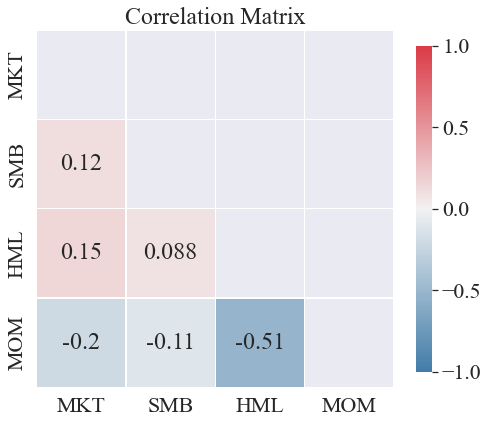

In [243]:
'''Plot the correlation matrix'''

sns.set(font="Times New Roman",font_scale=2)
fig, ax = plt.subplots(figsize=(8, 8))
correlation_plot(corr_matrix, names=factors_d.columns, include_values=True, ax=ax)
ax.set_title('Correlation Matrix',)

In [244]:
'''Calculate optimal weights (tangency pf)'''
def sharpe_ratio(w: np.ndarray,factors):
    cov_matrix=factors.cov()
    mean=(factors@w)
    n = len(factors)
    mean_annualized=np.prod(mean+1) ** (252 / n) - 1
    std_annualized=np.sqrt(w@cov_matrix@w)*np.sqrt(252)
    sr=mean_annualized/std_annualized
    return -sr

opt_weights=[]

# define sum to one and maximum weight constraints
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

bounds = [(-1, 1)] * 4


for i in np.arange(0,4785,63):
    if len(factors_d[i:i+252])<248:
         break
    x0 = np.r_[np.ones(4) / 4]
    res = sci.optimize.minimize(sharpe_ratio, x0=x0, args=(factors_d[i:i+252]),
                        method='SLSQP', constraints=sum_to_one_cons, options={'ftol': 1e-9, 'disp': True},bounds=bounds)
    opt_weights.append(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -5.8106931869921485
            Iterations: 14
            Function evaluations: 76
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7.986218474741112
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.266060319833124
            Iterations: 8
            Function evaluations: 42
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.864468106724094
            Iterations: 9
            Function evaluations: 47
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.9480057192132603
            Iterations: 9
            Function evaluati

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.3487633348041466
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.3601493112538163
            Iterations: 4
            Function evaluations: 20
            Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.0755813376485297
            Iterations: 2
            Function evaluations: 10
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.232130033255829
            Iterations: 7
            Function evaluations: 36
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.6457619534686199
            Iterations: 5
            Function evaluati

In [245]:
'''Calculate optimal weights (min_variance pf)'''
def pf_std(w: np.ndarray,factors):
    cov_matrix=factors.cov()
    mean=(factors@w)
    n = len(factors)
    mean_annualized=np.prod(mean+1) ** (252 / n) - 1
    #print(mean_annualized)
    std_annualized=np.sqrt(w@cov_matrix@w)*np.sqrt(252)
    return std_annualized

opt_weights_min_variance=[]

# define sum to one and maximum weight constraints
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

bounds = [(-1, 1)] * 4


for i in np.arange(0,4785,63):
    if len(factors_d[i:i+252])<248:
         break
    x0 = np.r_[np.ones(4) / 4]
    res = sci.optimize.minimize(pf_std, x0=x0, args=(factors_d[i:i+252]),
                        method='SLSQP', constraints=sum_to_one_cons, options={'ftol': 1e-9, 'disp': True},bounds=bounds)
    opt_weights_min_variance.append(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.035244939744216316
            Iterations: 10
            Function evaluations: 50
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.040053203701946025
            Iterations: 13
            Function evaluations: 65
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04163136483742932
            Iterations: 16
            Function evaluations: 80
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03963912238895361
            Iterations: 16
            Function evaluations: 80
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0388806476774845
            Iterations: 14
            Functi

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.02652238335177001
            Iterations: 13
            Function evaluations: 65
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.025456135610883078
            Iterations: 11
            Function evaluations: 55
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.026261291246340666
            Iterations: 11
            Function evaluations: 55
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.026423325235104534
            Iterations: 10
            Function evaluations: 50
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.024660553212318706
            Iterations: 13
            Fun

In [246]:
opt_weights_min_variance

[array([0.156, 0.189, 0.615, 0.040]),
 array([0.104, 0.187, 0.726, -0.018]),
 array([0.035, 0.151, 0.833, -0.018]),
 array([0.101, 0.325, 0.744, -0.171]),
 array([0.104, 0.396, 0.710, -0.209]),
 array([0.094, 0.409, 0.682, -0.185]),
 array([0.112, 0.398, 0.668, -0.178]),
 array([0.109, 0.372, 0.748, -0.229]),
 array([0.083, 0.344, 0.788, -0.215]),
 array([0.086, 0.324, 0.770, -0.180]),
 array([0.086, 0.327, 0.760, -0.172]),
 array([0.070, 0.346, 0.711, -0.126]),
 array([0.095, 0.307, 0.709, -0.111]),
 array([0.040, 0.315, 0.678, -0.033]),
 array([0.010, 0.275, 0.582, 0.133]),
 array([-0.018, 0.266, 0.513, 0.240]),
 array([-0.008, 0.268, 0.510, 0.230]),
 array([0.025, 0.255, 0.530, 0.190]),
 array([0.041, 0.279, 0.521, 0.159]),
 array([0.043, 0.322, 0.424, 0.212]),
 array([0.061, 0.265, 0.428, 0.246]),
 array([0.068, 0.290, 0.418, 0.223]),
 array([0.063, 0.297, 0.444, 0.196]),
 array([0.066, 0.290, 0.445, 0.199]),
 array([0.043, 0.367, 0.416, 0.173]),
 array([-0.043, 0.478, 0.421, 0.144

In [247]:
'''Import factor weights'''

factor_weights=pd.read_csv("/Users/alexandra/Documents/master_thesis/data/factor_weights.csv",index_col='Date',parse_dates=True)
factor_weights_min_variance=pd.read_csv("/Users/alexandra/Documents/master_thesis/data/factor_weights_min_variance.csv",index_col='Date',parse_dates=True)



In [248]:
'''Calculate monthly factor portfolio returns'''

factor_pf_returns=((factor_weights*factors.iloc[:,:-2]).sum(axis=1))[13:]
factor_pf_returns_min_variance=((factor_weights_min_variance*factors.iloc[:,:-2]).sum(axis=1))[13:]
'''Calculate annualized factor portfolio returns'''
factor_pf_returns_y=pf_return_annualized(factor_pf_returns)
factor_pf_returns_y_min_variance=pf_return_annualized(factor_pf_returns_min_variance)

print(factor_pf_returns_y,factor_pf_returns_y_min_variance)

0.05256663647878379 -0.00023829716616075025


In [249]:
'''Calculate annualized factor portfolio standard deviation'''

factor_pf_std=pf_std_annualized(factor_pf_returns)
factor_pf_std

0.14175200487603115

In [250]:
'''Calculate factor portfolio sharpe ratio'''

factor_pf_sr=sr(factor_pf_returns_y,factor_pf_std)
factor_pf_sr

0.37083522398681984

In [251]:
value_pf_return_m

Date
2004-08-31    0.021361
2004-09-30    0.000726
2004-10-29    0.012549
2004-11-30    0.037121
2004-12-31    0.031246
                ...   
2021-08-31    0.013138
2021-09-30   -0.038972
2021-10-29    0.032847
2021-11-30   -0.016292
2021-12-31    0.064249
Length: 209, dtype: float64

In [252]:
factors_d

,MKT,SMB,HML,MOM
Date,,,,
2003-02-01,0.030824,-0.010499,-0.003475,-0.016417
2003-03-01,-0.000536,-0.004331,0.001835,0.001362
2003-06-01,0.020389,-0.008671,0.000249,-0.014746
2003-07-01,-0.006698,0.001946,-0.005713,-0.006231
2003-08-01,-0.013398,0.004733,0.003928,0.008938
...,...,...,...,...
2021-12-27,0.012459,-0.004703,0.003439,0.018870
2021-12-28,-0.002400,-0.006189,0.006718,-0.005639
2021-12-29,0.000601,-0.001220,0.000574,0.003209


# Assumptions

## Normality of Factor Returns

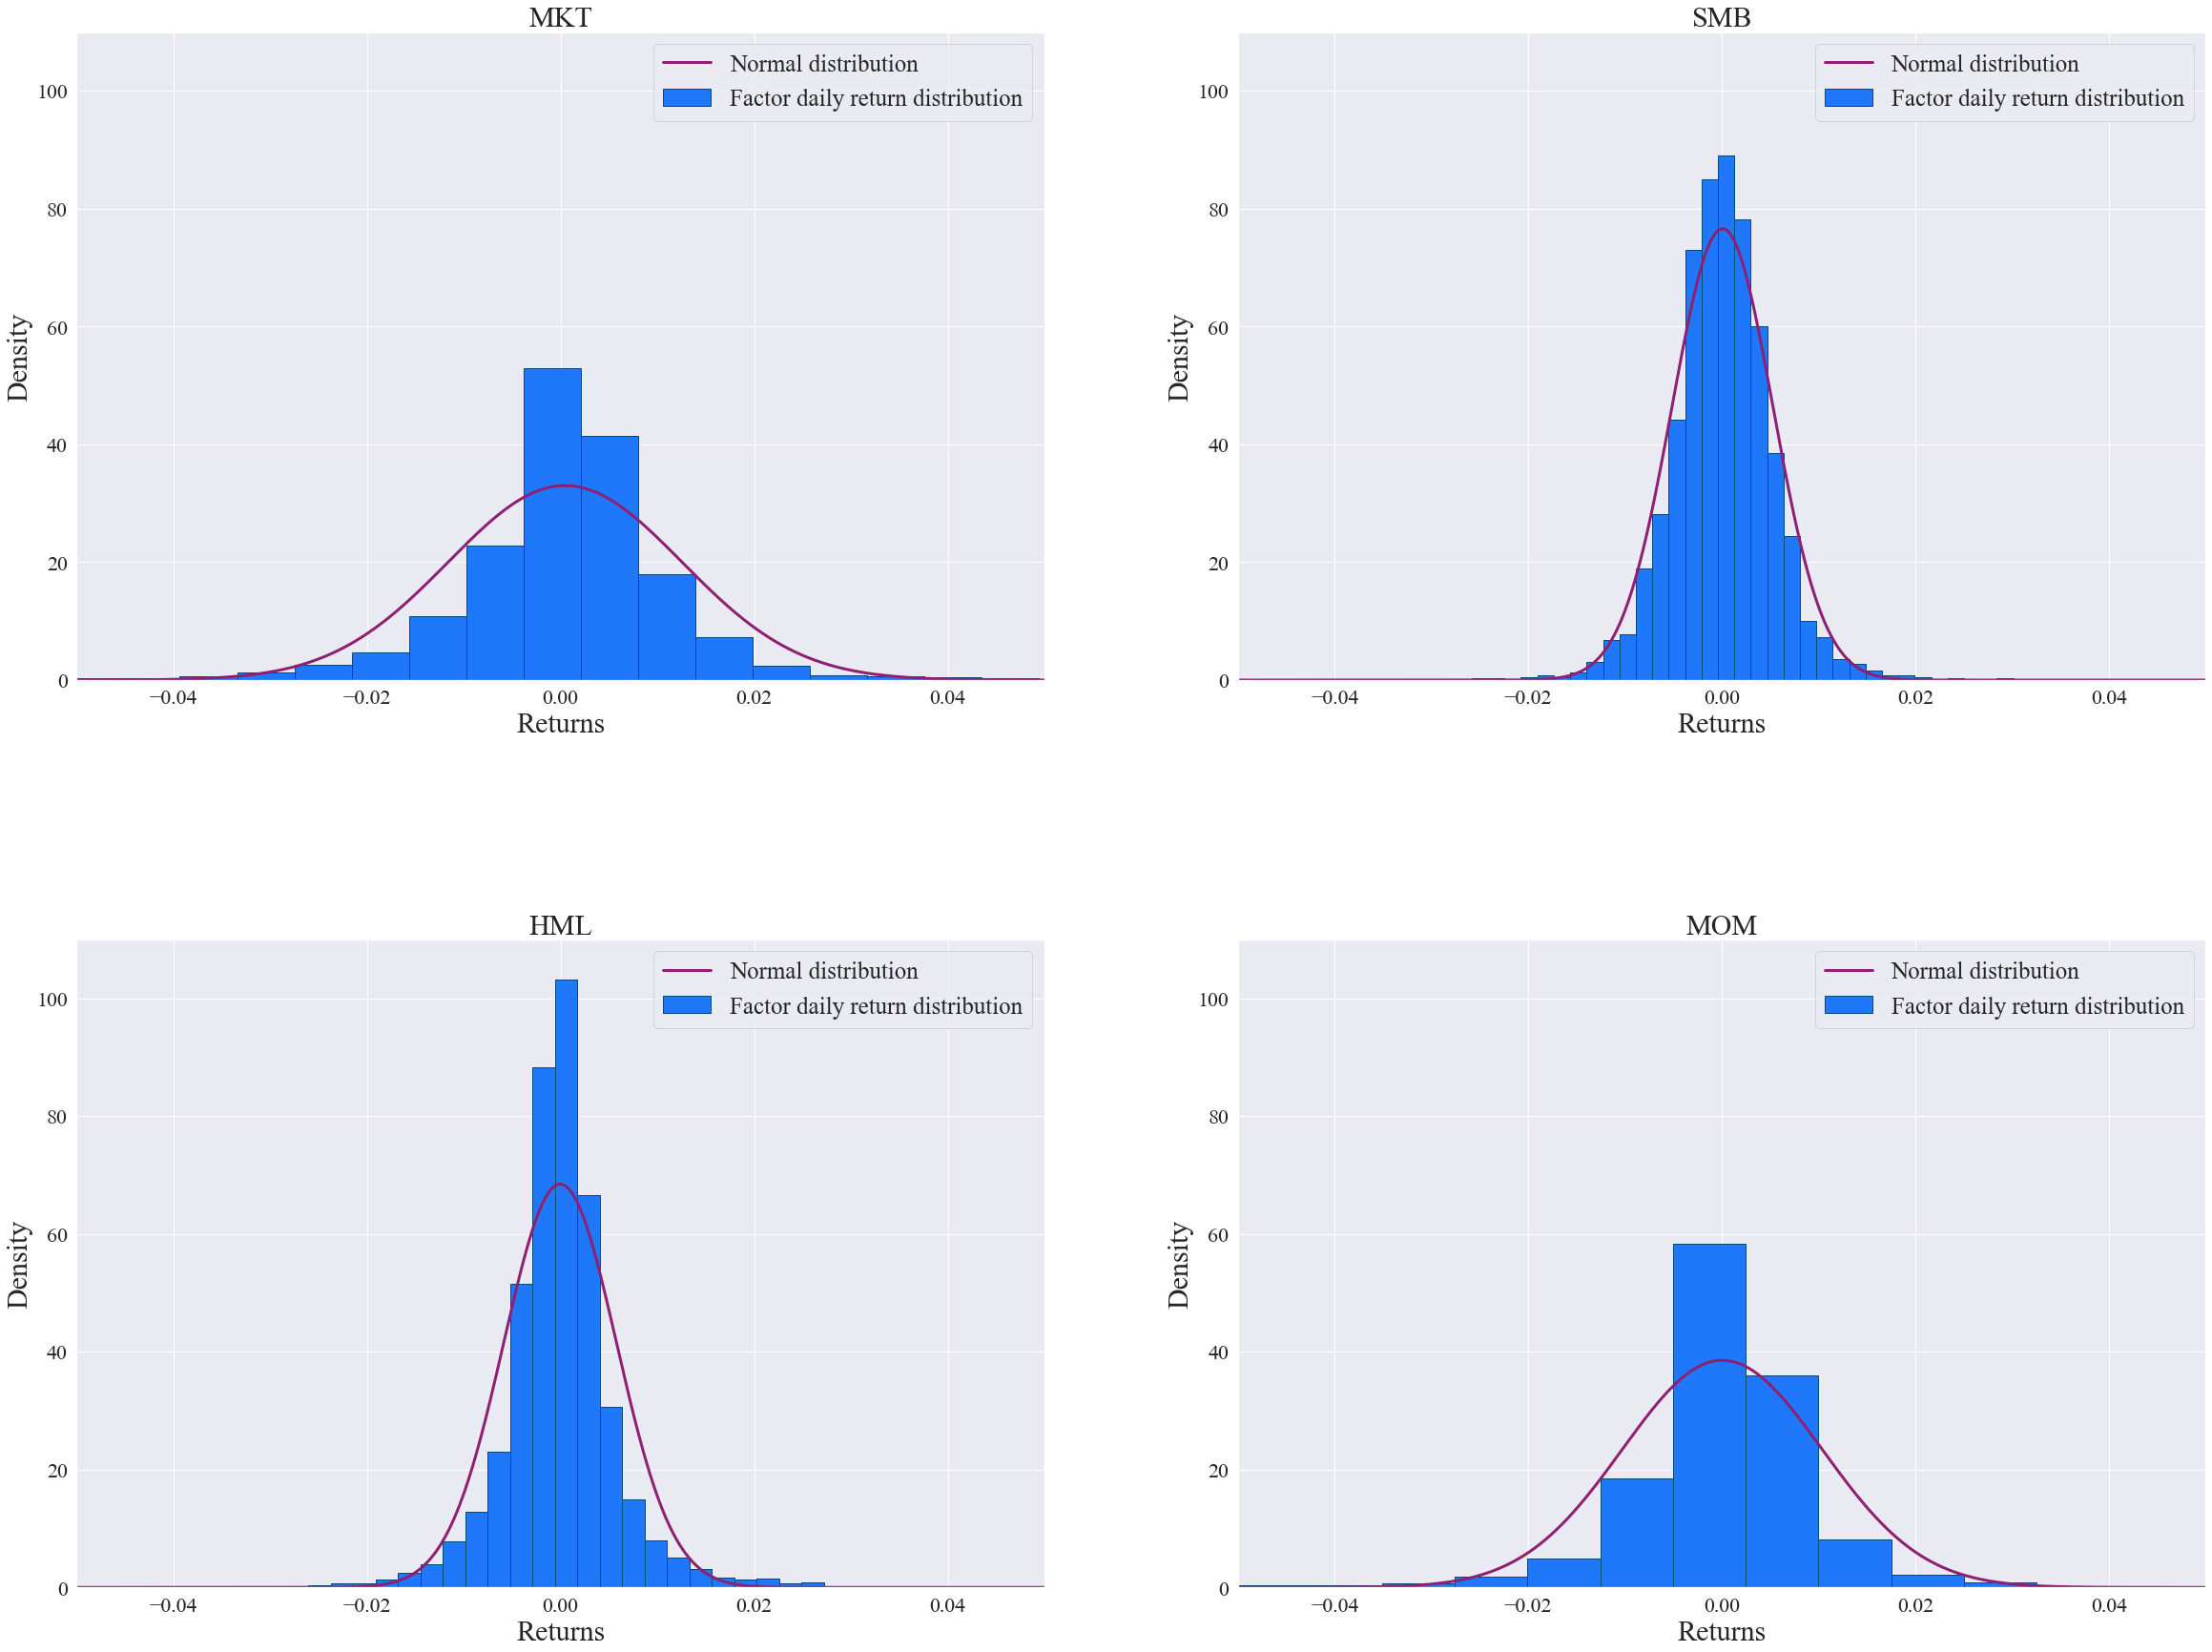

In [253]:
'''Plot the returns'''
x_values = np.linspace(-0.05, 0.05, 1000)

fig, ax = plt.subplots(2,2, figsize=(40,30))
ax=ax.flatten()

#etf_returns=[value_pf_return_m,quality_pf_return_m,momentum_pf_return_m,fundamentals_pf_return_m,
            #lowvol_pf_return_m,equal_pf_return_m,dividend_pf_return_m,multi_pf_return_m]
factor_d_list=[factors_d['MKT'],factors_d['SMB'],factors_d['HML'],factors_d['MOM']]
for count,i in enumerate(factor_d_list):
    ax[count].hist(i.values, bins = 40, color = '#1F77FA', edgecolor = '#014D7A', label= "Factor daily return distribution",density=True)
    ax[count].set_xlabel('Returns',fontsize=30);
    ax[count].set_ylabel('Density',fontsize=30);
    ax[count].set_title(i.name, fontsize=30)
    ax[count].plot(x_values, scipy.norm.pdf(x_values, loc=i.mean(), scale=i.std()), label="Normal distribution", color='#8F2071', linewidth = "3")

    ax[count].set_ylim([0, 110])
    ax[count].set_xlim([-0.05, 0.05])
    ax[count].legend(fontsize=25)

fig.subplots_adjust(hspace=0.4)
